# Analytics

#### Date: 2020/02

#### SUMMARY:

- This notebook represents the project quality analysis of the date exposed right above. 

### TEAM:

##### Semester: 2020/02
##### Professor: Hilmer Neri

##### Members:

- Arthur Matos
- Brian Pina
- Gabriel Sabanai
- Guilherme Marques
- Luiz Henrique Zamprogno
- Luiz Pettengill
- Matheus Blanco
- Pedro Féo
- Saleh Kader
- Victor Buendia


### LIBRARIES

In [82]:
# Deal with data
import pandas as pd
import numpy as np
import json
from glob import glob
import os

# Deal with API request
import urllib3
from urllib3 import request

# Deal with visualization
import seaborn as sns
import matplotlib.pyplot as plt

from random import randint

### GRAPH SETTINGS

In [83]:
%config InlineBackend.figure_format ='retina'
sns.set(font_scale=1.5)
sns.set_style('darkgrid',
              {'xtick.bottom' : True,
               'ytick.left': True,
               'grid.linestyle':'--',
               'font.monospace': ['Computer Modern Typewriter'],
               'axes.edgecolor' : 'white'})

### DATAFRAME SETTINGS

In [84]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

### SonarCloud

In [85]:
repos = [
    'Eccoar_Complaint',
    'eccoar_frontend',
    'Eccoar_Gateway',
    'Eccoar_Mailer',
    'Eccoar_Reports',
    'Eccoar_Users'
]

language = [['Eccoar_Complaint', 'ts'], 
            ['eccoar_frontend', 'ts'], 
            ['Eccoar_Gateway', 'ts'], 
            ['Eccoar_Mailer', 'ts'], 
            ['Eccoar_Reports', 'ts'], 
            ['Eccoar_Users', 'ts']]

repos_language = {}

for item in language:
    repos_language[f"{item[0]}"] = item[1]

In [86]:
repos_language

{'Eccoar_Complaint': 'ts',
 'eccoar_frontend': 'ts',
 'Eccoar_Gateway': 'ts',
 'Eccoar_Mailer': 'ts',
 'Eccoar_Reports': 'ts',
 'Eccoar_Users': 'ts'}

##### Path to the folder with all your jsons

In [87]:
jsons = glob('**/*.json') # add the path here
jsons

['reports/fga-eps-mds-2020_2-Eccoar_Reports-03-05-2021-00:00.json',
 'reports/fga-eps-mds-2020_2-Eccoar_Reports-23-03-2021-00:00.json',
 'reports/fga-eps-mds-2020_2-Eccoar_Reports-17-04-2021-00:00.json',
 'reports/fga-eps-mds-2020_2-Eccoar_Reports-27-04-2021-00:00.json',
 'reports/fga-eps-mds-2020_2-Eccoar_Reports-17-05-2021-00:00.json',
 'reports/fga-eps-mds-2020_2-Eccoar_Reports-12-04-2021-00:00.json',
 'front/fga-eps-mds-2020_2-eccoar_frontend-10-05-2021-00:00.json',
 'front/fga-eps-mds-2020_2-eccoar_frontend-17-04-2021-00:00.json',
 'front/fga-eps-mds-2020_2-eccoar_frontend-26-04-2021-00:00.json',
 'front/fga-eps-mds-2020_2-eccoar_frontend-17-05-2021-00:00.json',
 'front/fga-eps-mds-2020_2-eccoar_frontend-12-04-2021-00:00.json',
 'front/fga-eps-mds-2020_2-eccoar_frontend-23-03-2021-00:00.json',
 'front/fga-eps-mds-2020_2-eccoar_frontend-23-04-2021-00:00.json',
 'front/fga-eps-mds-2020_2-eccoar_frontend-27-04-2021-00:00.json',
 'front/fga-eps-mds-2020_2-eccoar_frontend-03-05-2021-00

In [88]:
issues = glob('issues.json')
sprints = glob('sprints.json')

In [89]:
def read_json(json_path):
    
    with open(json_path) as json_file:
        json_obj = json.load(json_file)
        
    return json_obj


def create_base_component_df(json_list):

    df = pd.DataFrame()

    for i in json_list:
        base_component = read_json(i)
        base_component_data = base_component['baseComponent']['measures']
        base_component_df = pd.DataFrame(base_component_data)
        base_component_df['filename'] = os.path.basename(i)
        df = df.append(base_component_df, ignore_index=True)

    aux_df = df['filename'].str.split(r"fga-eps-mds-2020_2-(.*?)-(.*?).json", expand=True)
    df['repository'] = aux_df[1]
    df['version'] = aux_df[2]
    df = df.sort_values(by=['repository', 'version'])
    return df

In [90]:
all_issues = read_json(issues[0])

In [91]:
all_sprints = read_json(sprints[0])

#### Create base component dataframe

In [92]:
base_component_df = create_base_component_df(jsons)

In [93]:
base_component_df.head(10)

metric value bestValue  \
588  duplicated_lines_density   0.0      True   
589                 functions    42       NaN   
590       test_execution_time    70       NaN   
591           security_rating   1.0      True   
592                     tests    21       NaN   
593                     files    19       NaN   
594                complexity    60       NaN   
595                     ncloc   626       NaN   
596                  coverage  68.2     False   
597        reliability_rating   1.0      True   

                                              filename        repository  \
588  fga-eps-mds-2020_2-Eccoar_Complaint-01-05-2021...  Eccoar_Complaint   
589  fga-eps-mds-2020_2-Eccoar_Complaint-01-05-2021...  Eccoar_Complaint   
590  fga-eps-mds-2020_2-Eccoar_Complaint-01-05-2021...  Eccoar_Complaint   
591  fga-eps-mds-2020_2-Eccoar_Complaint-01-05-2021...  Eccoar_Complaint   
592  fga-eps-mds-2020_2-Eccoar_Complaint-01-05-2021...  Eccoar_Complaint   
593  fga-eps-mds-2020_2-Eccoar_Complaint-01-05-2021...  Eccoar_Complaint   
594  fga-eps-mds-2020_2-Eccoar_Complaint-01-05-2021...  Eccoar_Complaint   
595  fga-eps-mds-2020_2-Eccoar_Complaint-01-05-2021...  Eccoar_Complaint   
596  fga-eps-mds-2020_2-Eccoar_Complaint-01-05-2021...  Eccoar_Complaint   
597  fga-eps-mds-2020_2-Eccoar_Complaint-01-05-2021...  Eccoar_Complaint   

              version  
588  01-05-2021-00:00  
589  01-05-2021-00:00  
590  01-05-2021-00:00  
591  01-05-2021-00:00  
592  01-05-2021-00:00  
593  01-05-2021-00:00  
594  01-05-2021-00:00  
595  01-05-2021-00:00  
596  01-05-2021-00:00  
597  01-05-2021-00:00

#### Create dataframe per file

In [94]:
metric_list = ['files',
               'functions',
               'complexity',
               'comment_lines_density',
               'duplicated_lines_density',
               'coverage',
               'ncloc',
               'security_rating',
               'tests',
               'test_success_density',
               'test_execution_time',
               'reliability_rating']

len(metric_list)

12

In [95]:
def metric_per_file(json):
    
    file_json = []
    
    for component in json['components']:
        if component['qualifier'] == 'FIL':
            file_json.append(component)
            
    return file_json

def generate_file_dataframe_per_release(metric_list, json, language_extension):
    
    df_columns = metric_list
    df = pd.DataFrame(columns = df_columns)
    
    for file in json:
        try:
            if file['language'] == language_extension:
                for measure in file['measures']:
                    df.at[file['path'], measure['metric']] = measure['value']
        except:
            pass
        
    df.reset_index(inplace = True)
    df = df.rename({'index': 'path'}, axis=1).drop(['files'], axis=1)

    return df

def create_file_df(json_list):
    
    df = pd.DataFrame()

    for i in json_list:

        file_component = read_json(i)
        
        file_component_data = metric_per_file(file_component)

        file_component_df = generate_file_dataframe_per_release(metric_list, file_component_data, language_extension = 'ts')

        file_component_df['filename'] = os.path.basename(i)

        df = df.append(file_component_df, ignore_index=True)
        
    # replace TeamName by yours.    
    aux_df = df['filename'].str.split(r"fga-eps-mds-2020_2-(.*?)-(.*?).json", expand=True)
    
    df['repository'] = aux_df[1]
    
    df['version'] = aux_df[2]
    
    df = df.sort_values(by=['repository', 'version'])
        
    return df

In [96]:
file_component_df = create_file_df(jsons)

In [97]:
file_component_df.head(10)

path functions complexity  \
694  src/migration/1618526567509-CreateComplaint.ts         2          2   
695       src/migration/1618529825437-CreateVote.ts         2          2   
696                           src/utils/Category.ts         0          0   
697                         src/entity/Complaint.ts         0          0   
698         src/repositories/ComplaintRepository.ts         7          7   
699                    src/utils/ComplaintUpvote.ts         1          3   
700                      src/utils/ComplaintVote.ts         0          0   
701             src/utils/ComplaintVoteConfirmed.ts         1          3   
702                  src/utils/ComplaintWithVote.ts         0          0   
703          src/controllers/ControllerComplaint.ts        13         24   

    comment_lines_density duplicated_lines_density coverage ncloc  \
694                   0.0                      0.0      0.0    76   
695                   0.0                      0.0      0.0    38   
696                   0.0                      0.0    100.0     5   
697                   0.0                      0.0    100.0    36   
698                   0.0                      0.0     61.3    80   
699                   0.0                      0.0     63.6    16   
700                   0.0                      0.0      NaN     9   
701                   0.0                      0.0     92.3    18   
702                   0.0                      0.0      NaN    18   
703                   0.0                      0.0     90.3   170   

    security_rating tests test_success_density test_execution_time  \
694             1.0   NaN                100.0                 NaN   
695             1.0   NaN                100.0                 NaN   
696             1.0   NaN                100.0                 NaN   
697             1.0   NaN                100.0                 NaN   
698             1.0   NaN                100.0                 NaN   
699             1.0   NaN                100.0                 NaN   
700             1.0   NaN                100.0                 NaN   
701             1.0   NaN                100.0                 NaN   
702             1.0   NaN                100.0                 NaN   
703             1.0   NaN                100.0                 NaN   

    reliability_rating                                           filename  \
694                1.0  fga-eps-mds-2020_2-Eccoar_Complaint-01-05-2021...   
695                1.0  fga-eps-mds-2020_2-Eccoar_Complaint-01-05-2021...   
696                1.0  fga-eps-mds-2020_2-Eccoar_Complaint-01-05-2021...   
697                1.0  fga-eps-mds-2020_2-Eccoar_Complaint-01-05-2021...   
698                1.0  fga-eps-mds-2020_2-Eccoar_Complaint-01-05-2021...   
699                1.0  fga-eps-mds-2020_2-Eccoar_Complaint-01-05-2021...   
700                1.0  fga-eps-mds-2020_2-Eccoar_Complaint-01-05-2021...   
701                1.0  fga-eps-mds-2020_2-Eccoar_Complaint-01-05-2021...   
702                1.0  fga-eps-mds-2020_2-Eccoar_Complaint-01-05-2021...   
703                1.0  fga-eps-mds-2020_2-Eccoar_Complaint-01-05-2021...   

           repository           version  
694  Eccoar_Complaint  01-05-2021-00:00  
695  Eccoar_Complaint  01-05-2021-00:00  
696  Eccoar_Complaint  01-05-2021-00:00  
697  Eccoar_Complaint  01-05-2021-00:00  
698  Eccoar_Complaint  01-05-2021-00:00  
699  Eccoar_Complaint  01-05-2021-00:00  
700  Eccoar_Complaint  01-05-2021-00:00  
701  Eccoar_Complaint  01-05-2021-00:00  
702  Eccoar_Complaint  01-05-2021-00:00  
703  Eccoar_Complaint  01-05-2021-00:00

In [98]:
file_component_df['version'] = pd.to_datetime(file_component_df['version'], format="%d-%m-%Y-%H:%M")

In [99]:
file_component_df.to_excel('data/data.xlsx', index = False)

In [100]:
file_component_df.repository.unique()

array(['Eccoar_Complaint', 'Eccoar_Gateway', 'Eccoar_Mailer',
       'Eccoar_Reports', 'Eccoar_Users', 'eccoar_frontend'], dtype=object)

#### Create dataframe per repository

In [101]:
repository_dataframes = {} 

for repository in repos:
    df = file_component_df[file_component_df['repository'] == f"{repository}"]
    df.name = f"{repository}"
    repository_dataframes[f"{repository}"] = df
    
repository_dataframes.keys()

dict_keys(['Eccoar_Complaint', 'eccoar_frontend', 'Eccoar_Gateway', 'Eccoar_Mailer', 'Eccoar_Reports', 'Eccoar_Users'])

In [102]:
eccoar_complaint_df = file_component_df[file_component_df['repository'] == 'Eccoar_Complaint']
eccoar_gateway_df = file_component_df[file_component_df['repository'] == 'Eccoar_Gateway']
eccoar_frontend_df = file_component_df[file_component_df['repository'] == 'eccoar_frontend']
eccoar_reports_df = file_component_df[file_component_df['repository'] == 'Eccoar_Reports']
eccoar_mailer_df = file_component_df[file_component_df['repository'] == 'Eccoar_Mailer']
eccoar_users_df = file_component_df[file_component_df['repository'] == 'Eccoar_Users']
...

Ellipsis

In [103]:
repository_dataframes["Eccoar_Complaint"].head()

path functions complexity  \
694  src/migration/1618526567509-CreateComplaint.ts         2          2   
695       src/migration/1618529825437-CreateVote.ts         2          2   
696                           src/utils/Category.ts         0          0   
697                         src/entity/Complaint.ts         0          0   
698         src/repositories/ComplaintRepository.ts         7          7   

    comment_lines_density duplicated_lines_density coverage ncloc  \
694                   0.0                      0.0      0.0    76   
695                   0.0                      0.0      0.0    38   
696                   0.0                      0.0    100.0     5   
697                   0.0                      0.0    100.0    36   
698                   0.0                      0.0     61.3    80   

    security_rating tests test_success_density test_execution_time  \
694             1.0   NaN                100.0                 NaN   
695             1.0   NaN                100.0                 NaN   
696             1.0   NaN                100.0                 NaN   
697             1.0   NaN                100.0                 NaN   
698             1.0   NaN                100.0                 NaN   

    reliability_rating                                           filename  \
694                1.0  fga-eps-mds-2020_2-Eccoar_Complaint-01-05-2021...   
695                1.0  fga-eps-mds-2020_2-Eccoar_Complaint-01-05-2021...   
696                1.0  fga-eps-mds-2020_2-Eccoar_Complaint-01-05-2021...   
697                1.0  fga-eps-mds-2020_2-Eccoar_Complaint-01-05-2021...   
698                1.0  fga-eps-mds-2020_2-Eccoar_Complaint-01-05-2021...   

           repository    version  
694  Eccoar_Complaint 2021-05-01  
695  Eccoar_Complaint 2021-05-01  
696  Eccoar_Complaint 2021-05-01  
697  Eccoar_Complaint 2021-05-01  
698  Eccoar_Complaint 2021-05-01

### Metric calculations

##### COMPLEXITY

In [104]:
def m1(df):
    
    density_non_complex_files = len(df[(df['complexity'].astype(float)/df['functions'].astype(float)) < 10])/len(df)
    
    return density_non_complex_files

##### COMMENTS

In [105]:
def m2(df):
    
    density_comment_files = len(df[(df['comment_lines_density'].astype(float) > 10) & (df['comment_lines_density'].astype(float) < 30)])/len(df)
    
    return density_comment_files

##### DUPLICATIONS

In [106]:
def m3(df):
    
    duplication = len(df[(df['duplicated_lines_density'].astype(float) < 5)])/len(df)
    
    return duplication

### NCLOC

In [107]:
def _ncloc(df):
    ncloc = 0
    for each in df['ncloc']:
        ncloc += int(each)
    
    return ncloc

##### PRODUCTIVITY

#### RESOLVED ISSUES' THROUGHPUT

In [108]:
def m7(number_of_issues_resolved, number_of_issues):
    
    resolved_issues_throughput = round((number_of_issues_resolved / number_of_issues) * 100, 2)
    
    return resolved_issues_throughput

#### ISSUE TYPE IN A TIMEFRAME

In [109]:
def density(issue, number_of_issues):
    issue_density = round((issue / number_of_issues) * 100, 2)
    return issue_density

In [110]:
def m8(tag_dict, number_of_issues):
    
    issue_densities = {
        "hotfix": [density(tag_dict["HOTFIX"], number_of_issues)],
        "docs": [density(tag_dict["DOCS"], number_of_issues)],
        "feature": [density(tag_dict["FEATURE"], number_of_issues)],
        "arq": [density(tag_dict["ARQ"], number_of_issues)],
        "devops": [density(tag_dict["DEVOPS"], number_of_issues)],
        "analytics": [density(tag_dict["ANALYTICS"], number_of_issues)],
        "us": [density(tag_dict["US"], number_of_issues)],
        "easy": [density(tag_dict["EASY"], number_of_issues)],
        "medium": [density(tag_dict["MEDIUM"], number_of_issues)],
        "hard": [density(tag_dict["HARD"], number_of_issues)],
        "eps": [density(tag_dict["EPS"], number_of_issues)],
        "mds": [density(tag_dict["MDS"], number_of_issues)]
    }
    
    soma = 0
    
    for i in issue_densities:
        soma += issue_densities[i][0]
    
    issue_density = soma/12.0
    
    return issue_density
    

#### BUGS RATIO

In [111]:
def m9(tag_dict, number_of_issues):
    
    bugs_ratio = round(((tag_dict["DOCS"] + tag_dict["FEATURE"] + tag_dict["ARQ"] + tag_dict["DEVOPS"] + tag_dict["ANALYTICS"]) / number_of_issues) * 100, 2)
    
    return bugs_ratio

In [112]:
TAGS = {
    'HOTFIX': 15,
    'DOCS': 121,
    'FEATURE': 32,
    'ARQ': 15,
    'DEVOPS': 12,
    'ANALYTICS': 23,
    'US': 19,
    'EASY': 28,
    'MEDIUM': 22,
    'HARD': 7,
    'EPS': 61,
    'MDS': 41
}
NUMBER_OF_ISSUES_RESOLVED=201
NUMBER_OF_ISSUES=236

In [113]:
df = pd.read_csv('result.csv')

In [114]:
m7(NUMBER_OF_ISSUES_RESOLVED, NUMBER_OF_ISSUES)

85.17

In [115]:
m8(TAGS, NUMBER_OF_ISSUES)

13.983333333333333

In [116]:
m9(TAGS, NUMBER_OF_ISSUES)

86.02

### Calculate m1, m2, m3, m7, m8, m9 for each repository

In [117]:
def create_metrics_df(df):
    
    version_vec = df['version'].unique()
    
    m1_list = []
    m2_list = []
    m3_list = []
    repository_list = []
    version_list = []
    ncloc_list = []
    
    metrics_df = pd.DataFrame()
    
    for version in version_vec:

        version_df = df[df['version'] == version]

        m1_list.append(m1(version_df))
        m2_list.append(m2(version_df))
        m3_list.append(m3(version_df))
        repository_list.append(version_df['repository'].iloc[0])
        version_list.append(version)
        ncloc_list.append(_ncloc(version_df))
        
    metrics_df = pd.DataFrame({'m1': m1_list,
                               'm2': m2_list,
                               'm3': m3_list,
                               'repository': repository_list, 
                               'version': version_list,
                               'ncloc': ncloc_list
                              })
    
    metrics_df.to_csv('result.csv')
        
    return metrics_df

In [118]:
repository_metrics = {}

for repository, repo_df in repository_dataframes.items():   
    metrics_df = create_metrics_df(repo_df)
    metrics_df.name = f"{repository}"
    repository_metrics[f"{repository}"] = metrics_df

In [119]:
def create_df(base_issue_data):
    base_issue_m7 = []
    base_issue_m9 = []
    sprint_list = []
    start_list = []
    end_list = []
    
    for issue in base_issue_data:
        base_issue_m7.append(m7(base_issue_data[issue]['CLOSED_ISSUES'], NUMBER_OF_ISSUES))
        base_issue_m9.append(m9(base_issue_data[issue]['TAGS'], NUMBER_OF_ISSUES))
        sprint_list.append(int(issue.split(" ")[1]))
        start_list.append(all_sprints[issue]['start'])
        end_list.append(all_sprints[issue]['end'])
    df = pd.DataFrame({
                       'm7': base_issue_m7, 
                       'm9': base_issue_m9, 
                       'sprints': sprint_list,
                       'start_sprint': start_list,
                       'end_sprint': end_list
                    })
    metrics_df.to_csv('fga-eps-mds-2020-2-Eccoar-qualidade-total-processo.csv')
    
    return df

In [120]:
issue_df = create_df(all_issues)
issue_df['start_sprint'] = pd.to_datetime(issue_df['start_sprint'], format='%d/%m/%Y')
issue_df['end_sprint'] = pd.to_datetime(issue_df['end_sprint'], format='%d/%m/%Y')
issue_df

m7    m9  sprints start_sprint end_sprint
0   0.85  0.42        0   2021-02-02 2021-02-08
1   7.63  5.08        1   2021-02-09 2021-02-15
2   5.51  3.81        2   2021-02-16 2021-02-22
3   7.20  6.78        3   2021-02-23 2021-03-01
4   7.20  7.63        4   2021-03-02 2021-03-08
5   8.05  5.51        5   2021-03-09 2021-03-15
6   6.36  6.36        6   2021-03-16 2021-03-22
7   4.66  3.39        7   2021-03-23 2021-03-29
8   3.81  2.97        8   2021-03-30 2021-04-05
9   7.63  6.36        9   2021-04-06 2021-04-12
10  5.93  8.05       10   2021-04-13 2021-04-19
11  4.66  5.08       11   2021-04-20 2021-04-26
12  5.08  4.66       12   2021-04-27 2021-05-03
13  5.93  6.78       13   2021-05-04 2021-05-10
14  5.51  5.93       14   2021-05-11 2021-05-17
15  1.27  1.27       15   2021-05-18 2021-05-24
16  0.00  0.00       16   2021-05-25 2021-05-27

In [121]:
eccoar_gateway_metrics = create_metrics_df(eccoar_gateway_df)
eccoar_complaint_metrics = create_metrics_df(eccoar_complaint_df)
eccoar_frontend_metrics = create_metrics_df(eccoar_frontend_df)
eccoar_mailer_metrics = create_metrics_df(eccoar_mailer_df)
eccoar_reports_metrics = create_metrics_df(eccoar_reports_df)
eccoar_users_metrics = create_metrics_df(eccoar_users_df)
file_component_metrics = create_metrics_df(file_component_df)

In [122]:
eccoar_gateway_metrics

m1   m2   m3      repository    version  ncloc
0  0.875000  0.0  1.0  Eccoar_Gateway 2021-05-01    305
1  0.875000  0.0  1.0  Eccoar_Gateway 2021-05-03    305
2  0.875000  0.0  1.0  Eccoar_Gateway 2021-05-05    321
3  0.875000  0.0  1.0  Eccoar_Gateway 2021-05-10    338
4  1.000000  0.0  1.0  Eccoar_Gateway 2021-04-12    256
5  1.000000  0.0  1.0  Eccoar_Gateway 2021-04-17    256
6  0.909091  0.0  1.0  Eccoar_Gateway 2021-05-17    494
7  1.000000  0.0  1.0  Eccoar_Gateway 2021-03-23    110
8  1.000000  0.0  1.0  Eccoar_Gateway 2021-04-23    267
9  0.875000  0.0  1.0  Eccoar_Gateway 2021-04-28    305

In [123]:
def add_m7_and_m9(metrics_df):

    m7_list = []
    m9_list = []

    for _, release in metrics_df.iterrows():

        curr_version = release['version']

        for _, row in issue_df.iterrows():
            if pd.Timestamp.to_numpy(row['start_sprint']) <= curr_version <= pd.Timestamp.to_numpy(row['end_sprint']):
                m7_list.append(row['m7'])
                m9_list.append(row['m9'])

    m7_list = pd.DataFrame(m7_list, columns=['m7'])
    m9_list = pd.DataFrame(m9_list, columns=['m9'])

    metrics_df = pd.concat([metrics_df, m7_list], axis=1)
    metrics_df = pd.concat([metrics_df, m9_list], axis=1)

    return metrics_df

In [124]:
eccoar_gateway_metrics = add_m7_and_m9(eccoar_gateway_metrics)
eccoar_complaint_metrics = add_m7_and_m9(eccoar_complaint_metrics)
eccoar_frontend_metrics = add_m7_and_m9(eccoar_frontend_metrics)
eccoar_mailer_metrics = add_m7_and_m9(eccoar_mailer_metrics)
eccoar_reports_metrics = add_m7_and_m9(eccoar_reports_metrics)
eccoar_users_metrics = add_m7_and_m9(eccoar_users_metrics)
file_component_metrics = add_m7_and_m9(file_component_metrics)

In [125]:
def calculate_ac(df):
    df['asc1'] = (df['m1'] + df['m2'] + df['m3']) / 3
    df['ac1'] = df['asc1']
    df['totalAC1'] = df['asc1']
    return df
print(df)

    Unnamed: 0        m1        m2   m3     m7     m9        repository  \
0            0  0.666667  0.000000  1.0  85.17  86.02  Eccoar_Complaint   
1            1  0.750000  0.011364  1.0  85.17  86.02  Eccoar_Complaint   
2            2  0.750000  0.000000  1.0  85.17  86.02  Eccoar_Complaint   
3            3  0.811594  0.014493  1.0  85.17  86.02  Eccoar_Complaint   
4            4  0.791667  0.013889  1.0  85.17  86.02  Eccoar_Complaint   
5            5  0.765625  0.015625  1.0  85.17  86.02  Eccoar_Complaint   
6            6  0.778947  0.010526  1.0  85.17  86.02  Eccoar_Complaint   
7            7  0.756098  0.024390  1.0  85.17  86.02  Eccoar_Complaint   
8            8  0.846154  0.019231  1.0  85.17  86.02  Eccoar_Complaint   
9            9  0.742857  0.014286  1.0  85.17  86.02  Eccoar_Complaint   
10          10  0.826923  0.019231  1.0  85.17  86.02    Eccoar_Gateway   
11          11  0.875000  0.000000  1.0  85.17  86.02    Eccoar_Gateway   
12          12  0.666667 

In [126]:
def calculate_ac2(issue_df):
    aux_df = pd.DataFrame({
        "asc2": [],
        "totalAC2": []
    })
    aux_df['asc2'] = (issue_df['m7'] + issue_df['m9']) / 2
    aux_df['totalAC2'] = aux_df['asc2']
    return pd.concat([issue_df, aux_df], 1)

issue_df_v2 = calculate_ac2(issue_df)
issue_df_v2

m7    m9  sprints start_sprint end_sprint   asc2  totalAC2
0   0.85  0.42        0   2021-02-02 2021-02-08  0.635     0.635
1   7.63  5.08        1   2021-02-09 2021-02-15  6.355     6.355
2   5.51  3.81        2   2021-02-16 2021-02-22  4.660     4.660
3   7.20  6.78        3   2021-02-23 2021-03-01  6.990     6.990
4   7.20  7.63        4   2021-03-02 2021-03-08  7.415     7.415
5   8.05  5.51        5   2021-03-09 2021-03-15  6.780     6.780
6   6.36  6.36        6   2021-03-16 2021-03-22  6.360     6.360
7   4.66  3.39        7   2021-03-23 2021-03-29  4.025     4.025
8   3.81  2.97        8   2021-03-30 2021-04-05  3.390     3.390
9   7.63  6.36        9   2021-04-06 2021-04-12  6.995     6.995
10  5.93  8.05       10   2021-04-13 2021-04-19  6.990     6.990
11  4.66  5.08       11   2021-04-20 2021-04-26  4.870     4.870
12  5.08  4.66       12   2021-04-27 2021-05-03  4.870     4.870
13  5.93  6.78       13   2021-05-04 2021-05-10  6.355     6.355
14  5.51  5.93       14   2021-05-11 2021-05-17  5.720     5.720
15  1.27  1.27       15   2021-05-18 2021-05-24  1.270     1.270
16  0.00  0.00       16   2021-05-25 2021-05-27  0.000     0.000

In [127]:
eccoar_gateway_metrics = calculate_ac(eccoar_gateway_metrics)
eccoar_complaint_metrics = calculate_ac(eccoar_complaint_metrics)
eccoar_frontend_metrics = calculate_ac(eccoar_frontend_metrics)
eccoar_mailer_metrics = calculate_ac(eccoar_mailer_metrics)
eccoar_reports_metrics = calculate_ac(eccoar_reports_metrics)
eccoar_users_metrics = calculate_ac(eccoar_users_metrics)
file_component_metrics = calculate_ac(file_component_metrics)

In [128]:
eccoar_gateway_metrics

m1   m2   m3      repository    version  ncloc    m7    m9      asc1  \
0  0.875000  0.0  1.0  Eccoar_Gateway 2021-05-01    305  5.08  4.66  0.625000   
1  0.875000  0.0  1.0  Eccoar_Gateway 2021-05-03    305  5.08  4.66  0.625000   
2  0.875000  0.0  1.0  Eccoar_Gateway 2021-05-05    321  5.93  6.78  0.625000   
3  0.875000  0.0  1.0  Eccoar_Gateway 2021-05-10    338  5.93  6.78  0.625000   
4  1.000000  0.0  1.0  Eccoar_Gateway 2021-04-12    256  7.63  6.36  0.666667   
5  1.000000  0.0  1.0  Eccoar_Gateway 2021-04-17    256  5.93  8.05  0.666667   
6  0.909091  0.0  1.0  Eccoar_Gateway 2021-05-17    494  5.51  5.93  0.636364   
7  1.000000  0.0  1.0  Eccoar_Gateway 2021-03-23    110  4.66  3.39  0.666667   
8  1.000000  0.0  1.0  Eccoar_Gateway 2021-04-23    267  4.66  5.08  0.666667   
9  0.875000  0.0  1.0  Eccoar_Gateway 2021-04-28    305  5.08  4.66  0.625000   

        ac1  totalAC1  
0  0.625000  0.625000  
1  0.625000  0.625000  
2  0.625000  0.625000  
3  0.625000  0.625000  
4  0.666667  0.666667  
5  0.666667  0.666667  
6  0.636364  0.636364  
7  0.666667  0.666667  
8  0.666667  0.666667  
9  0.625000  0.625000

In [129]:
eccoar_gateway_metrics = calculate_ac2(eccoar_gateway_metrics)
eccoar_complaint_metrics = calculate_ac2(eccoar_complaint_metrics)
eccoar_frontend_metrics = calculate_ac2(eccoar_frontend_metrics)
eccoar_mailer_metrics = calculate_ac2(eccoar_mailer_metrics)
eccoar_reports_metrics = calculate_ac2(eccoar_reports_metrics)
eccoar_users_metrics = calculate_ac2(eccoar_users_metrics)
file_component_metrics = calculate_ac2(file_component_metrics)

In [130]:
def plot_linear_regression(df):
    sns.regplot(x=df["totalAC1"], y=df["totalAC2"], line_kws={"color":"r","alpha":0.7,"lw":5})
    plt.show()

In [131]:
plot_linear_regression(eccoar_frontend_metrics)

In [132]:
plot_linear_regression(eccoar_complaint_metrics)

In [133]:
plot_linear_regression(eccoar_gateway_metrics)

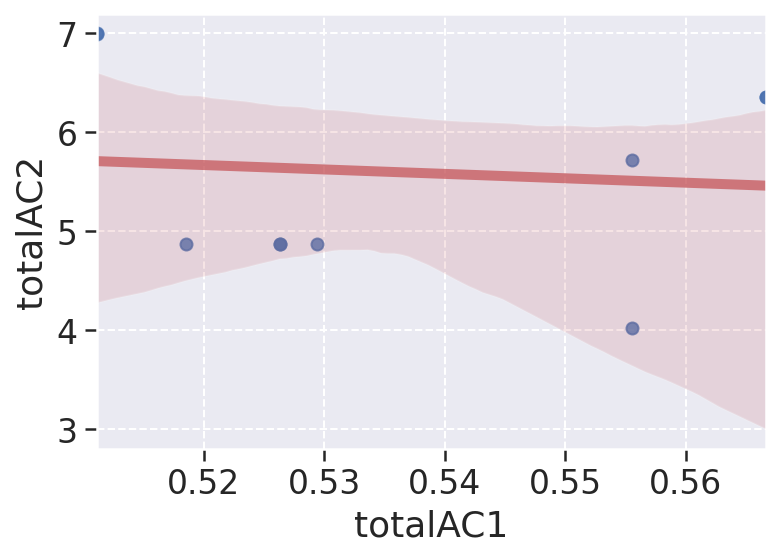

In [134]:
plot_linear_regression(eccoar_complaint_metrics)

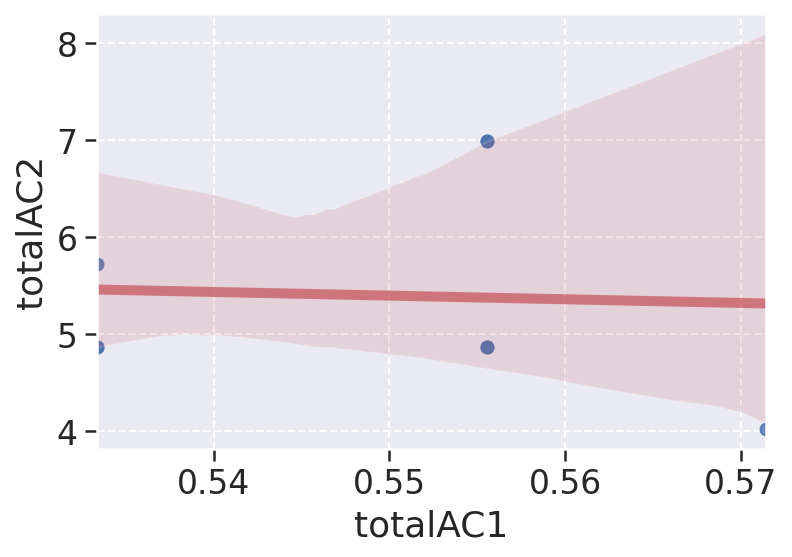

In [135]:
plot_linear_regression(eccoar_mailer_metrics)

In [136]:
plot_linear_regression(eccoar_users_metrics)

In [137]:
plot_linear_regression(eccoar_reports_metrics)

# Descriptive Statistic Analysis

- Realizes the calculation of statistic data such as mean, median, mode, min, max, standard deviation and variance.

In [138]:
def descriptive_statistics(df):
    
    metrics = df.describe()
    variance = df.var()
    variance_df = pd.DataFrame(variance, columns=["var"])
    variance_df = variance_df.T
    return metrics.append(variance_df).T

In [139]:
descriptive_statistics(eccoar_complaint_metrics)

count        mean         std         min         25%         50%  \
m1         10.0    0.610169    0.066453    0.533333    0.561404    0.583591   
m2         10.0    0.000000    0.000000    0.000000    0.000000    0.000000   
m3         10.0    1.000000    0.000000    1.000000    1.000000    1.000000   
ncloc      10.0  577.100000  189.824158  163.000000  479.500000  606.500000   
m7         10.0    5.549000    0.882427    4.660000    5.080000    5.295000   
m9         10.0    5.635000    1.385113    3.390000    4.660000    5.505000   
asc1       10.0    0.536723    0.022151    0.511111    0.520468    0.527864   
ac1        10.0    0.536723    0.022151    0.511111    0.520468    0.527864   
totalAC1   10.0    0.536723    0.022151    0.511111    0.520468    0.527864   
asc2       10.0    5.592000    1.035168    4.025000    4.870000    5.295000   
totalAC2   10.0    5.592000    1.035168    4.025000    4.870000    5.295000   

                 75%         max           var  
m1          0.666667    0.700000      0.004416  
m2          0.000000    0.000000      0.000000  
m3          1.000000    1.000000      0.000000  
ncloc     689.750000  832.000000  36033.211111  
m7          5.930000    7.630000      0.778677  
m9          6.675000    8.050000      1.918539  
asc1        0.555556    0.566667      0.000491  
ac1         0.555556    0.566667      0.000491  
totalAC1    0.555556    0.566667      0.000491  
asc2        6.355000    6.995000      1.071573  
totalAC2    6.355000    6.995000      1.071573

In [140]:
descriptive_statistics(eccoar_gateway_metrics)

count        mean        std      min      25%         50%  \
m1         10.0    0.928409   0.062483    0.875    0.875    0.892045   
m2         10.0    0.000000   0.000000    0.000    0.000    0.000000   
m3         10.0    1.000000   0.000000    1.000    1.000    1.000000   
ncloc      10.0  295.700000  94.558683  110.000  258.750  305.000000   
m7         10.0    5.549000   0.882427    4.660    5.080    5.295000   
m9         10.0    5.635000   1.385113    3.390    4.660    5.505000   
asc1       10.0    0.642803   0.020828    0.625    0.625    0.630682   
ac1        10.0    0.642803   0.020828    0.625    0.625    0.630682   
totalAC1   10.0    0.642803   0.020828    0.625    0.625    0.630682   
asc2       10.0    5.592000   1.035168    4.025    4.870    5.295000   
totalAC2   10.0    5.592000   1.035168    4.025    4.870    5.295000   

                 75%         max          var  
m1          1.000000    1.000000     0.003904  
m2          0.000000    0.000000     0.000000  
m3          1.000000    1.000000     0.000000  
ncloc     317.000000  494.000000  8941.344444  
m7          5.930000    7.630000     0.778677  
m9          6.675000    8.050000     1.918539  
asc1        0.666667    0.666667     0.000434  
ac1         0.666667    0.666667     0.000434  
totalAC1    0.666667    0.666667     0.000434  
asc2        6.355000    6.995000     1.071573  
totalAC2    6.355000    6.995000     1.071573

In [141]:
descriptive_statistics(eccoar_frontend_metrics)

count         mean         std         min          25%  \
m1         11.0     0.889958    0.019513    0.850000     0.875000   
m2         11.0     0.036681    0.006504    0.029412     0.031250   
m3         11.0     1.000000    0.000000    1.000000     1.000000   
ncloc      11.0  1369.909091  382.058491  657.000000  1100.000000   
m7         11.0     5.430000    0.906256    4.660000     4.660000   
m9         11.0     5.622727    1.301177    3.390000     4.870000   
asc1       11.0     0.642213    0.004336    0.633333     0.638889   
ac1        11.0     0.642213    0.004336    0.633333     0.638889   
totalAC1   11.0     0.642213    0.004336    0.633333     0.638889   
asc2       11.0     5.526364    1.005885    4.025000     4.870000   
totalAC2   11.0     5.526364    1.005885    4.025000     4.870000   

                  50%          75%          max            var  
m1           0.888889     0.906250     0.911765       0.000381  
m2           0.037037     0.041667     0.050000       0.000042  
m3           1.000000     1.000000     1.000000       0.000000  
ncloc     1280.000000  1618.000000  1996.000000  145968.690909  
m7           5.080000     5.930000     7.630000       0.821300  
m9           5.080000     6.570000     8.050000       1.693062  
asc1         0.641975     0.645833     0.647059       0.000019  
ac1          0.641975     0.645833     0.647059       0.000019  
totalAC1     0.641975     0.645833     0.647059       0.000019  
asc2         4.870000     6.355000     6.995000       1.011805  
totalAC2     4.870000     6.355000     6.995000       1.011805

In [142]:
descriptive_statistics(eccoar_reports_metrics)

count        mean        std        min         25%         50%  \
m1          6.0    0.775926   0.116198   0.700000    0.700000    0.738889   
m2          6.0    0.000000   0.000000   0.000000    0.000000    0.000000   
m3          6.0    1.000000   0.000000   1.000000    1.000000    1.000000   
ncloc       6.0  197.333333  83.653253  28.000000  218.000000  229.000000   
m7          6.0    5.648333   1.062853   4.660000    5.080000    5.295000   
m9          6.0    5.508333   1.630330   3.390000    4.660000    5.295000   
asc1        6.0    0.591975   0.038733   0.566667    0.566667    0.579630   
ac1         6.0    0.591975   0.038733   0.566667    0.566667    0.579630   
totalAC1    6.0    0.591975   0.038733   0.566667    0.566667    0.579630   
asc2        6.0    5.578333   1.219519   4.025000    4.870000    5.295000   
totalAC2    6.0    5.578333   1.219519   4.025000    4.870000    5.295000   

                 75%         max          var  
m1          0.777778    1.000000     0.013502  
m2          0.000000    0.000000     0.000000  
m3          1.000000    1.000000     0.000000  
ncloc     240.000000  240.000000  6997.866667  
m7          5.825000    7.630000     1.129657  
m9          6.252500    8.050000     2.657977  
asc1        0.592593    0.666667     0.001500  
ac1         0.592593    0.666667     0.001500  
totalAC1    0.592593    0.666667     0.001500  
asc2        6.672500    6.995000     1.487227  
totalAC2    6.672500    6.995000     1.487227

In [143]:
descriptive_statistics(eccoar_users_metrics)

count        mean        std         min         25%         50%  \
m1          6.0    0.777778   0.172133    0.666667    0.666667    0.666667   
m2          6.0    0.000000   0.000000    0.000000    0.000000    0.000000   
m3          6.0    1.000000   0.000000    1.000000    1.000000    1.000000   
ncloc       6.0  195.666667  78.313898  117.000000  132.750000  180.000000   
m7          6.0    5.578333   1.120061    4.660000    4.765000    5.295000   
m9          6.0    5.366667   1.248225    3.390000    4.765000    5.505000   
asc1        6.0    0.592593   0.057378    0.555556    0.555556    0.555556   
ac1         6.0    0.592593   0.057378    0.555556    0.555556    0.555556   
totalAC1    6.0    0.592593   0.057378    0.555556    0.555556    0.555556   
asc2        6.0    5.472500   1.093557    4.025000    4.870000    5.295000   
totalAC2    6.0    5.472500   1.093557    4.025000    4.870000    5.295000   

                 75%         max          var  
m1          0.916667    1.000000     0.029630  
m2          0.000000    0.000000     0.000000  
m3          1.000000    1.000000     0.000000  
ncloc     262.500000  290.000000  6133.066667  
m7          5.825000    7.630000     1.254537  
m9          6.252500    6.780000     1.558067  
asc1        0.638889    0.666667     0.003292  
ac1         0.638889    0.666667     0.003292  
totalAC1    0.638889    0.666667     0.003292  
asc2        6.196250    6.995000     1.195867  
totalAC2    6.196250    6.995000     1.195867

In [144]:
descriptive_statistics(eccoar_mailer_metrics)

count        mean        std         min         25%         50%  \
m1          8.0    0.647619   0.042592    0.600000    0.600000    0.666667   
m2          8.0    0.000000   0.000000    0.000000    0.000000    0.000000   
m3          8.0    1.000000   0.000000    1.000000    1.000000    1.000000   
ncloc       8.0  203.625000  30.302935  132.000000  205.750000  208.000000   
m7          8.0    5.401250   1.008074    4.660000    4.660000    5.080000   
m9          8.0    5.401250   1.392074    3.390000    4.660000    5.080000   
asc1        8.0    0.549206   0.014197    0.533333    0.533333    0.555556   
ac1         8.0    0.549206   0.014197    0.533333    0.533333    0.555556   
totalAC1    8.0    0.549206   0.014197    0.533333    0.533333    0.555556   
asc2        8.0    5.401250   1.081582    4.025000    4.870000    4.870000   
totalAC2    8.0    5.401250   1.081582    4.025000    4.870000    4.870000   

                 75%         max         var  
m1          0.666667    0.714286    0.001814  
m2          0.000000    0.000000    0.000000  
m3          1.000000    1.000000    0.000000  
ncloc     224.000000  224.000000  918.267857  
m7          5.615000    7.630000    1.016212  
m9          6.037500    8.050000    1.937870  
asc1        0.555556    0.571429    0.000202  
ac1         0.555556    0.571429    0.000202  
totalAC1    0.555556    0.571429    0.000202  
asc2        6.037500    6.995000    1.169820  
totalAC2    6.037500    6.995000    1.169820

In [145]:
descriptive_statistics(file_component_metrics)

count         mean          std         min          25%  \
m1         15.0     0.788222     0.072292    0.666667     0.750000   
m2         15.0     0.014088     0.011329    0.000000     0.005263   
m3         15.0     1.000000     0.000000    1.000000     1.000000   
ncloc      15.0  1852.266667  1094.903092  207.000000  1119.500000   
m7         15.0     5.365333     0.812324    4.660000     4.660000   
m9         15.0     5.535333     1.204265    3.390000     4.660000   
asc1       15.0     0.600770     0.026675    0.555556     0.586418   
ac1        15.0     0.600770     0.026675    0.555556     0.586418   
totalAC1   15.0     0.600770     0.026675    0.555556     0.586418   
asc2       15.0     5.450333     0.926222    4.025000     4.870000   
totalAC2   15.0     5.450333     0.926222    4.025000     4.870000   

                  50%          75%          max           var  
m1           0.778947     0.836538     0.906250  5.226192e-03  
m2           0.014286     0.019231     0.037037  1.283446e-04  
m3           1.000000     1.000000     1.000000  0.000000e+00  
ncloc     1665.000000  2493.500000  4076.000000  1.198813e+06  
m7           5.080000     5.930000     7.630000  6.598695e-01  
m9           5.080000     6.570000     8.050000  1.450255e+00  
asc1         0.596491     0.618590     0.645833  7.115348e-04  
ac1          0.596491     0.618590     0.645833  7.115348e-04  
totalAC1     0.596491     0.618590     0.645833  7.115348e-04  
asc2         4.870000     6.355000     6.995000  8.578874e-01  
totalAC2     4.870000     6.355000     6.995000  8.578874e-01

### Data visualization

- You must do this for each of your repositories

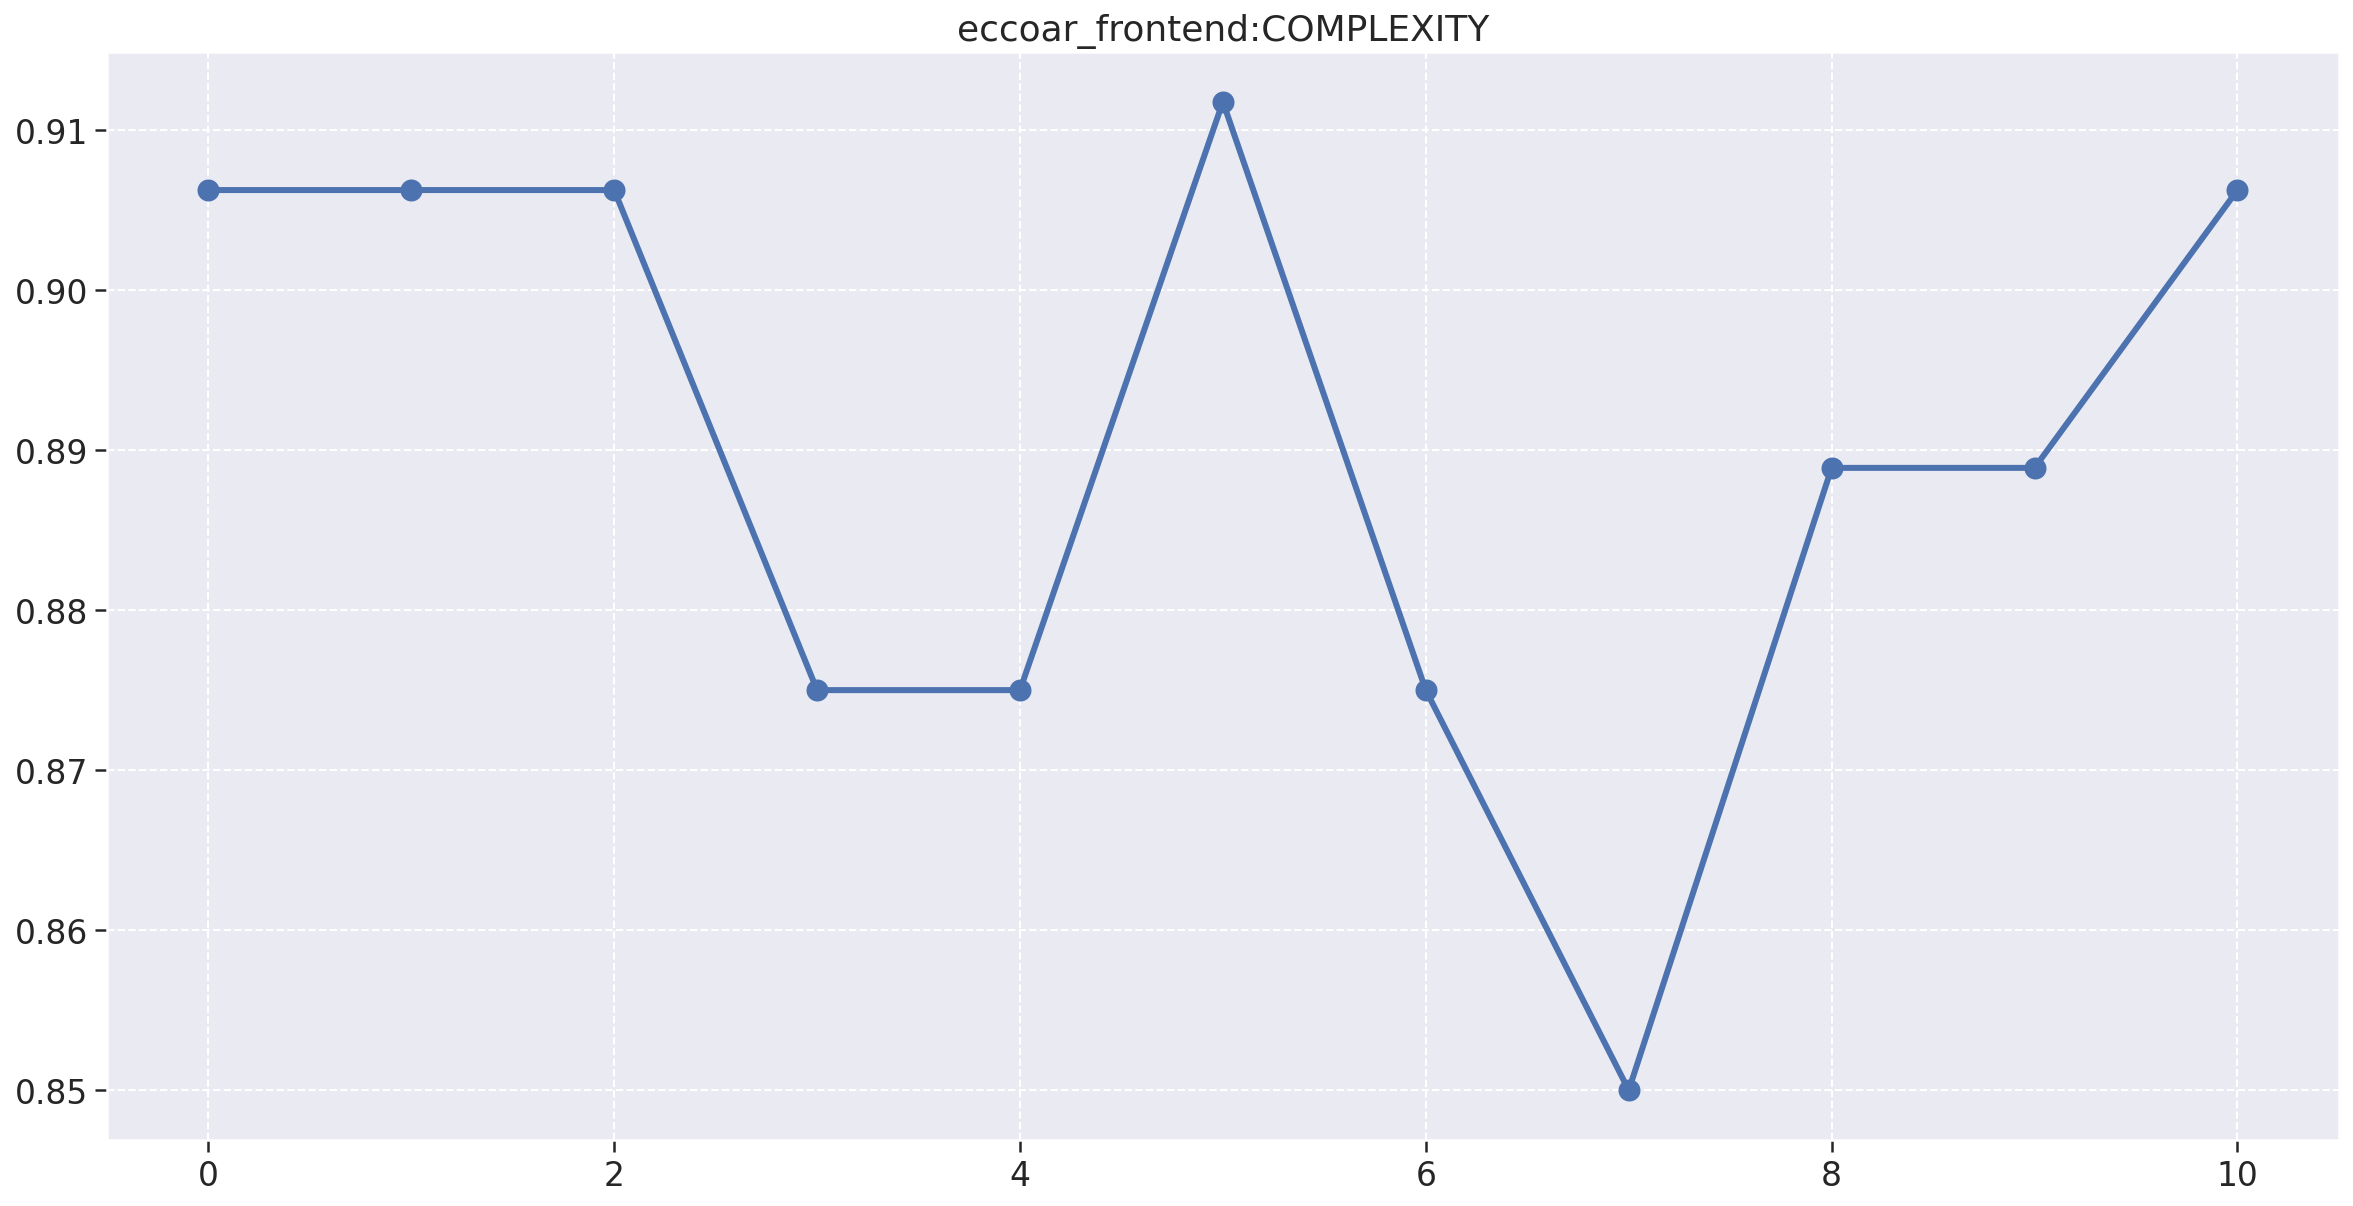

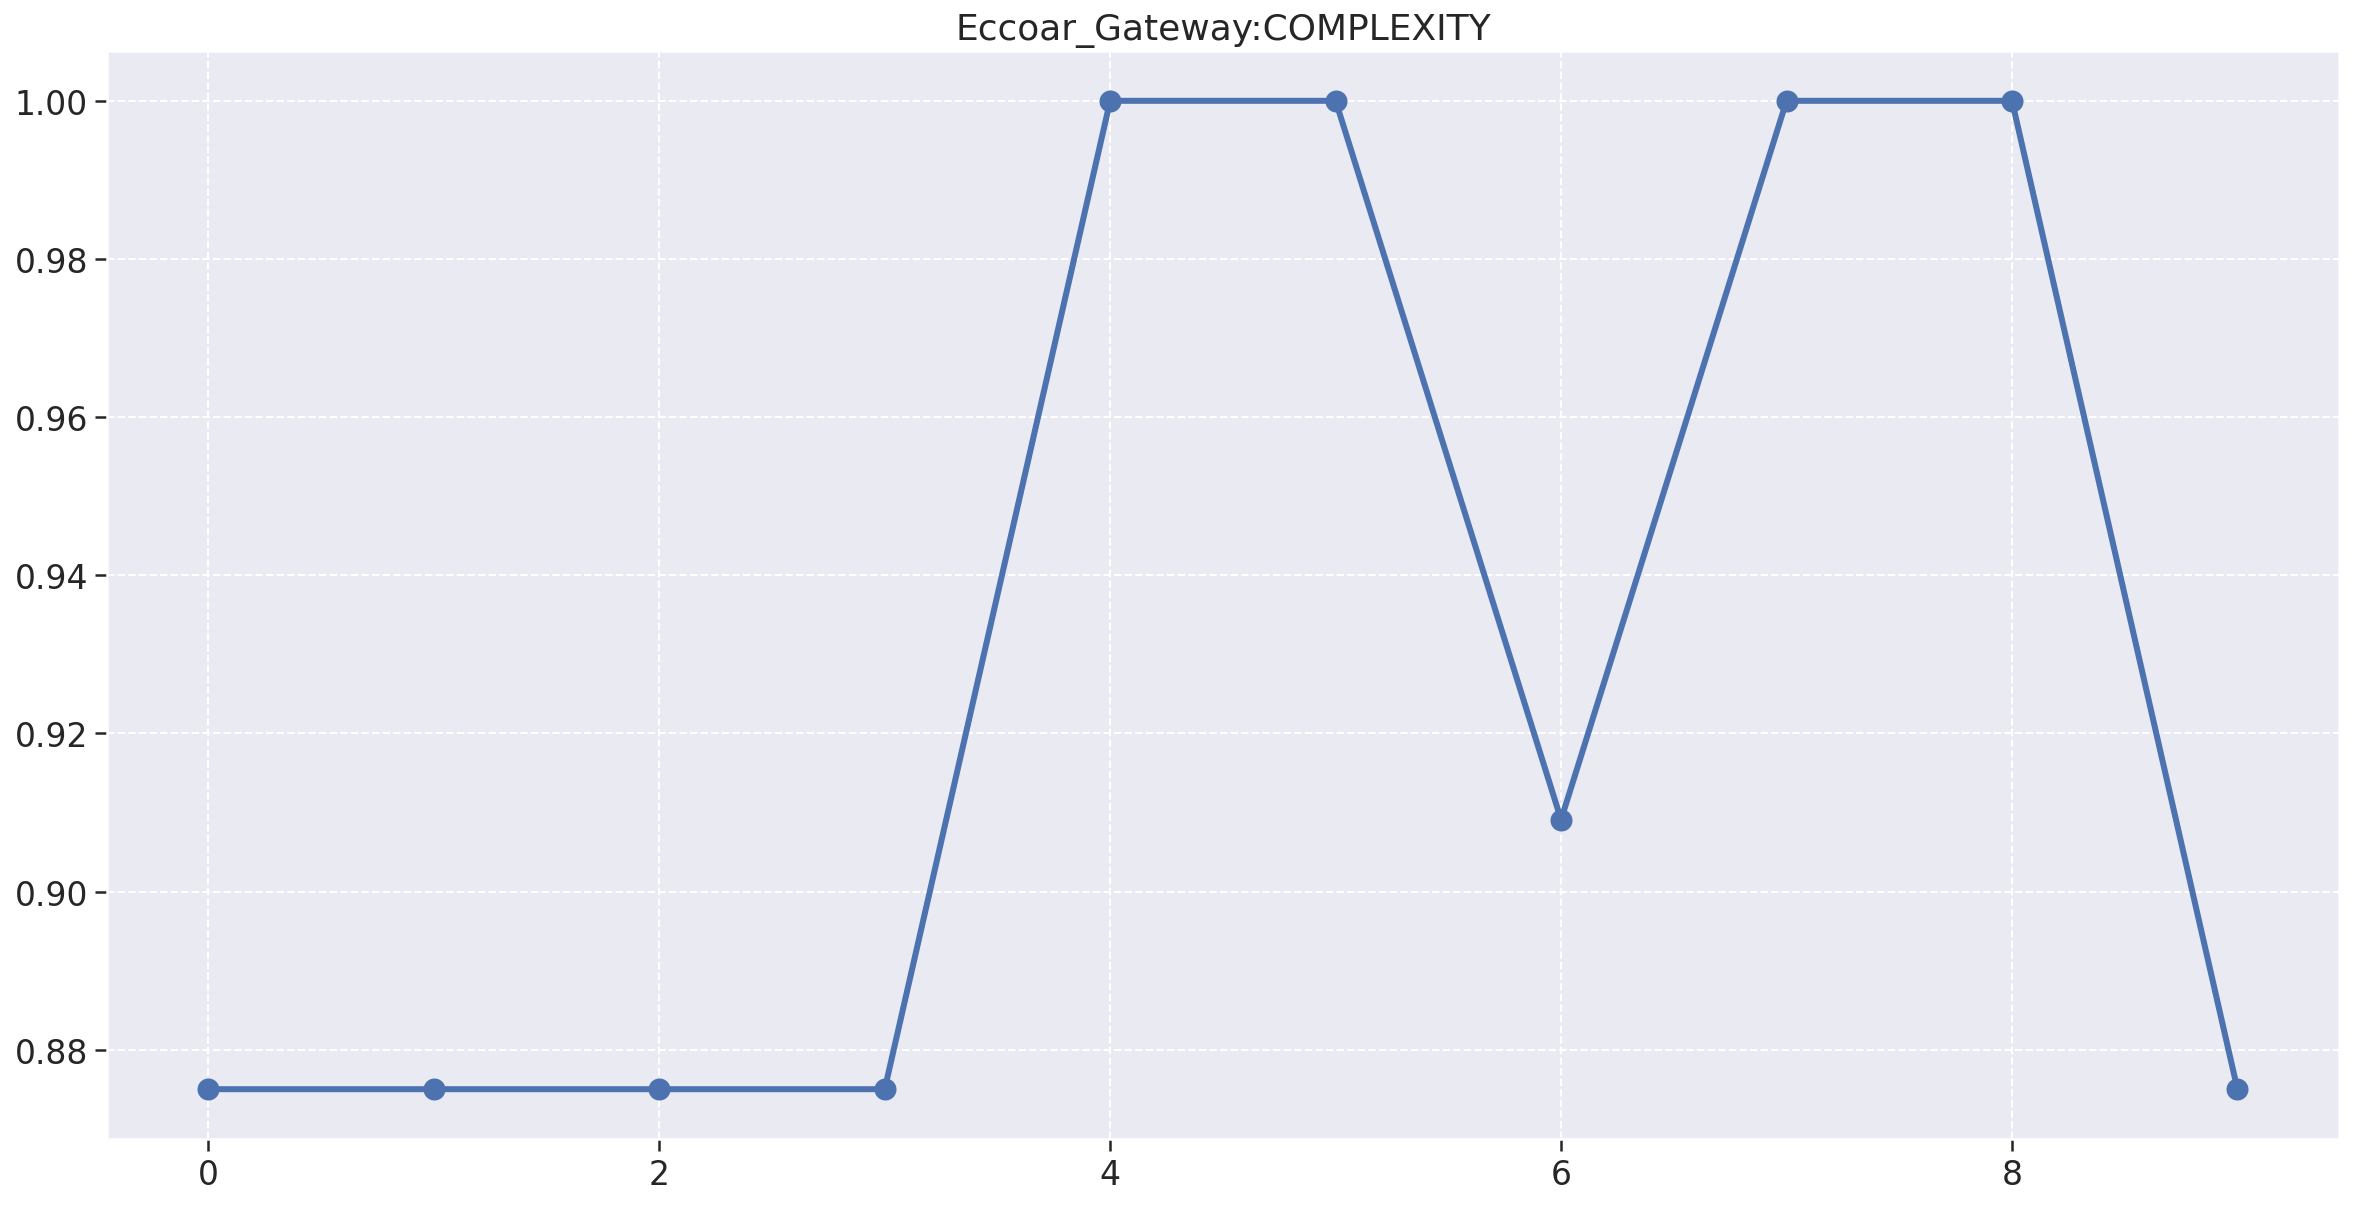

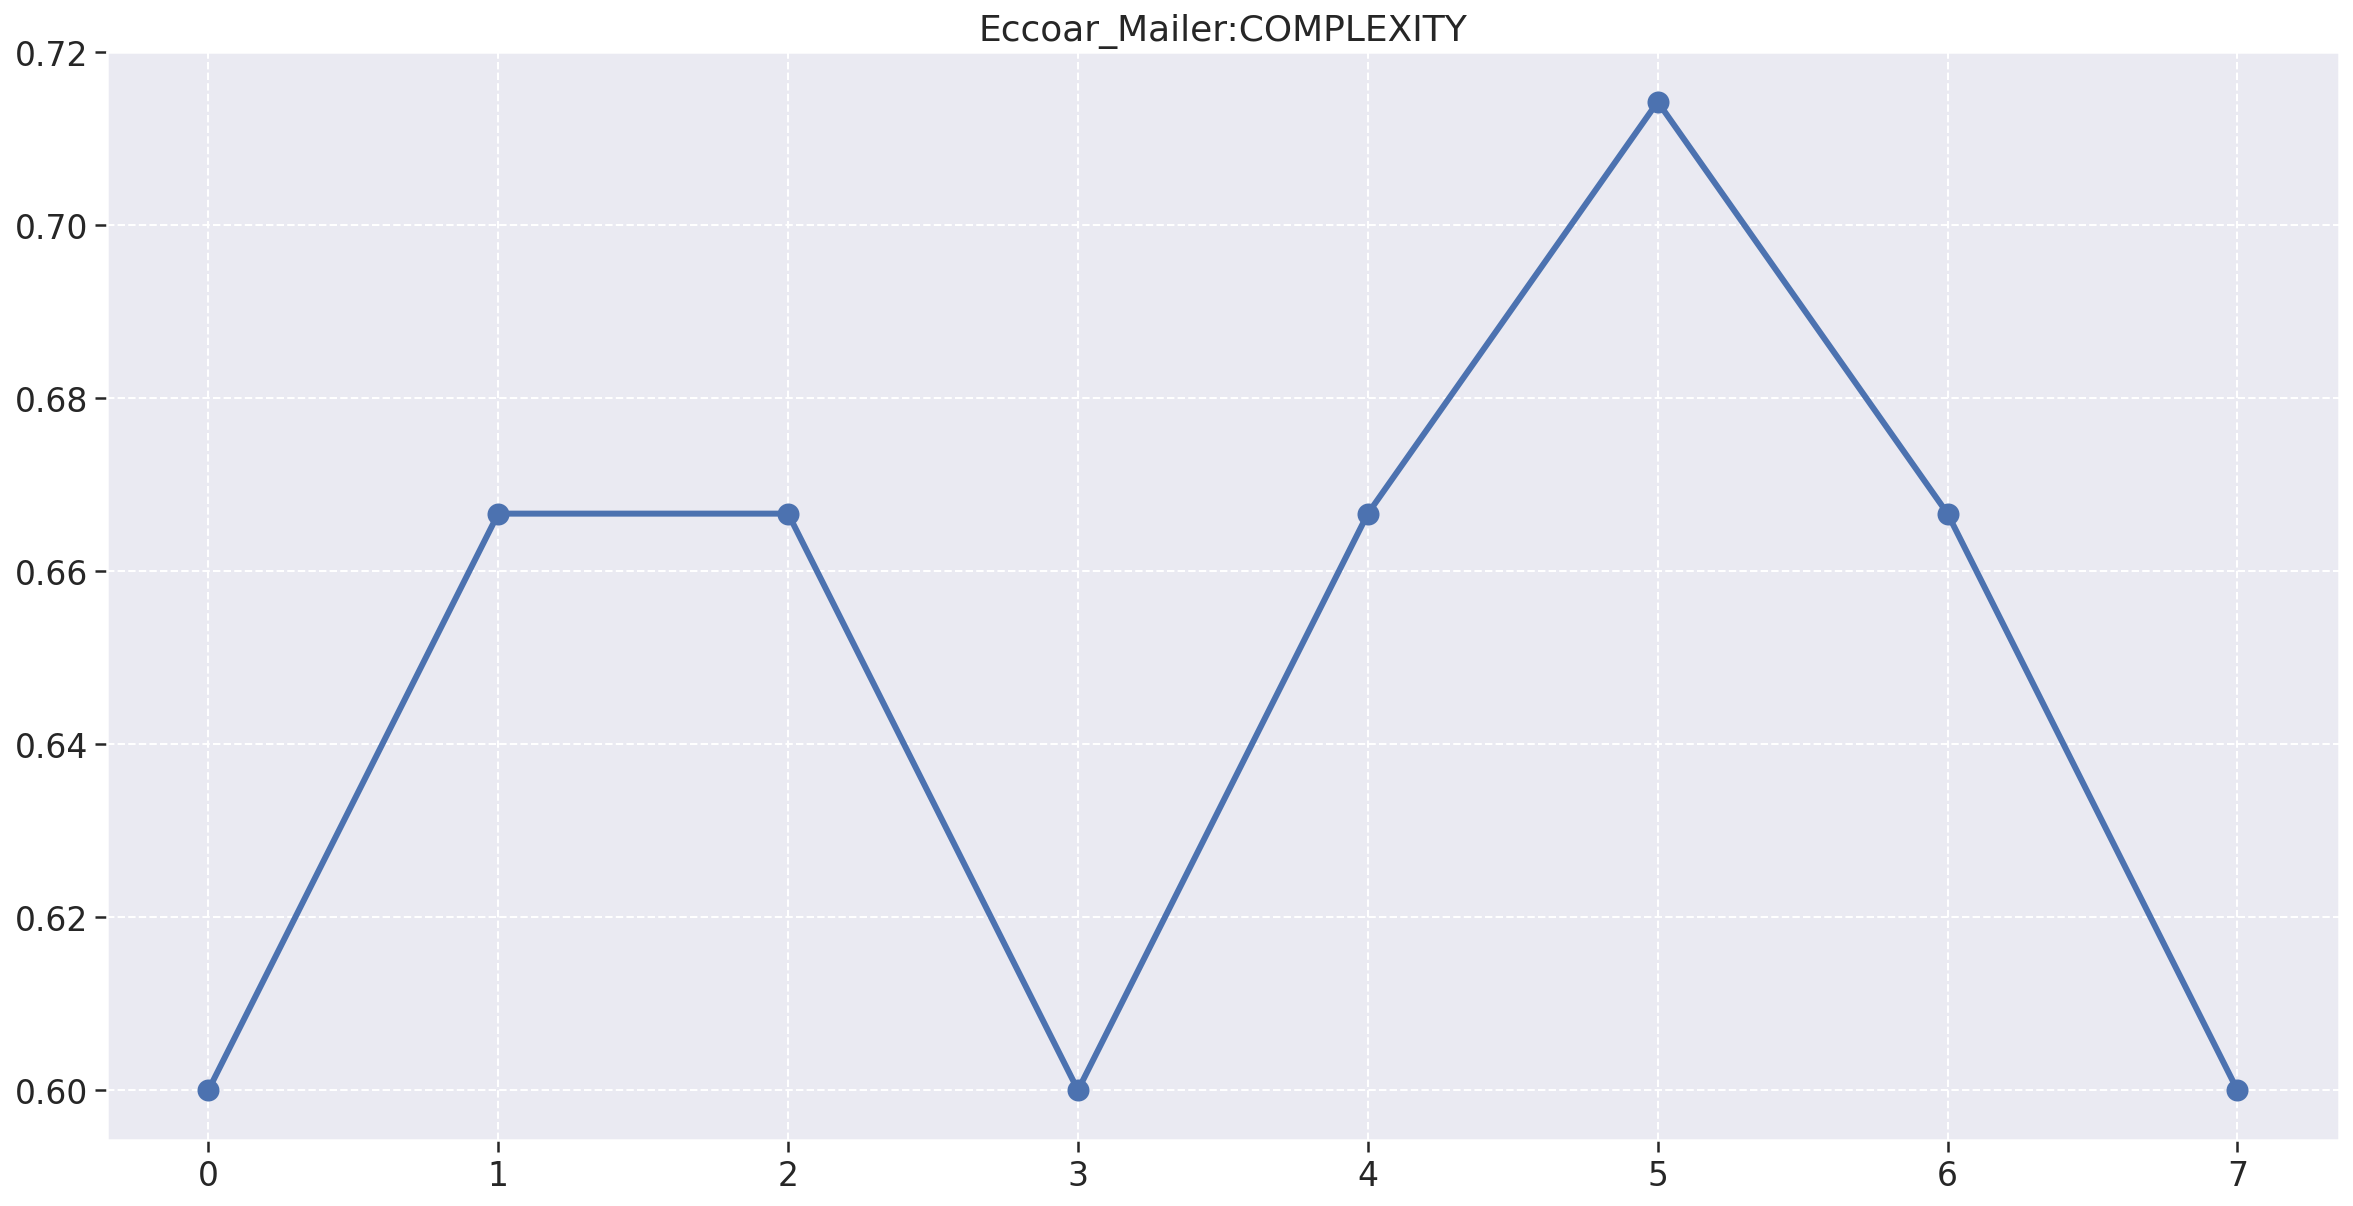

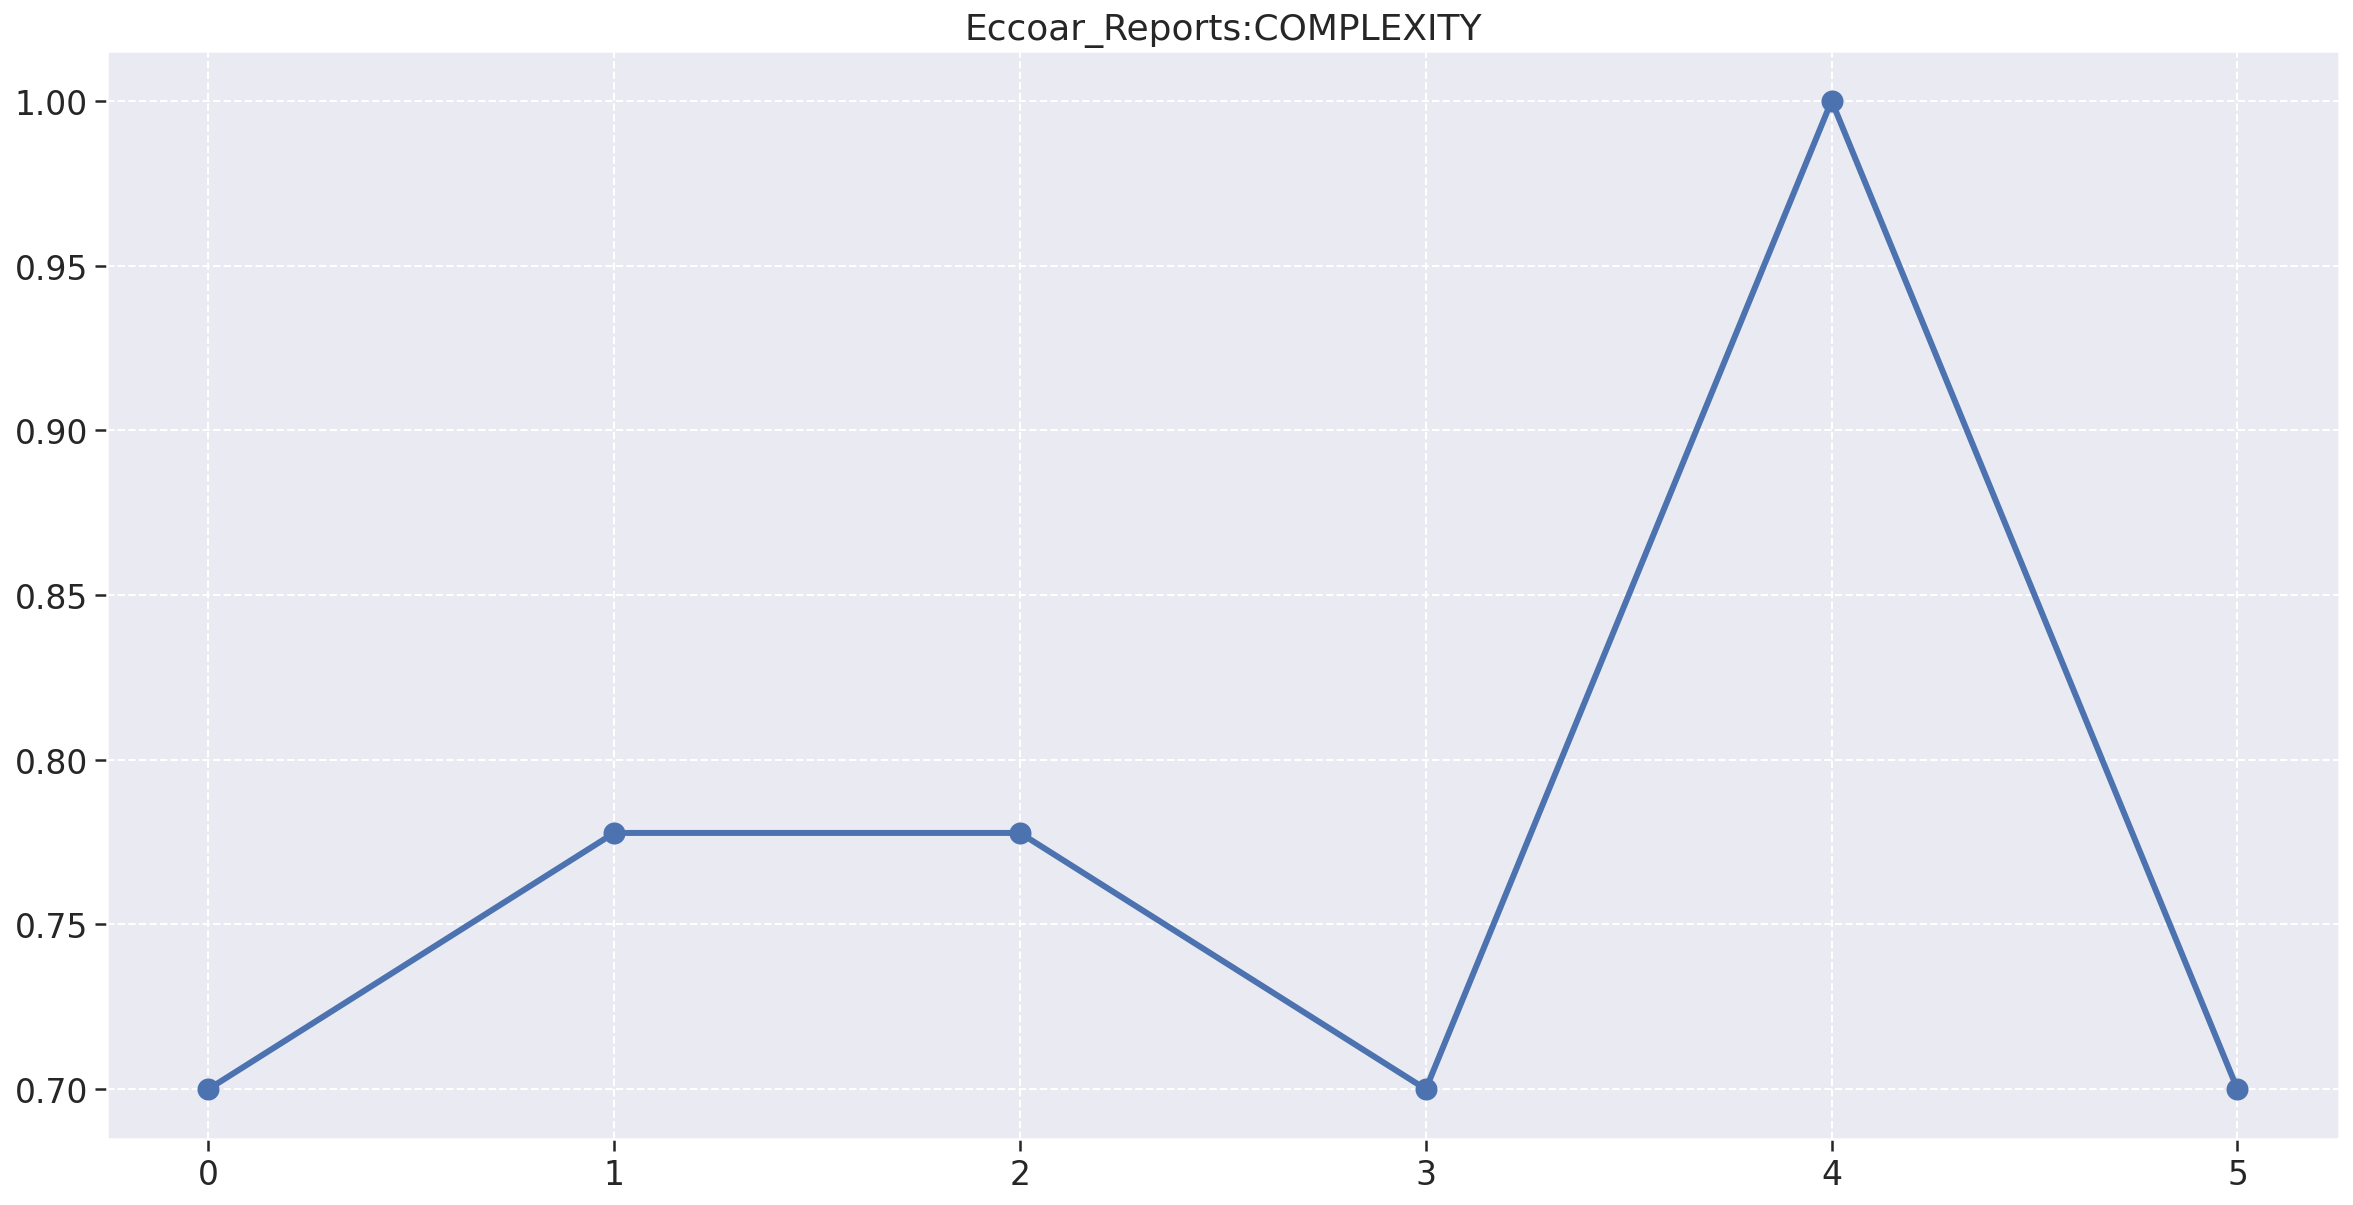

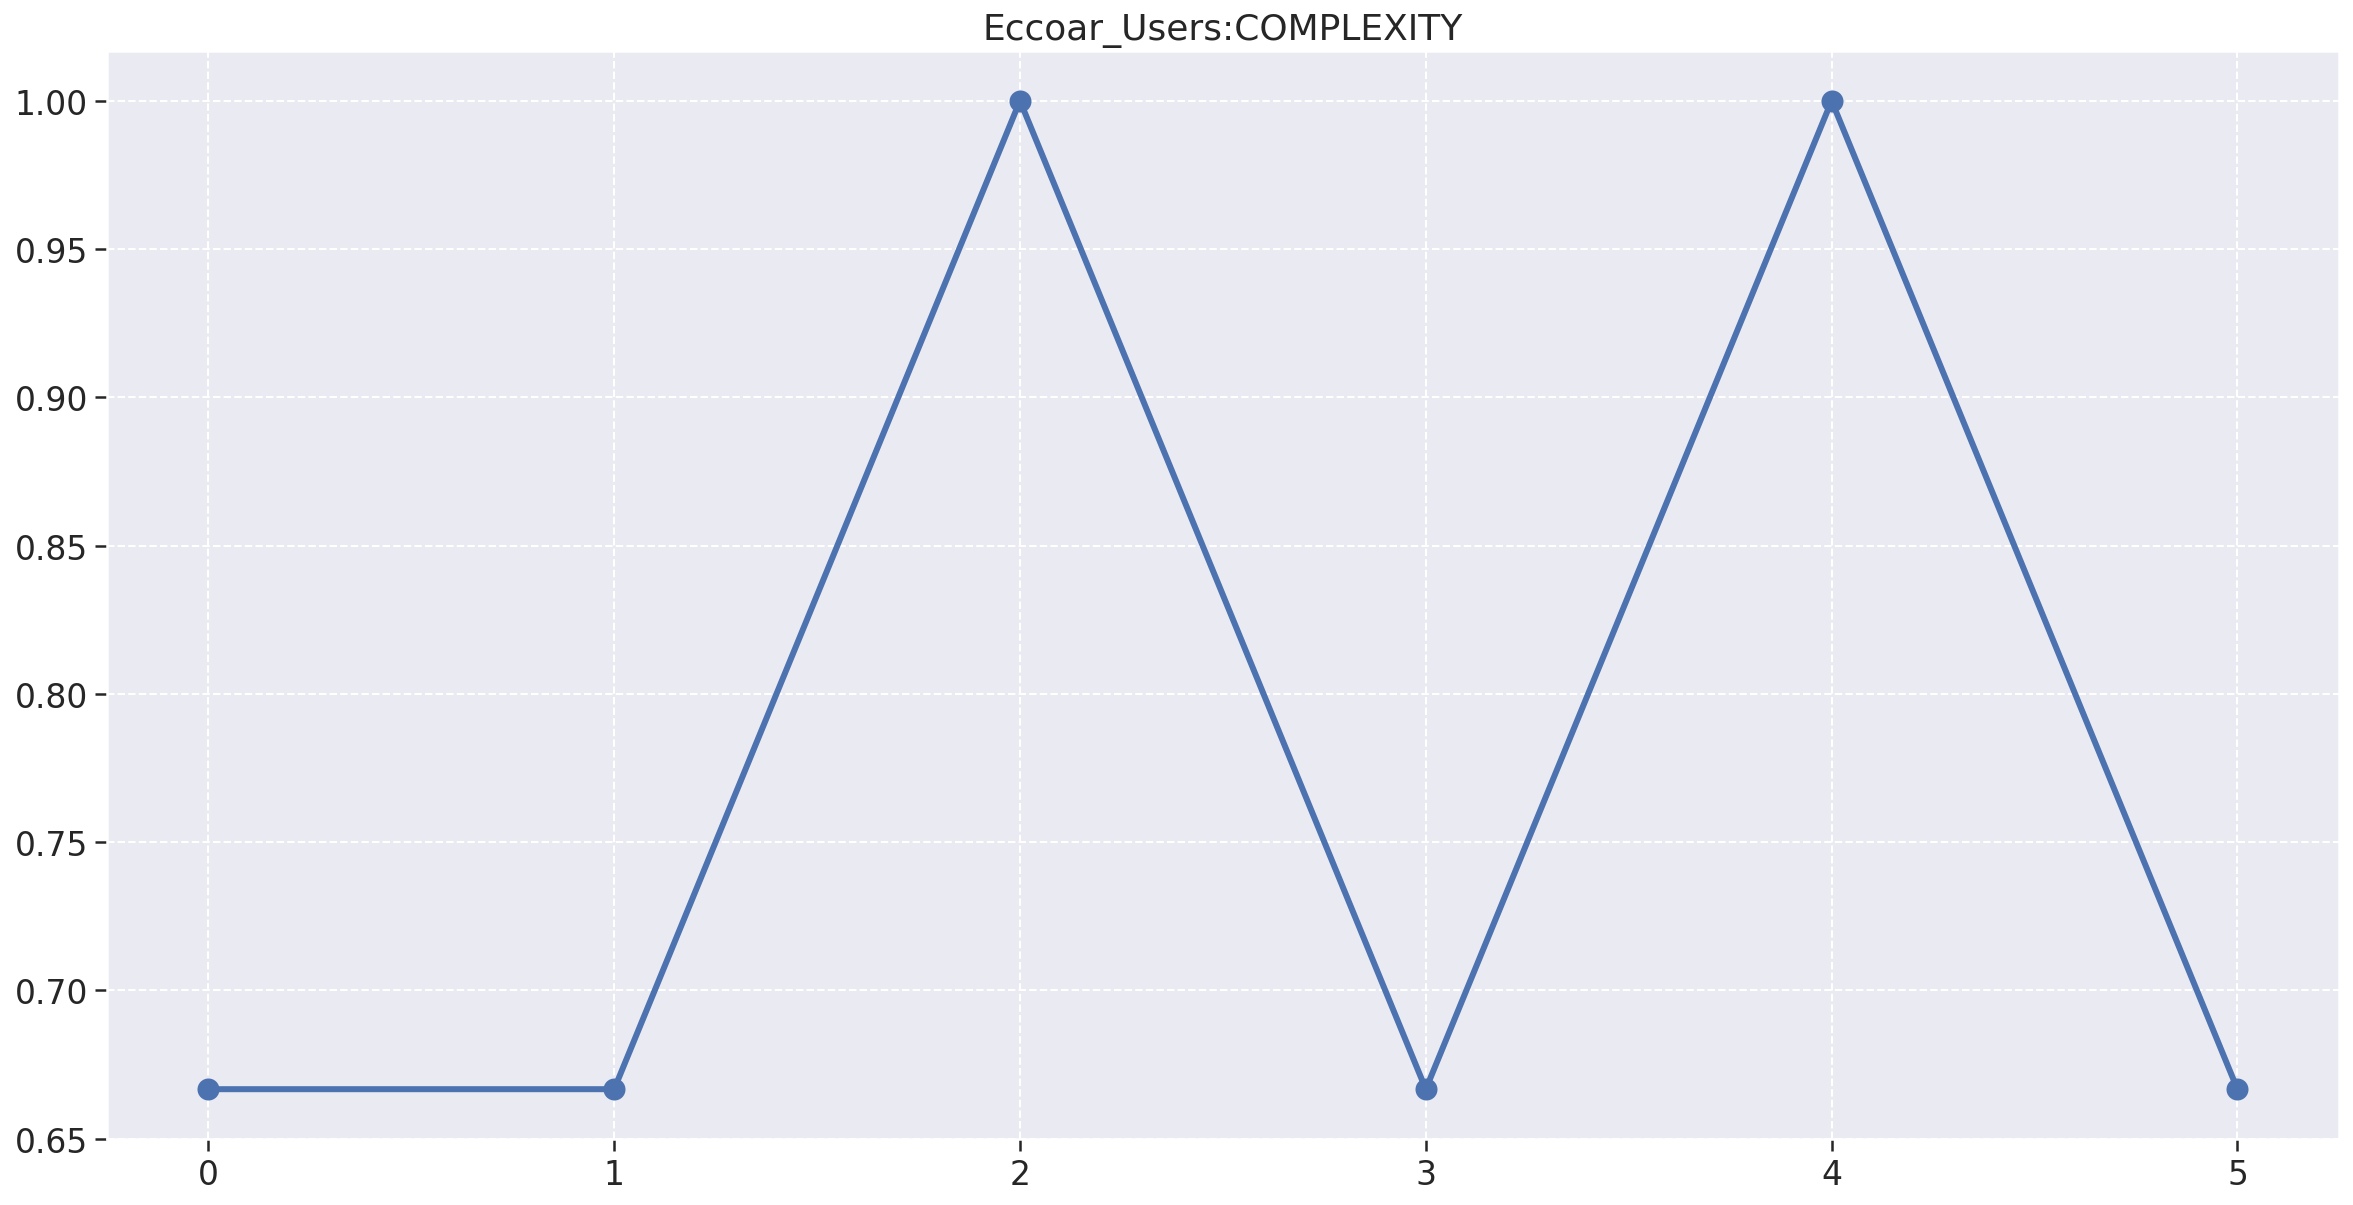

In [146]:
for repository, metrics_df in repository_metrics.items(): 
    fig = plt.figure(figsize=(20, 10))
    plt.title(f"{repository}:COMPLEXITY")
    plt.plot(metrics_df['m1'], linewidth=3, marker='o', markersize=10)

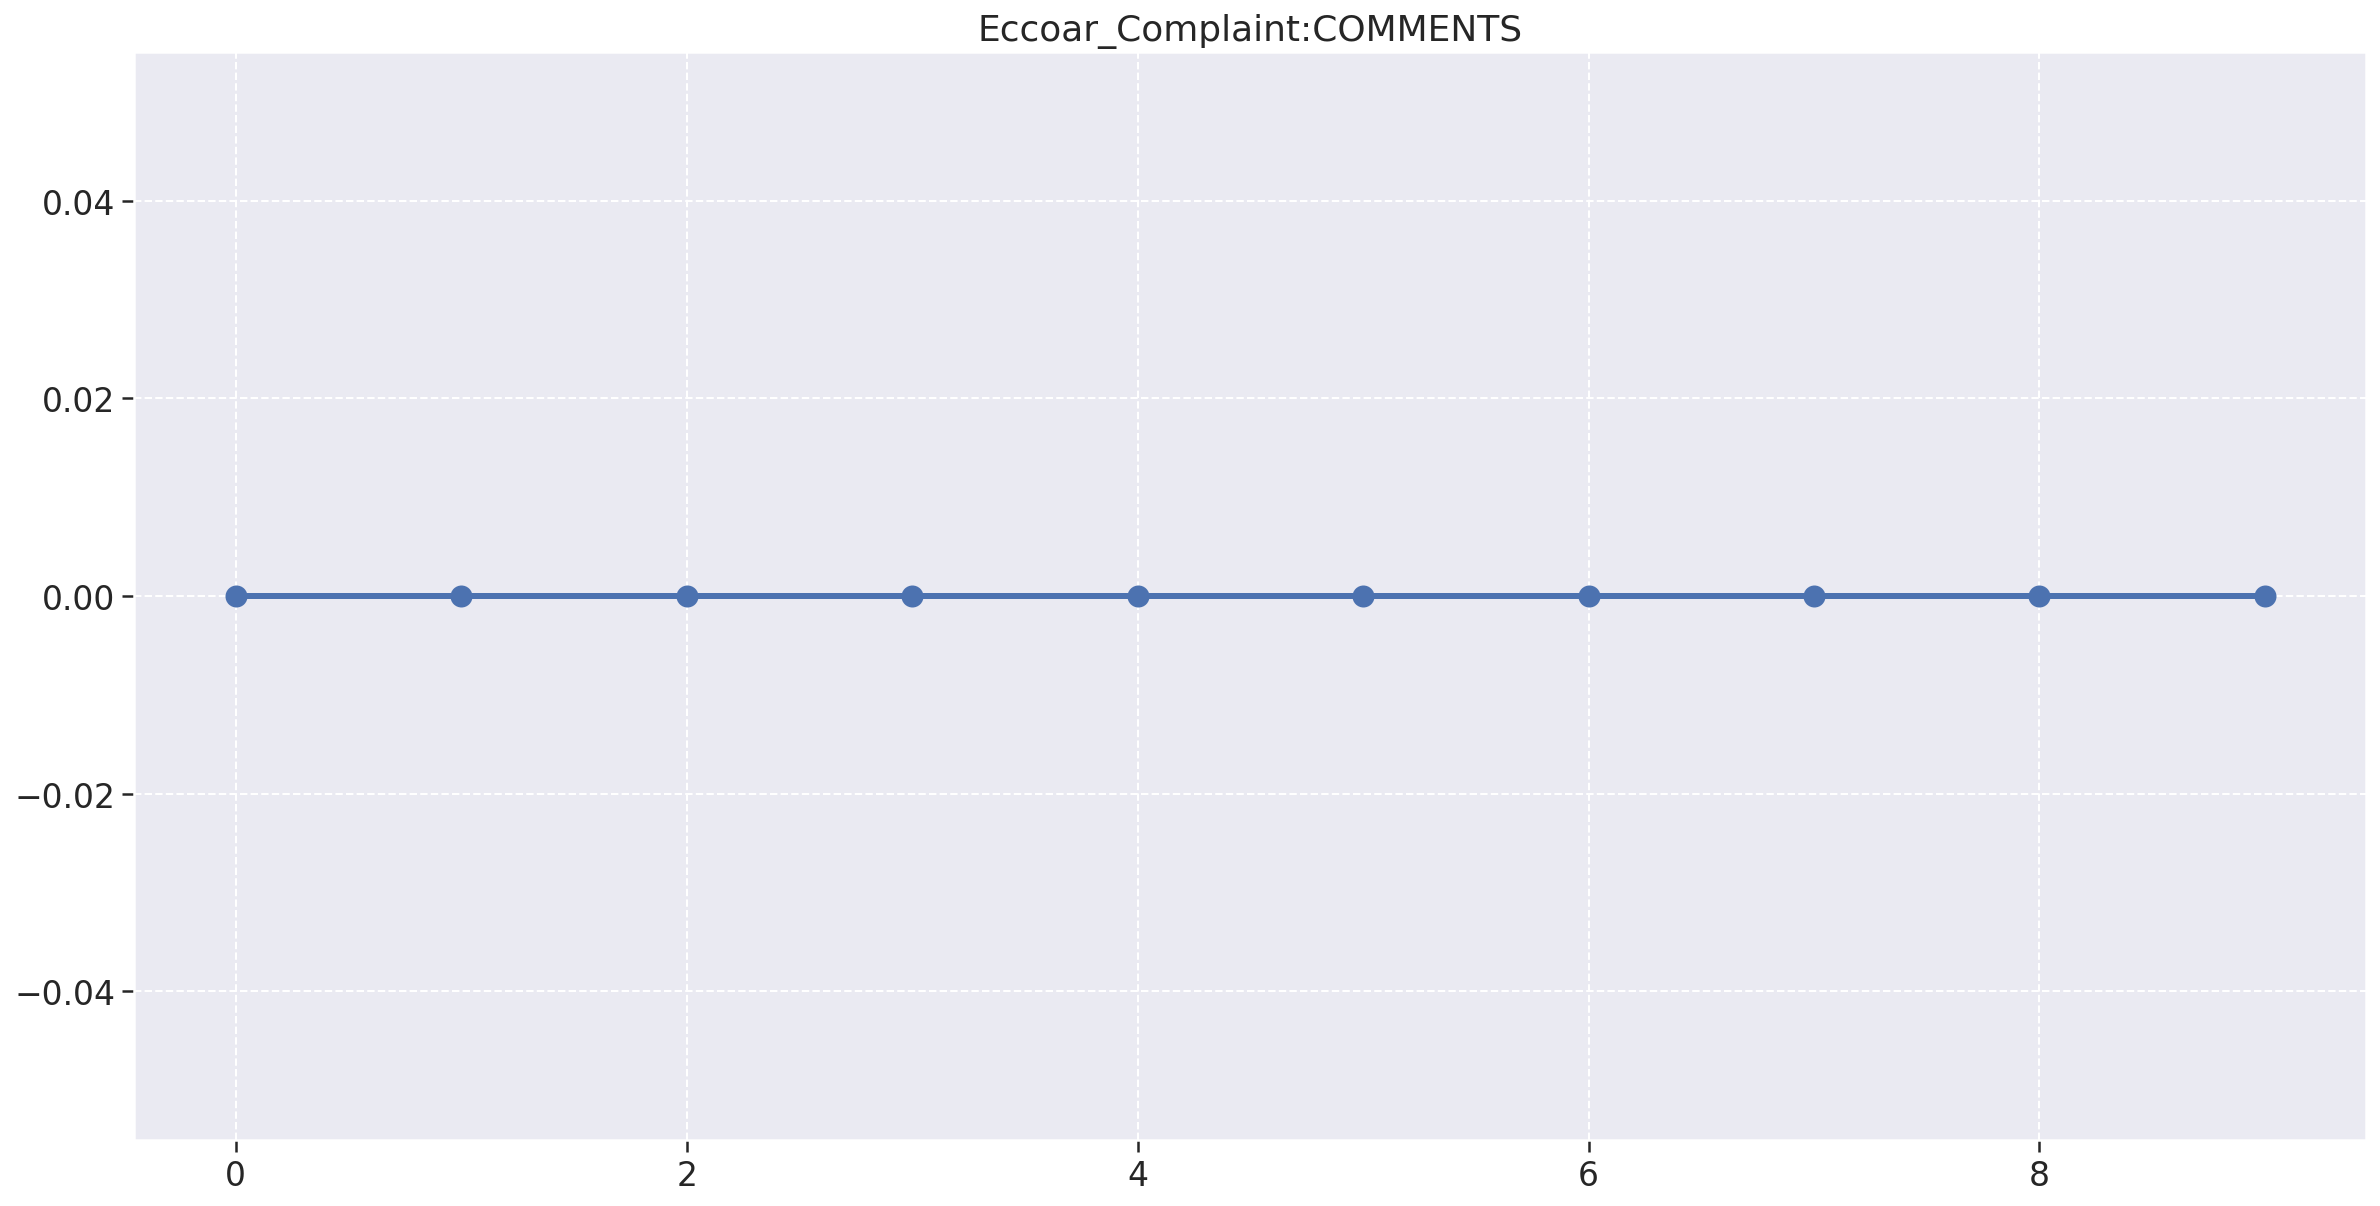

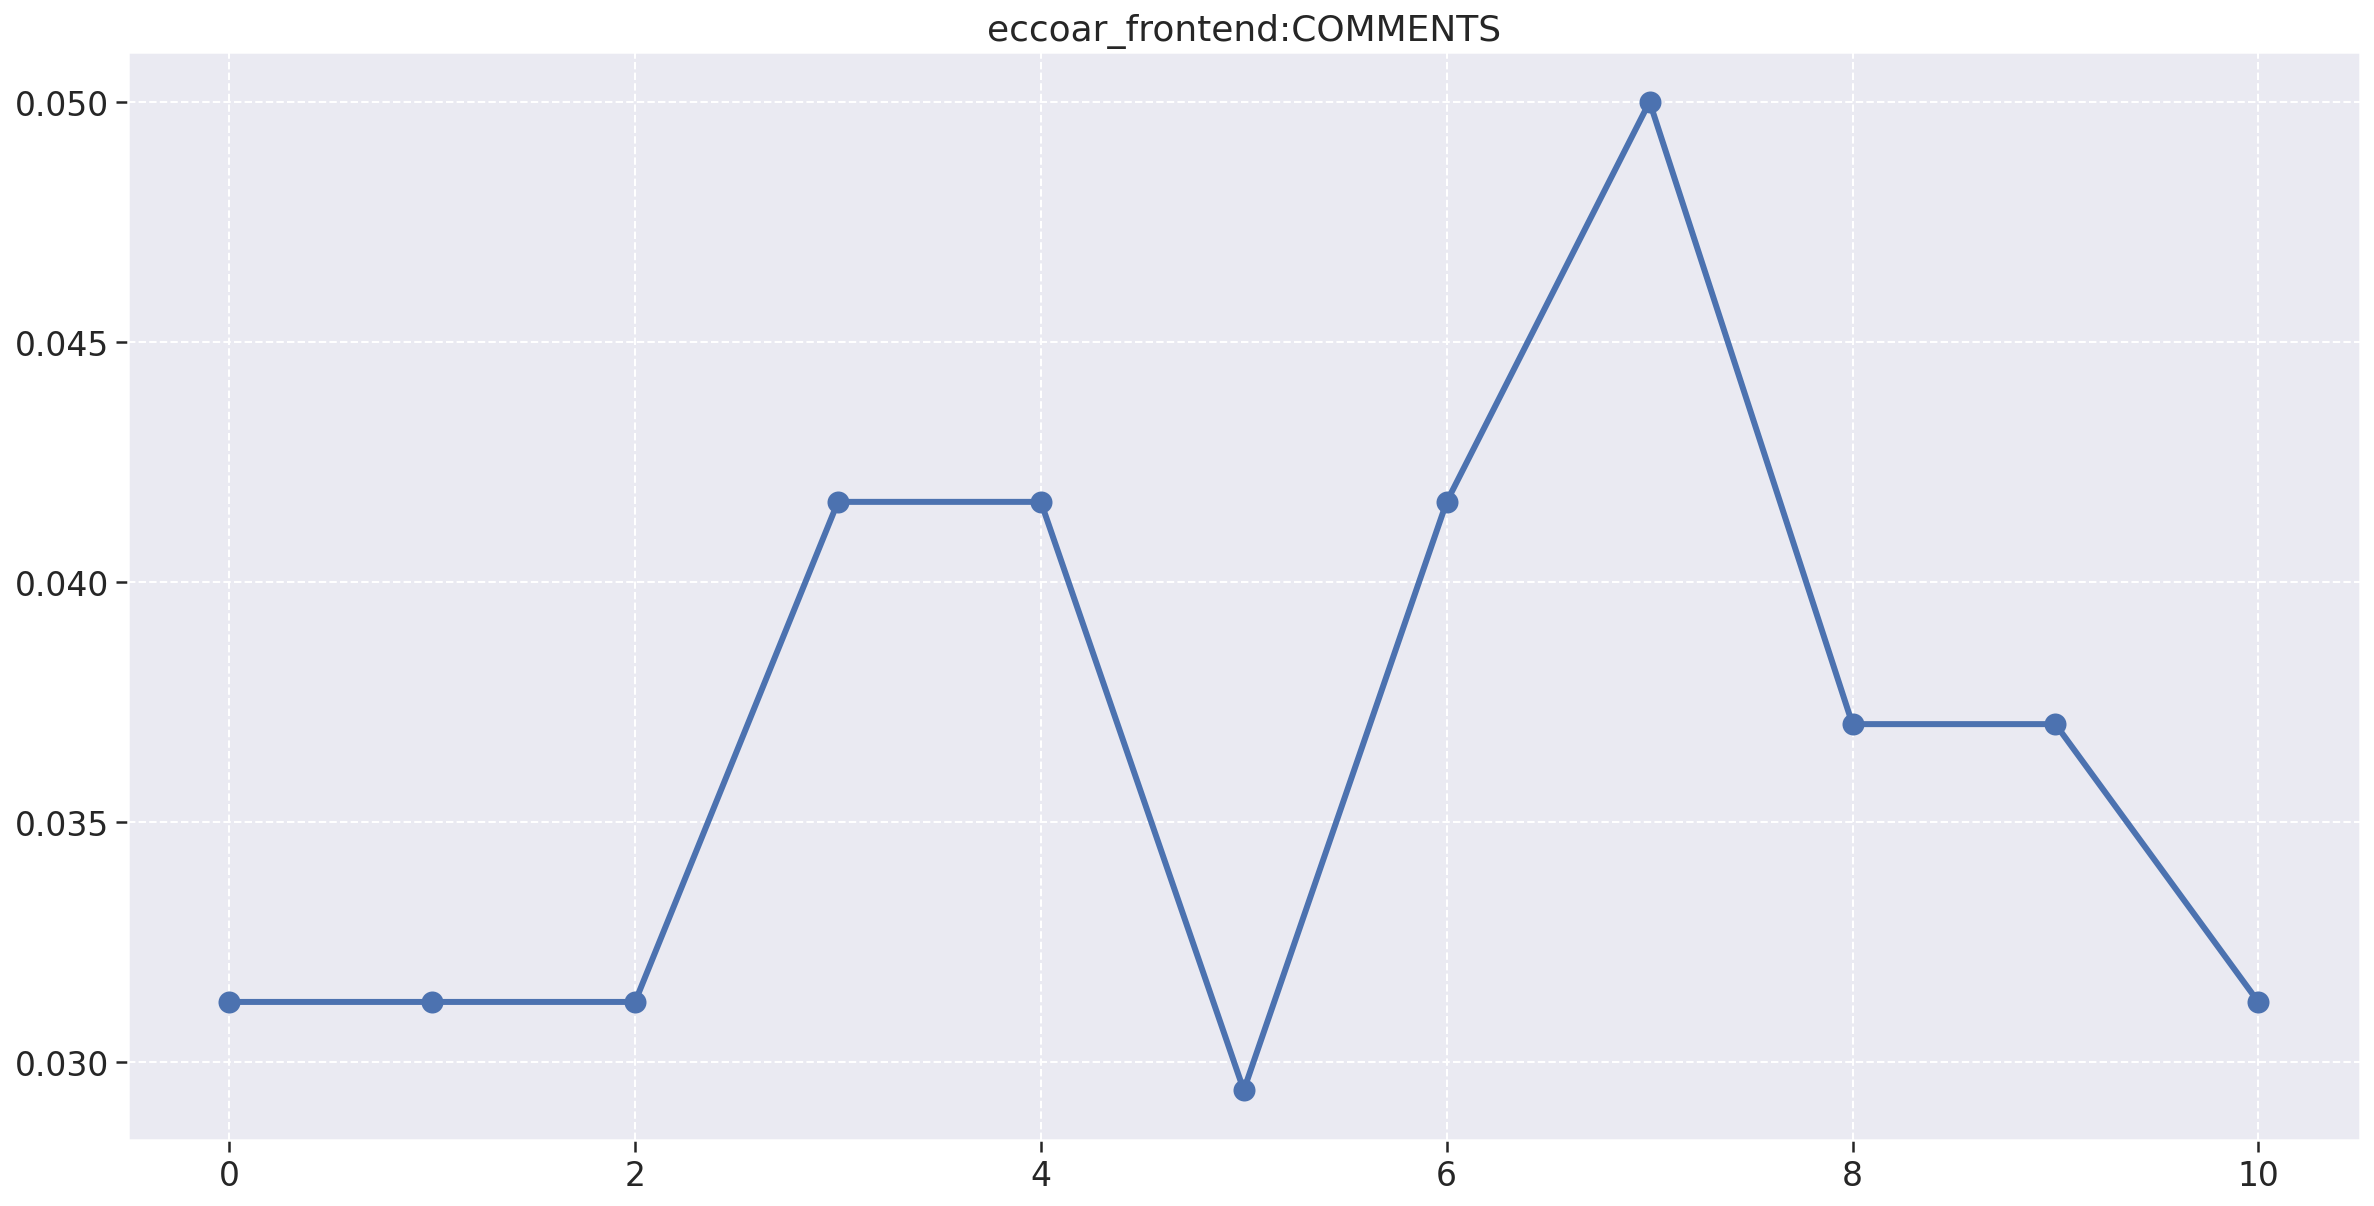

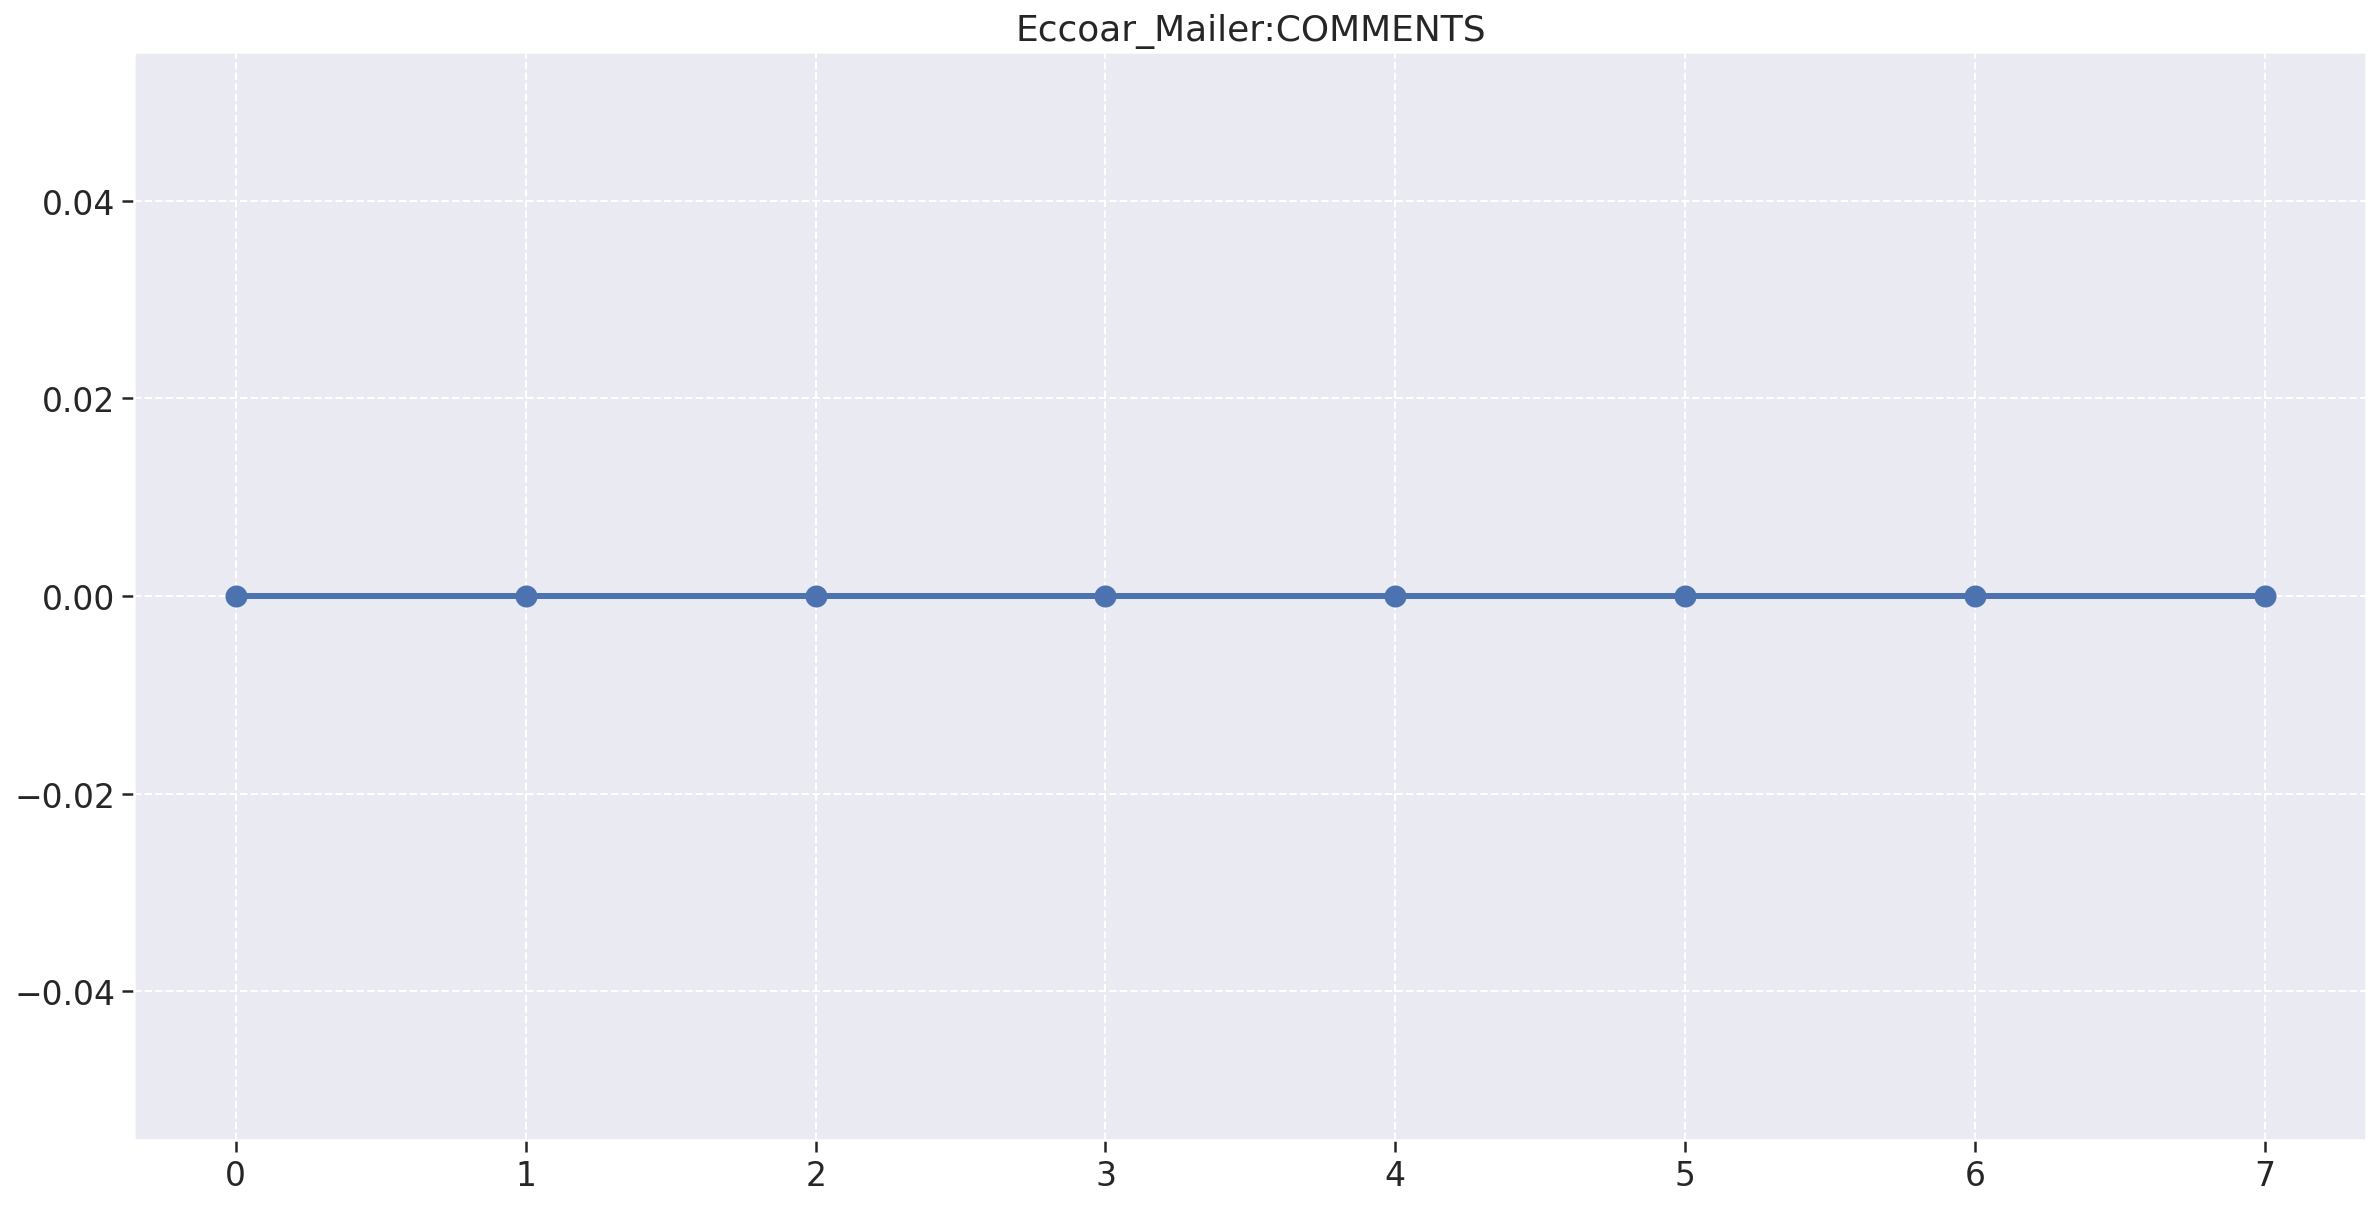

In [147]:
for repository, metrics_df in repository_metrics.items(): 
    fig = plt.figure(figsize=(20, 10))
    plt.title(f"{repository}:COMMENTS")
    plt.plot(metrics_df['m2'], linewidth=3, marker='o', markersize=10)

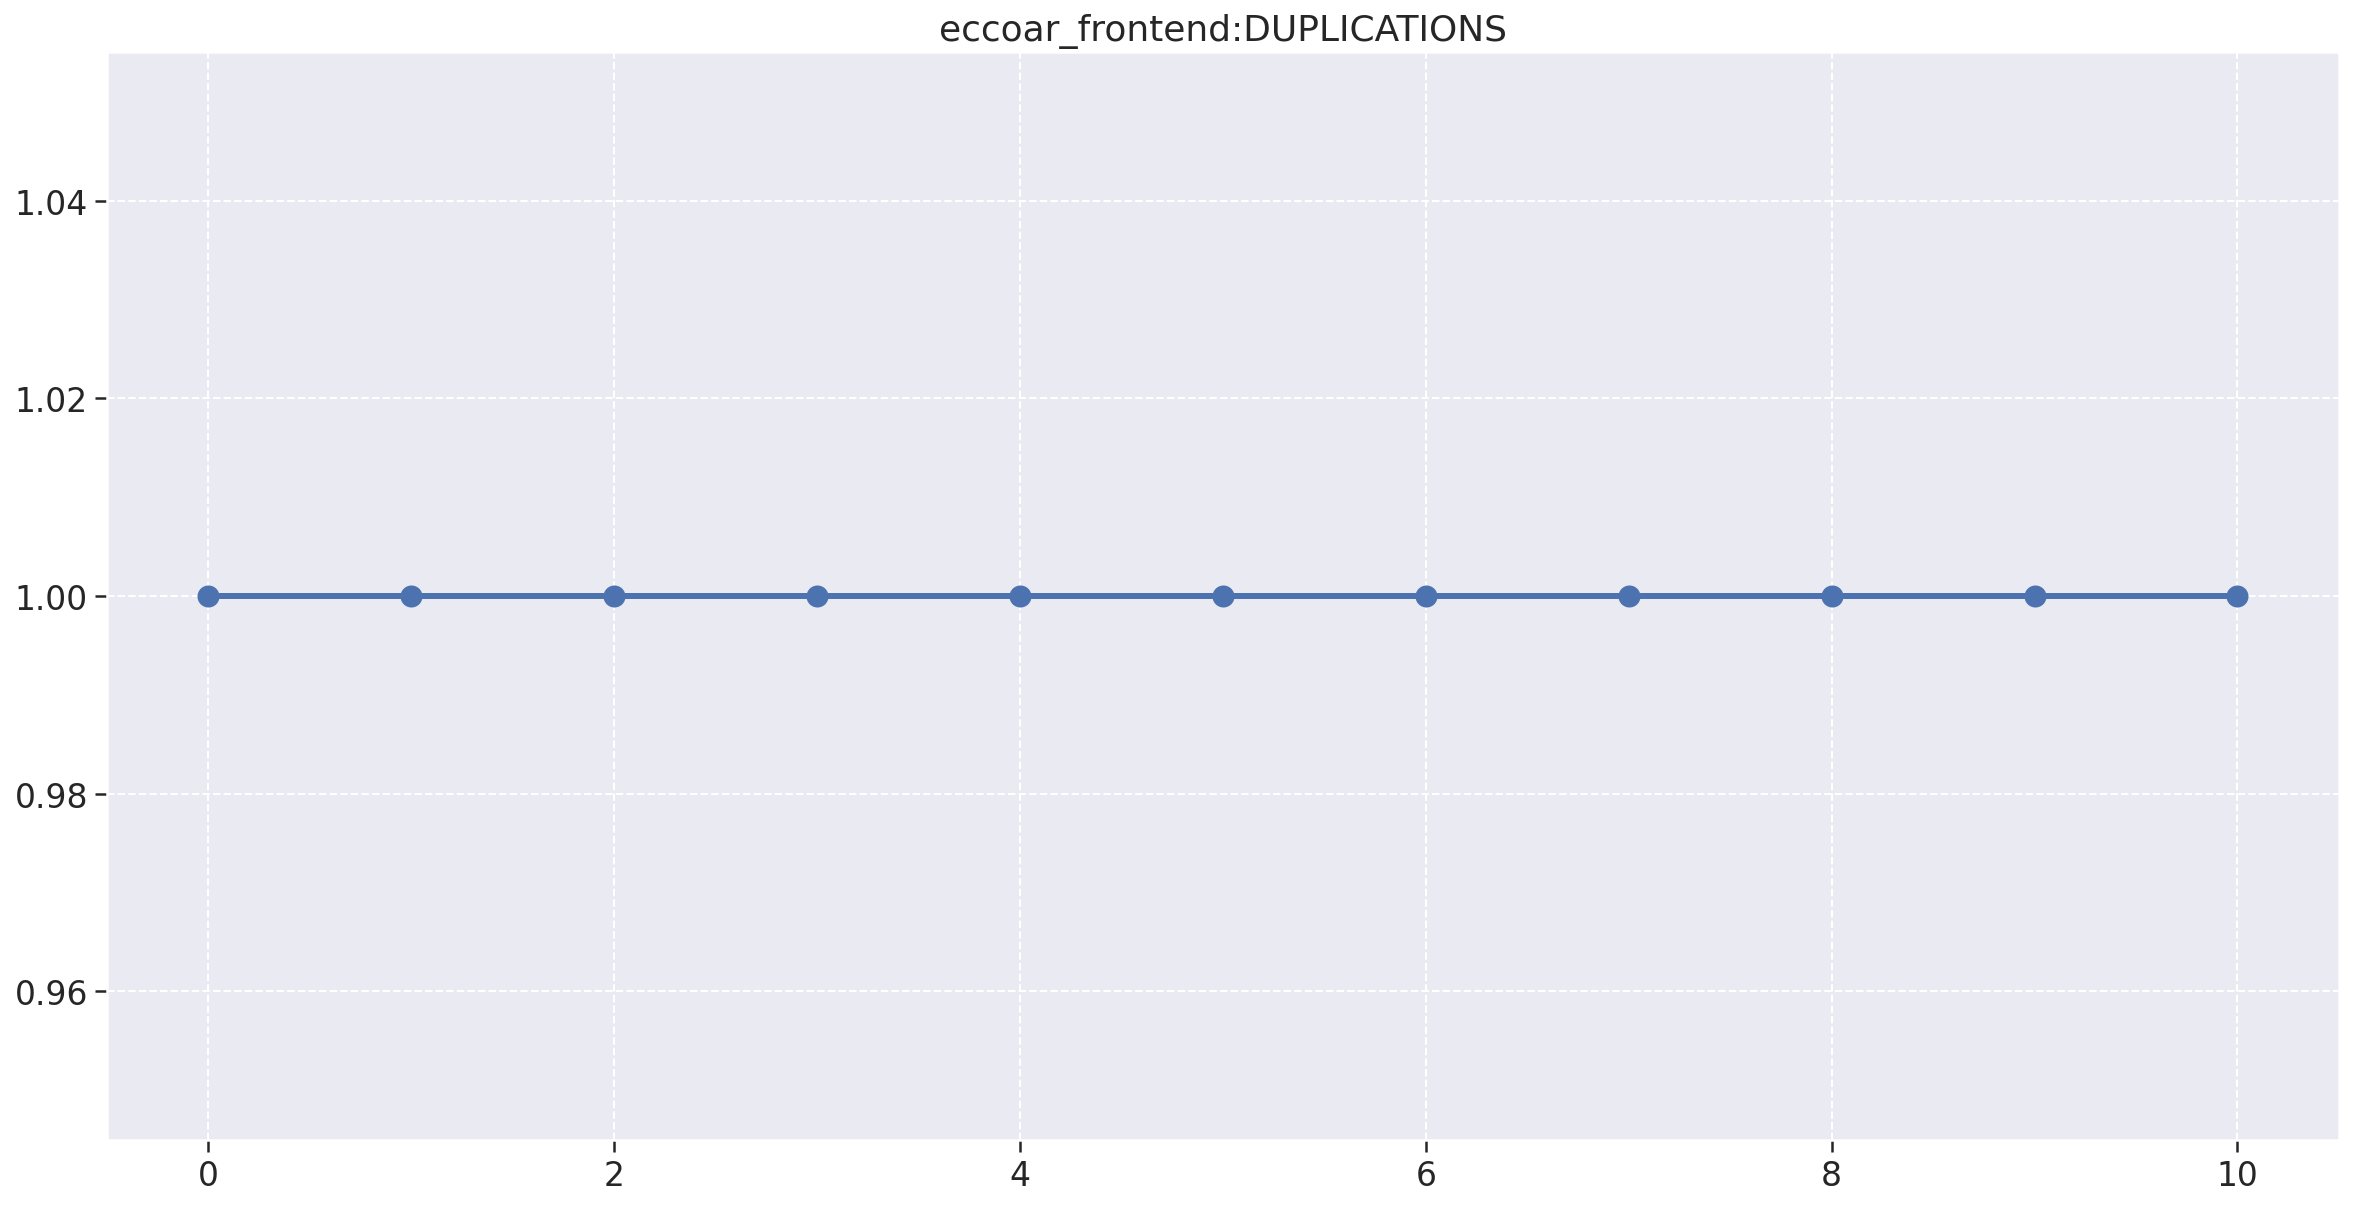

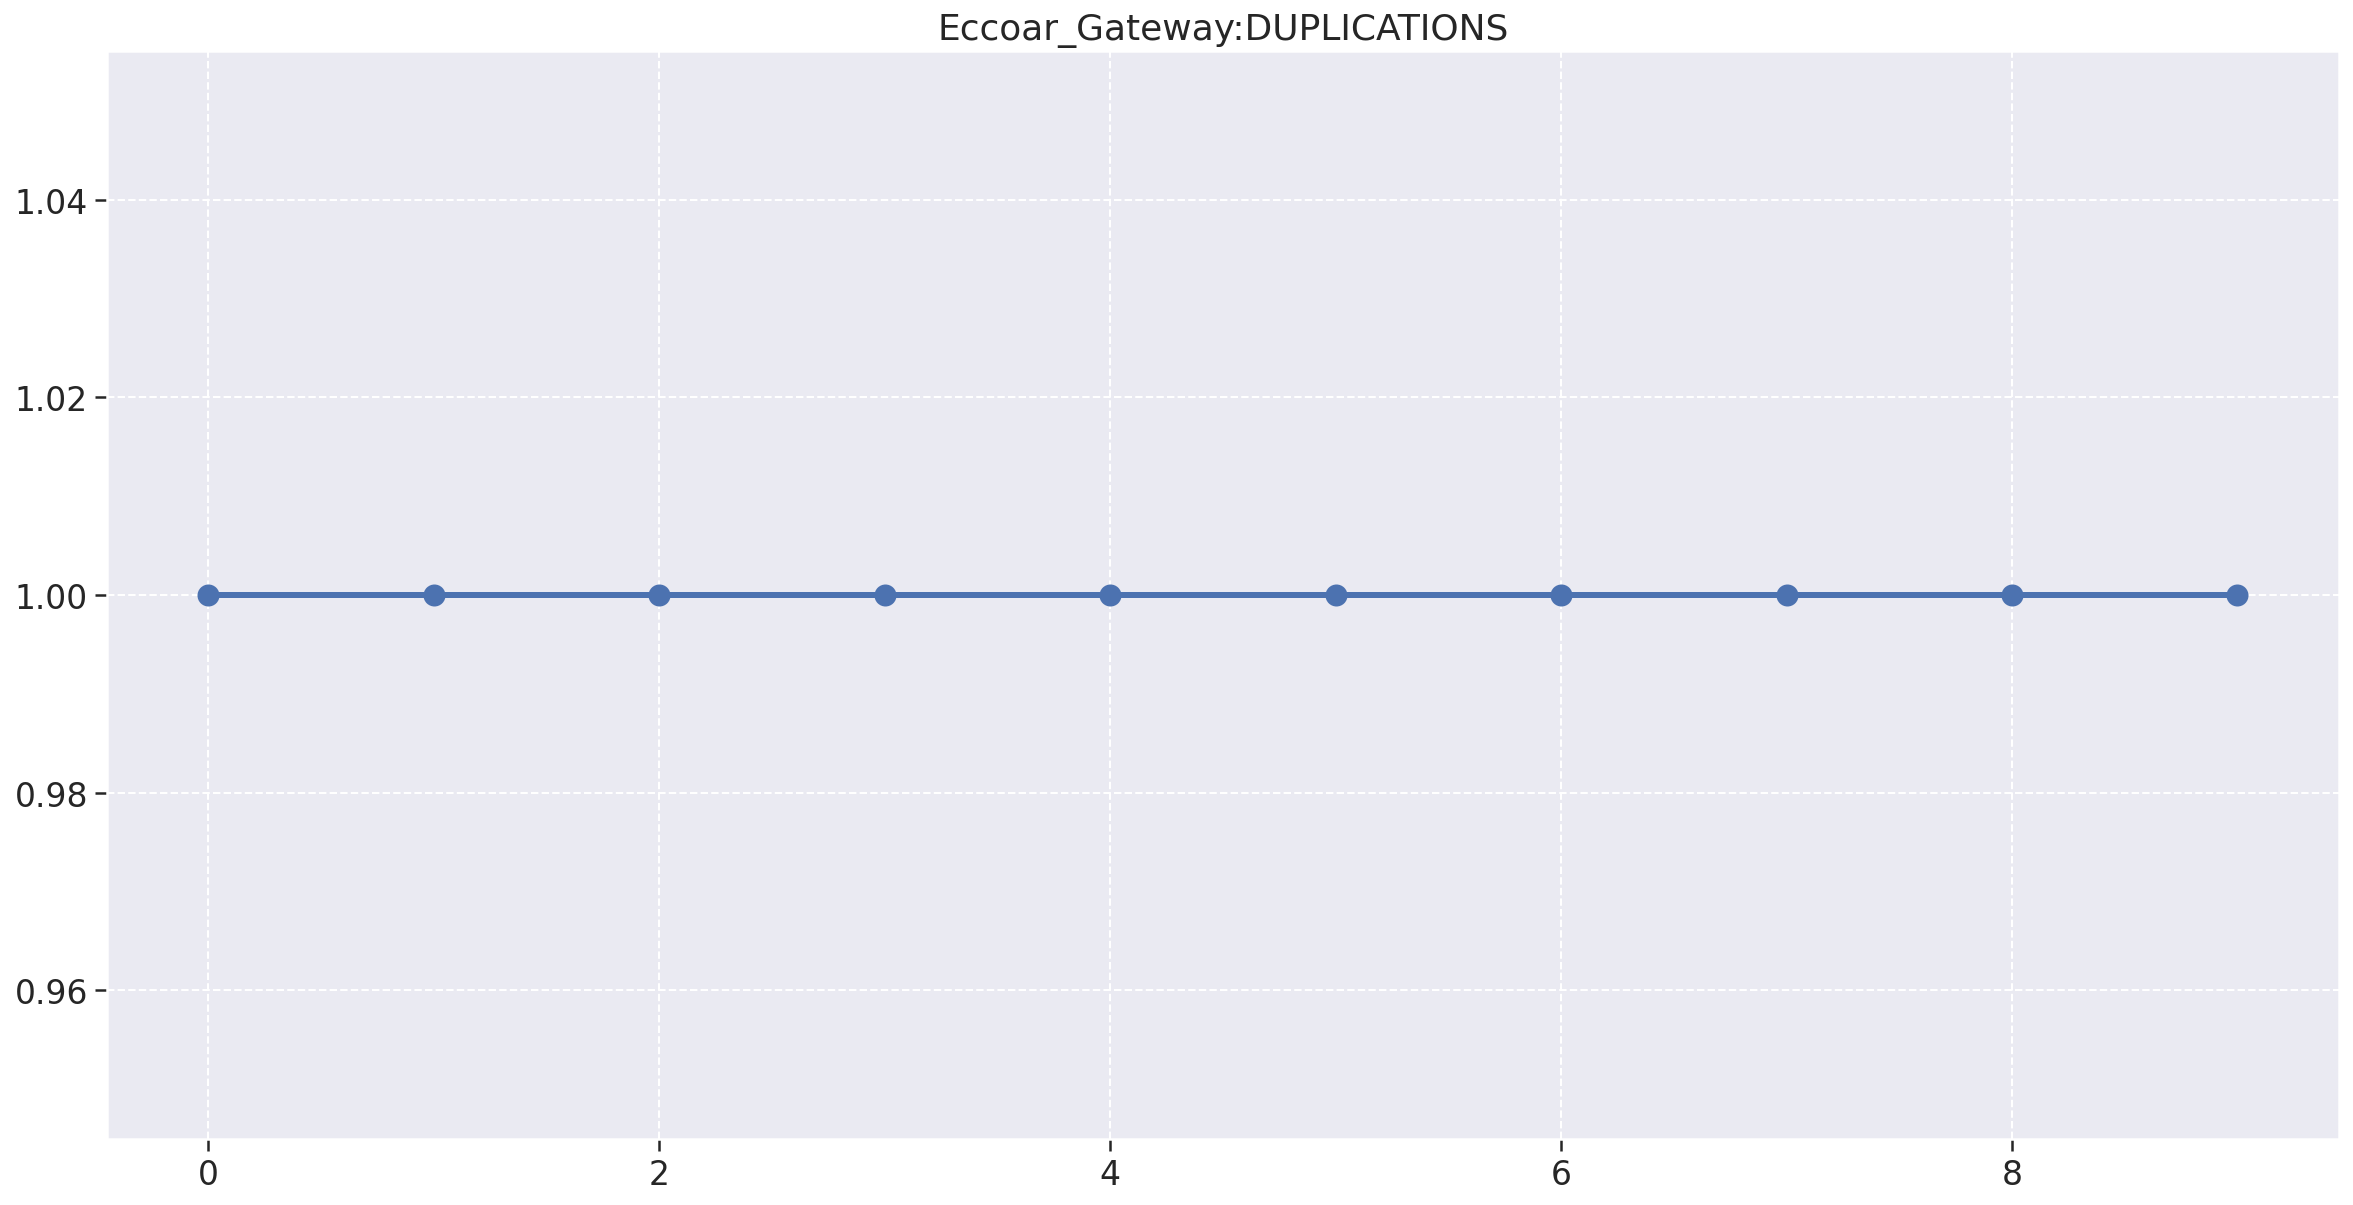

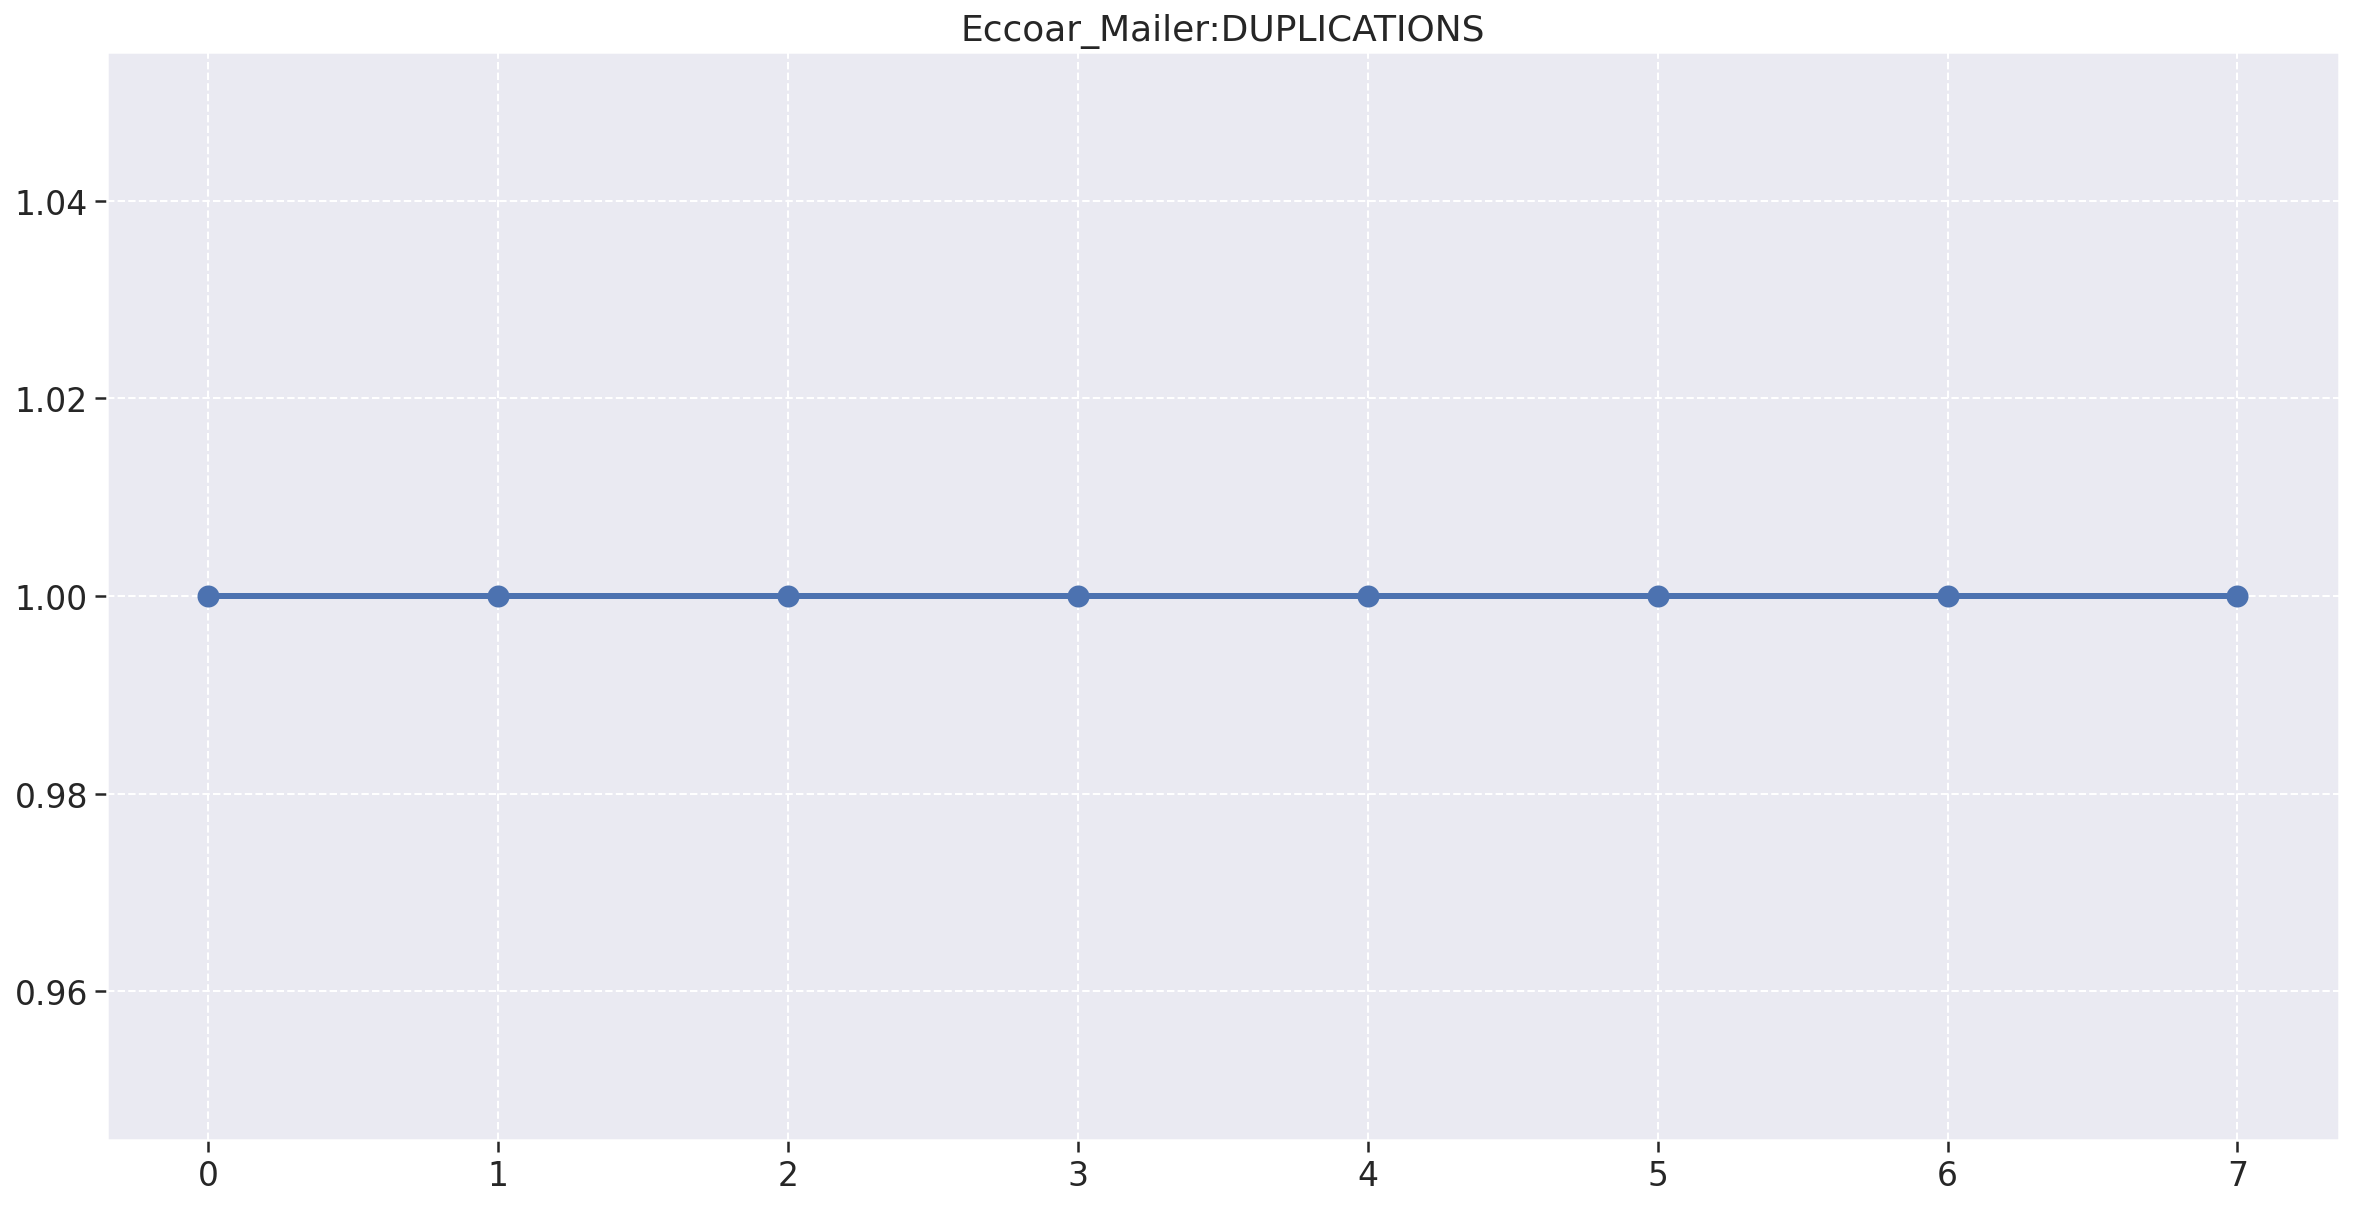

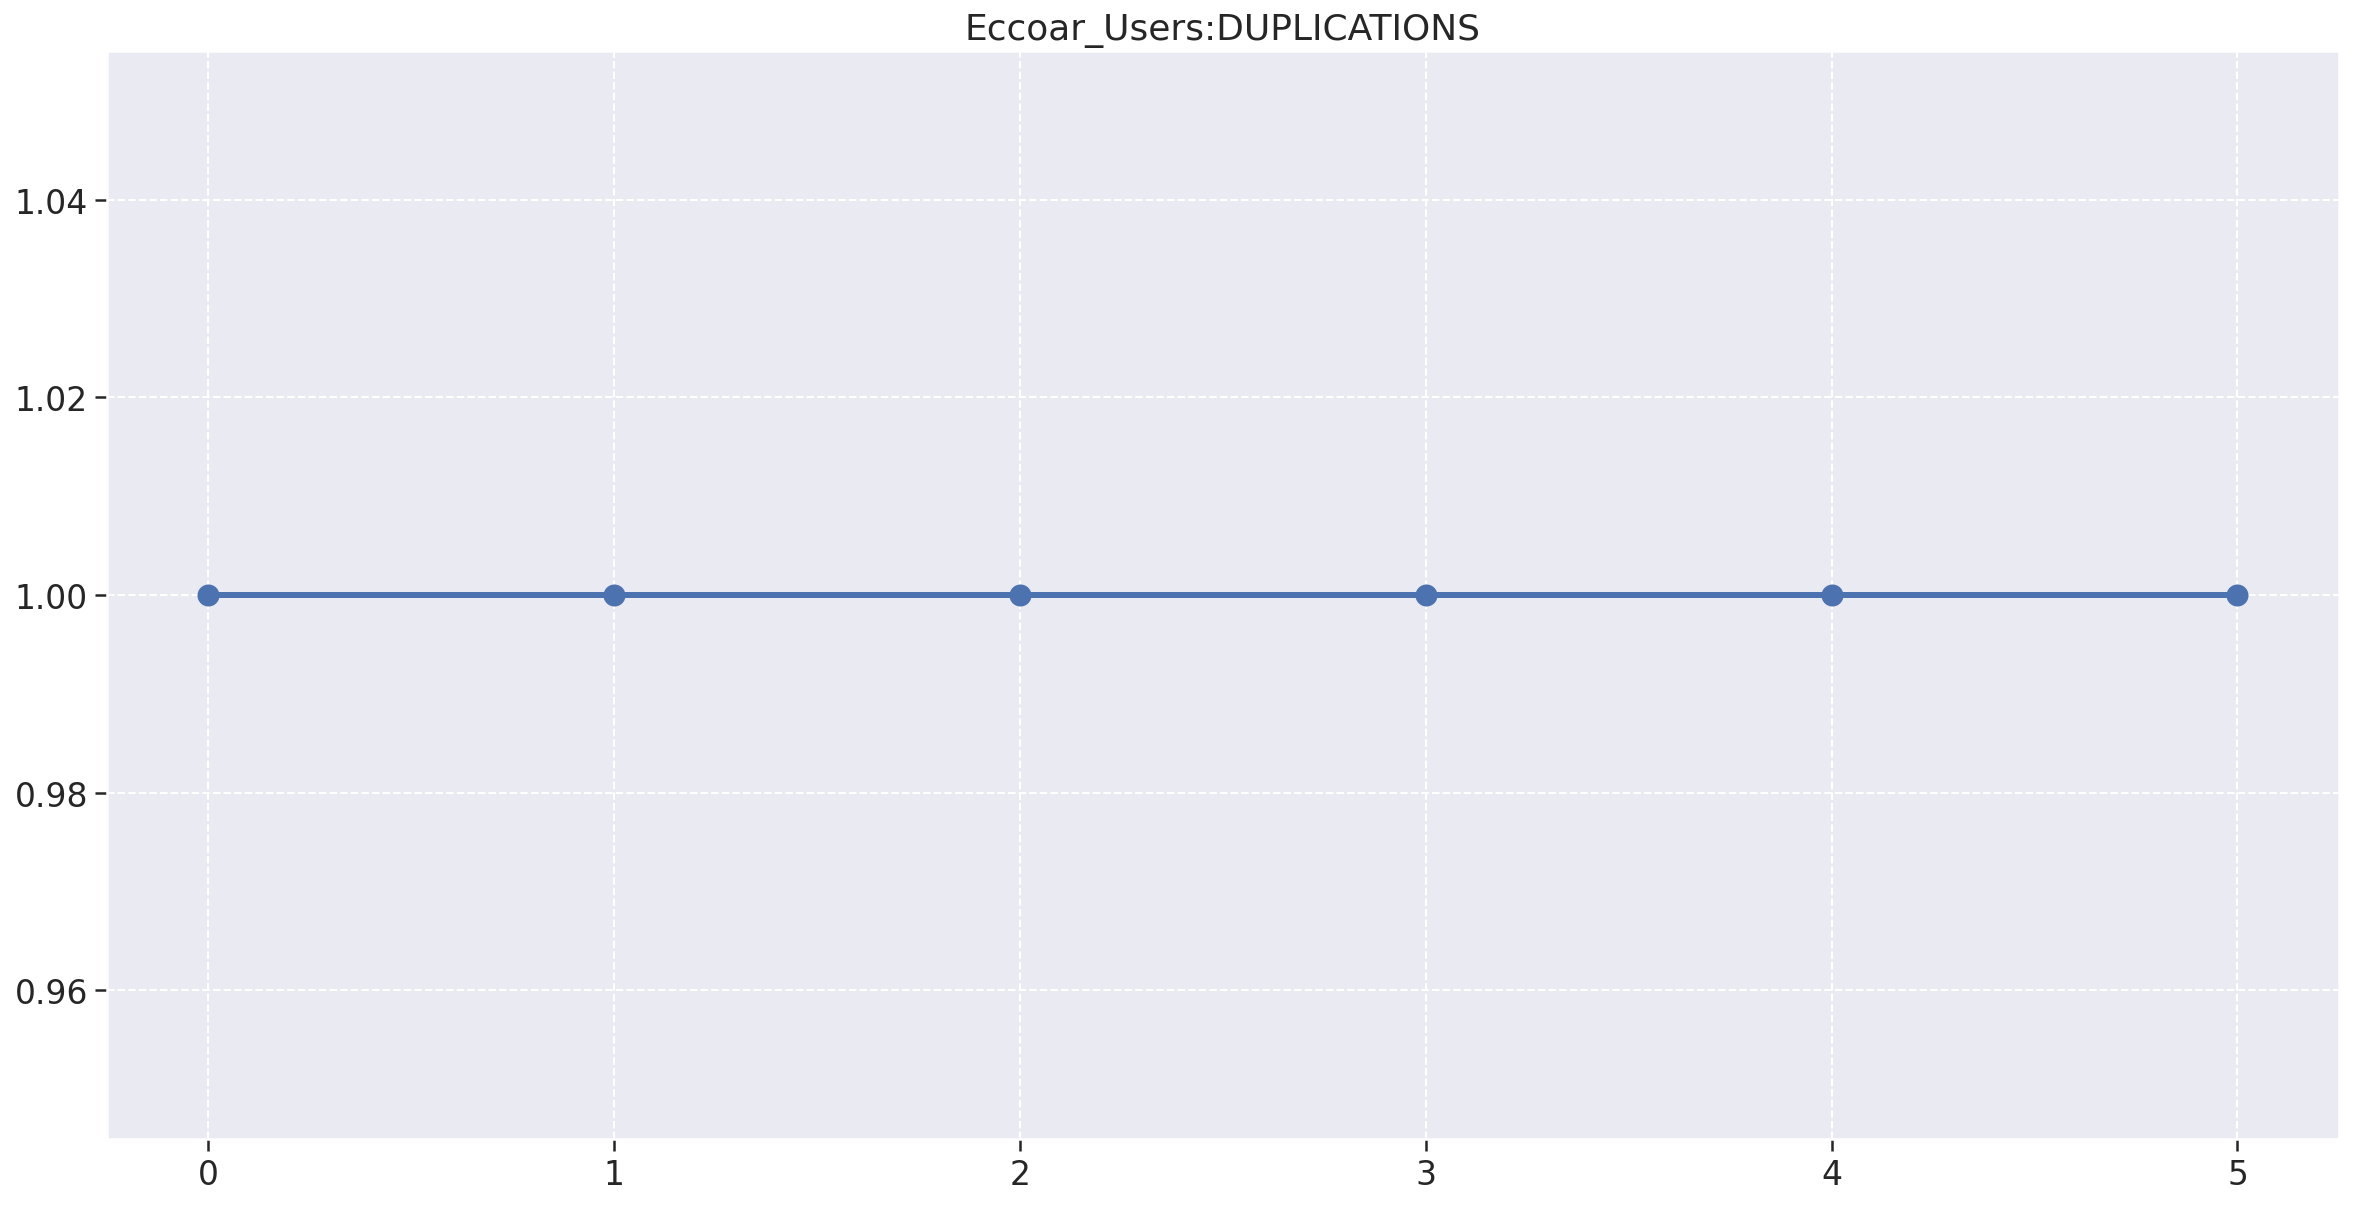

In [148]:
for repository, metrics_df in repository_metrics.items(): 
    fig = plt.figure(figsize=(20, 10))
    plt.title(f"{repository}:DUPLICATIONS")
    plt.plot(metrics_df['m3'], linewidth=3, marker='o', markersize=10)

### Sub characteristic aggregation

- You must do this for each of your repositories

In [151]:
psc2 = 1
pm7 = 0.5
pm9 = 0.5

for repository, metrics_df in repository_metrics.items(): 
    metrics_df['asc2'] = ((metrics_df['m7']*pm7)+(metrics_df['m9']*pm9))*psc2

KeyError: 'm7'

In [152]:
psc1 = 1
pm1 = 0.33
pm2 = 0.33
pm3 = 0.33

for repository, metrics_df in repository_metrics.items(): 
    metrics_df['asc1'] = ((metrics_df['m1']*pm1)+(metrics_df['m2']*pm2)+(metrics_df['m3']*pm3))*psc1

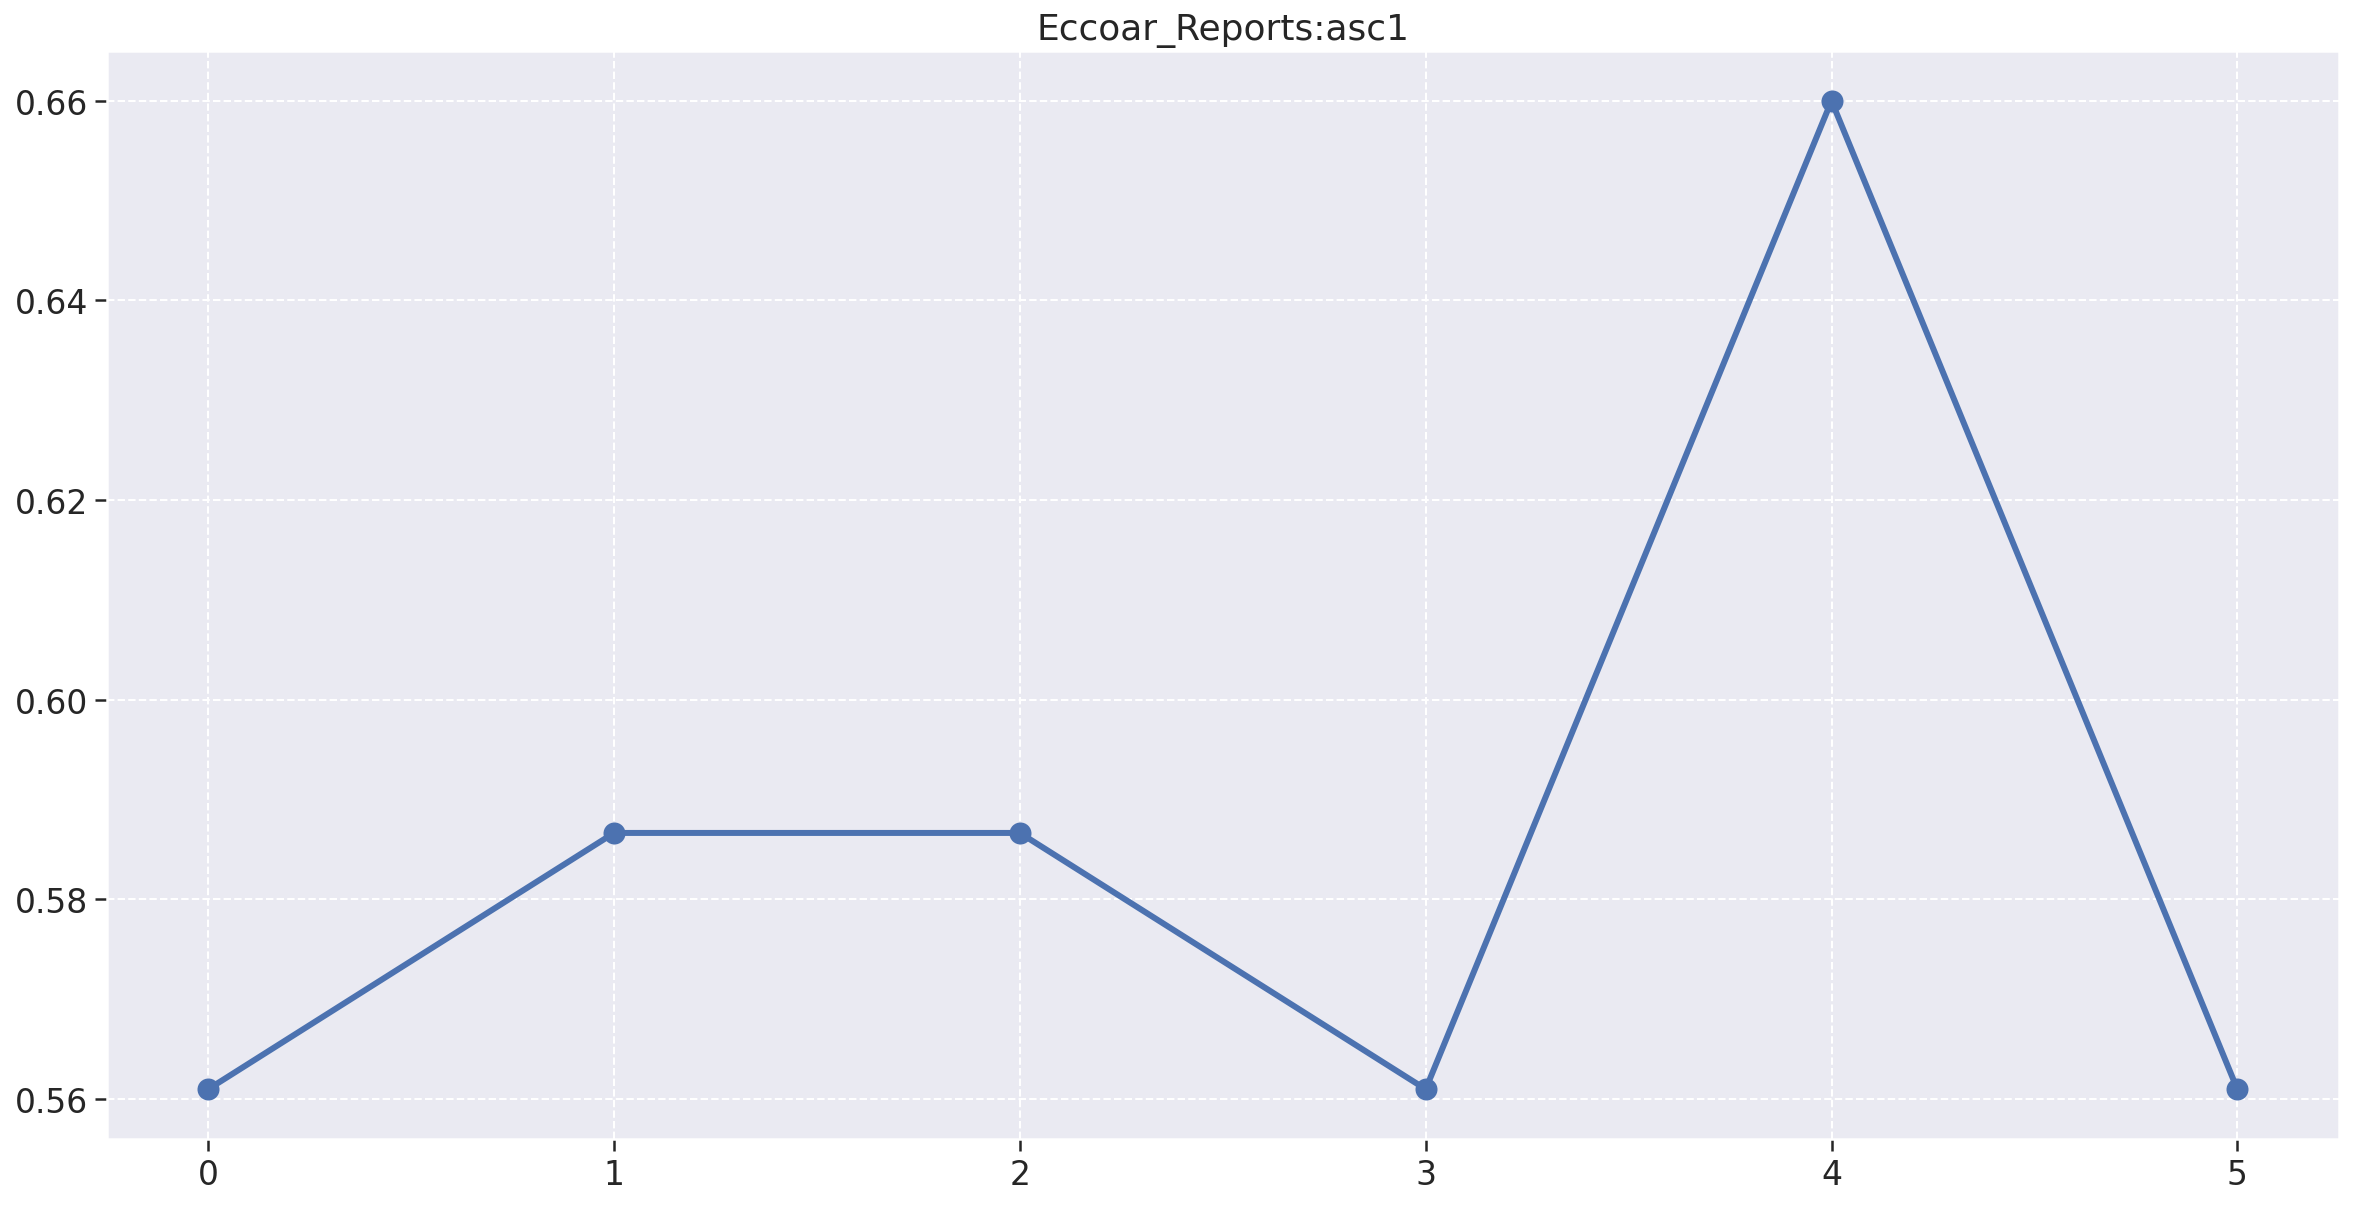

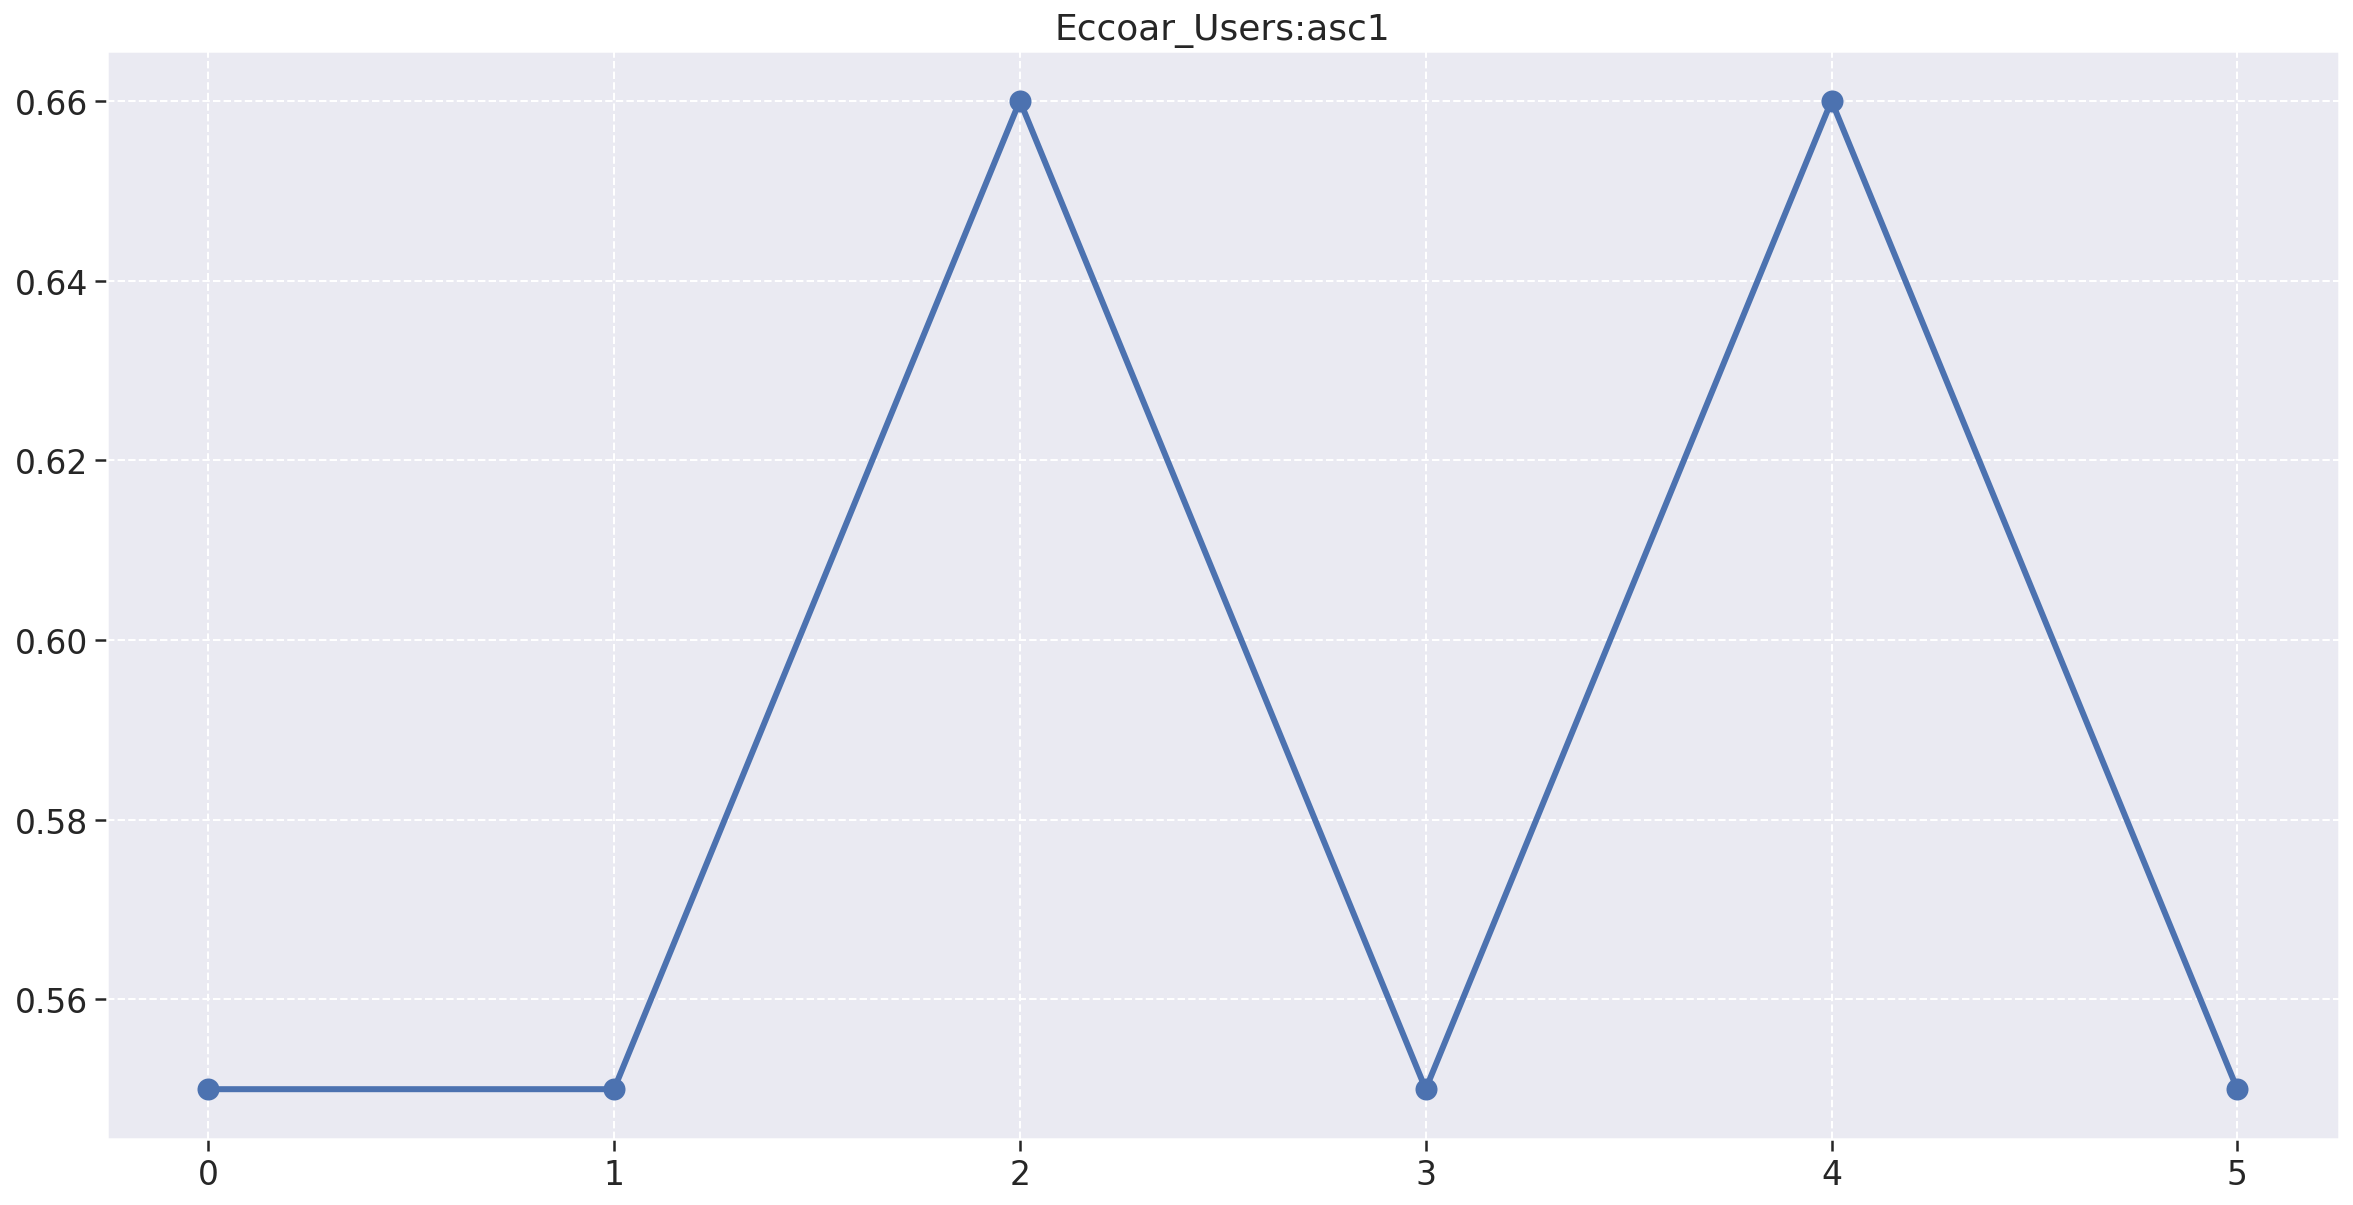

In [153]:
for repository, metrics_df in repository_metrics.items(): 
    fig = plt.figure(figsize=(20, 10))
    plt.title(f"{repository}:asc1")
    plt.plot(metrics_df['asc1'], linewidth=3, marker='o', markersize=10)

In [154]:
#fig = plt.figure(figsize=(20, 10))

#plt.plot(repo2['asc1'], linewidth=3, marker='o', markersize=10)

In [155]:
#fig = plt.figure(figsize=(20, 10))


#plt.plot(repo1['asc1'], linewidth=3, marker='o', markersize=5)
#plt.plot(repo2['asc1'], linewidth=3, marker='o', markersize=5)
...

Ellipsis

In [156]:
#metrics_df = pd.concat([repo1_metrics, repo2_metrics, ...], ignore_index=True)

#metrics_df['ac1'] = metrics_df['asc1'] * 1
#metrics_df['total'] = metrics_df['asc1'] * 1

# Histogram Repositories Analysis

In [157]:
def generate_histogram(metric, metric_name, color):
    for repository, metrics_df in repository_metrics.items():
        fig = plt.figure(figsize=(30, 10))
        plt.title(f"{repository}:{metric_name}")
        plt.bar(metrics_df['version'], metrics_df[metric], color=color)
        plt.show()

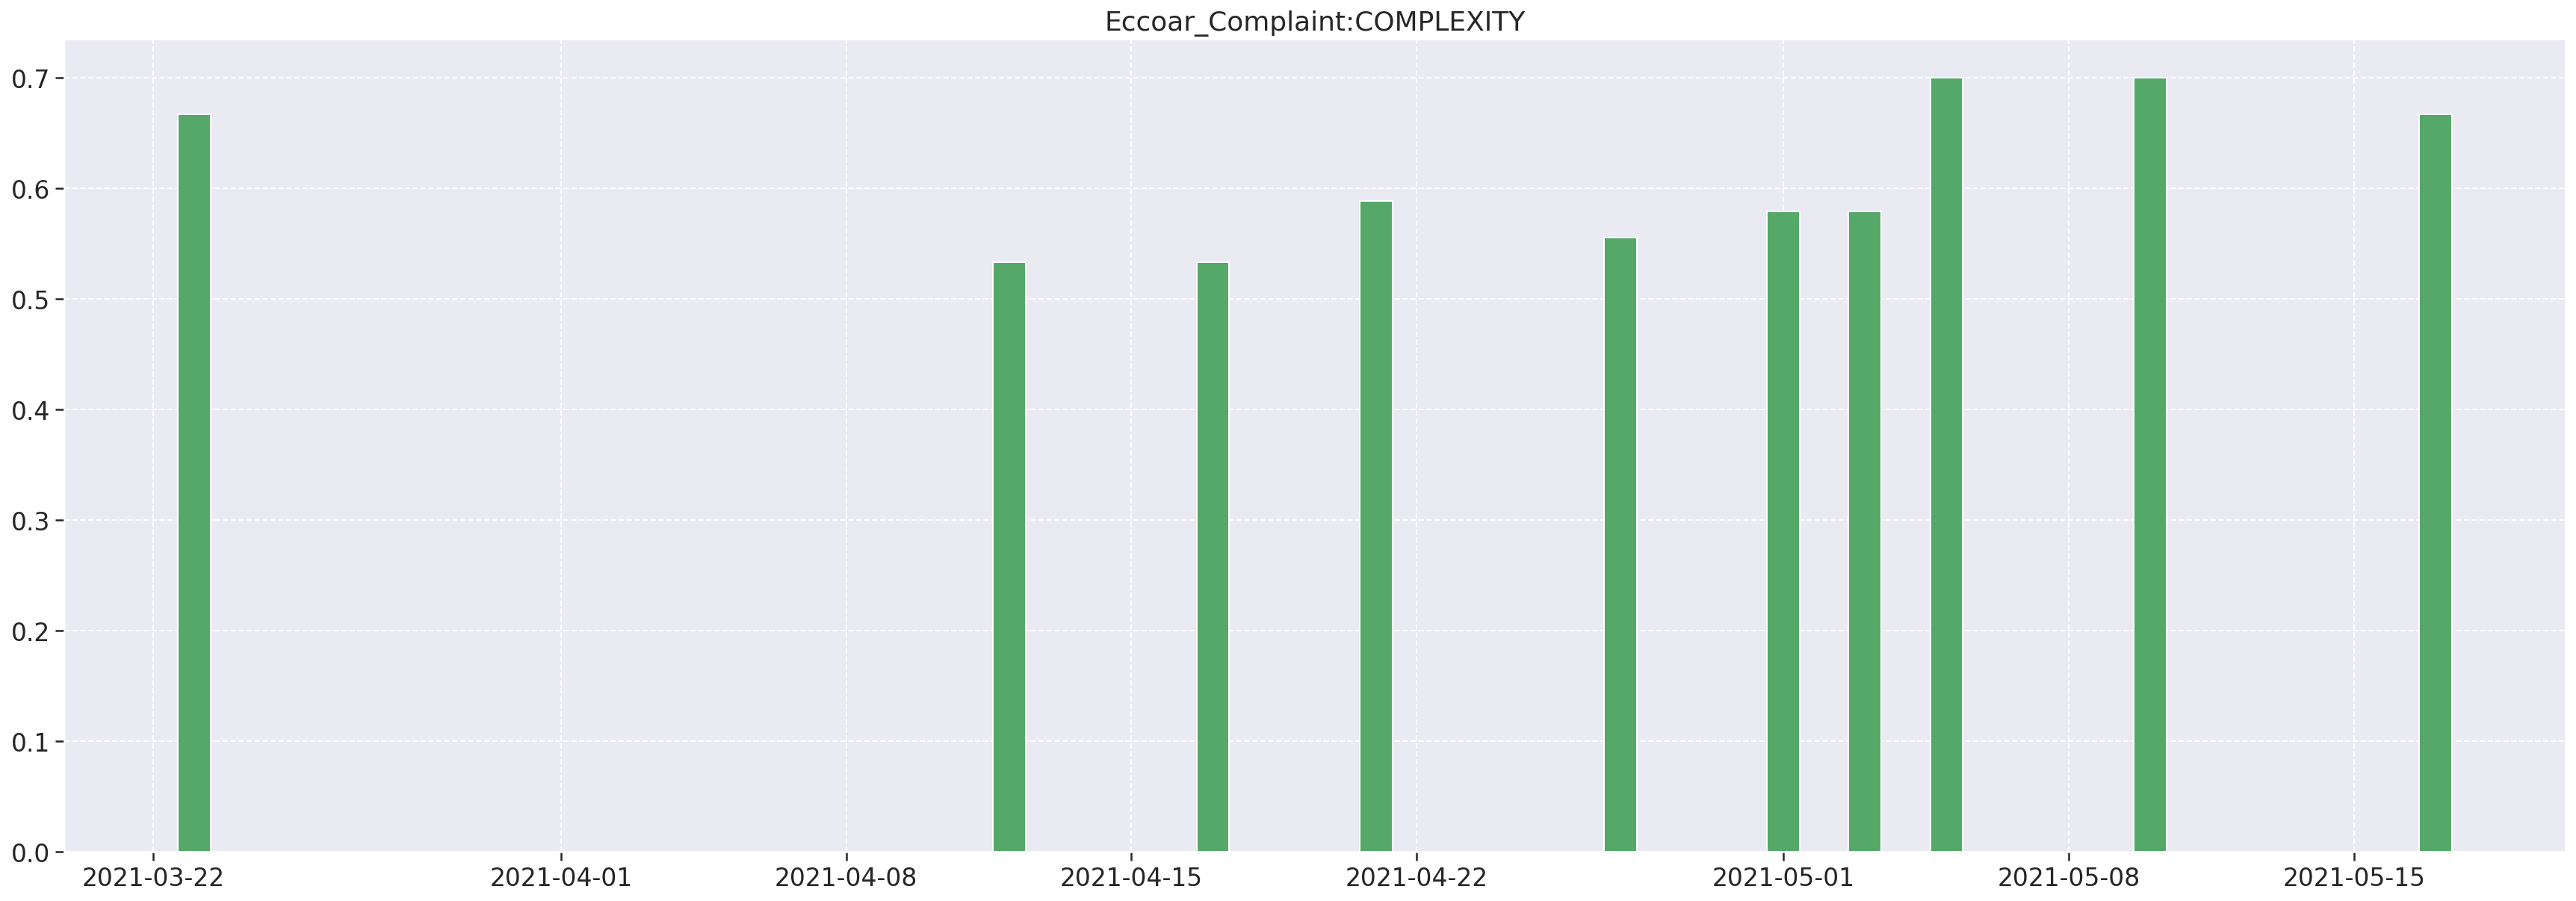

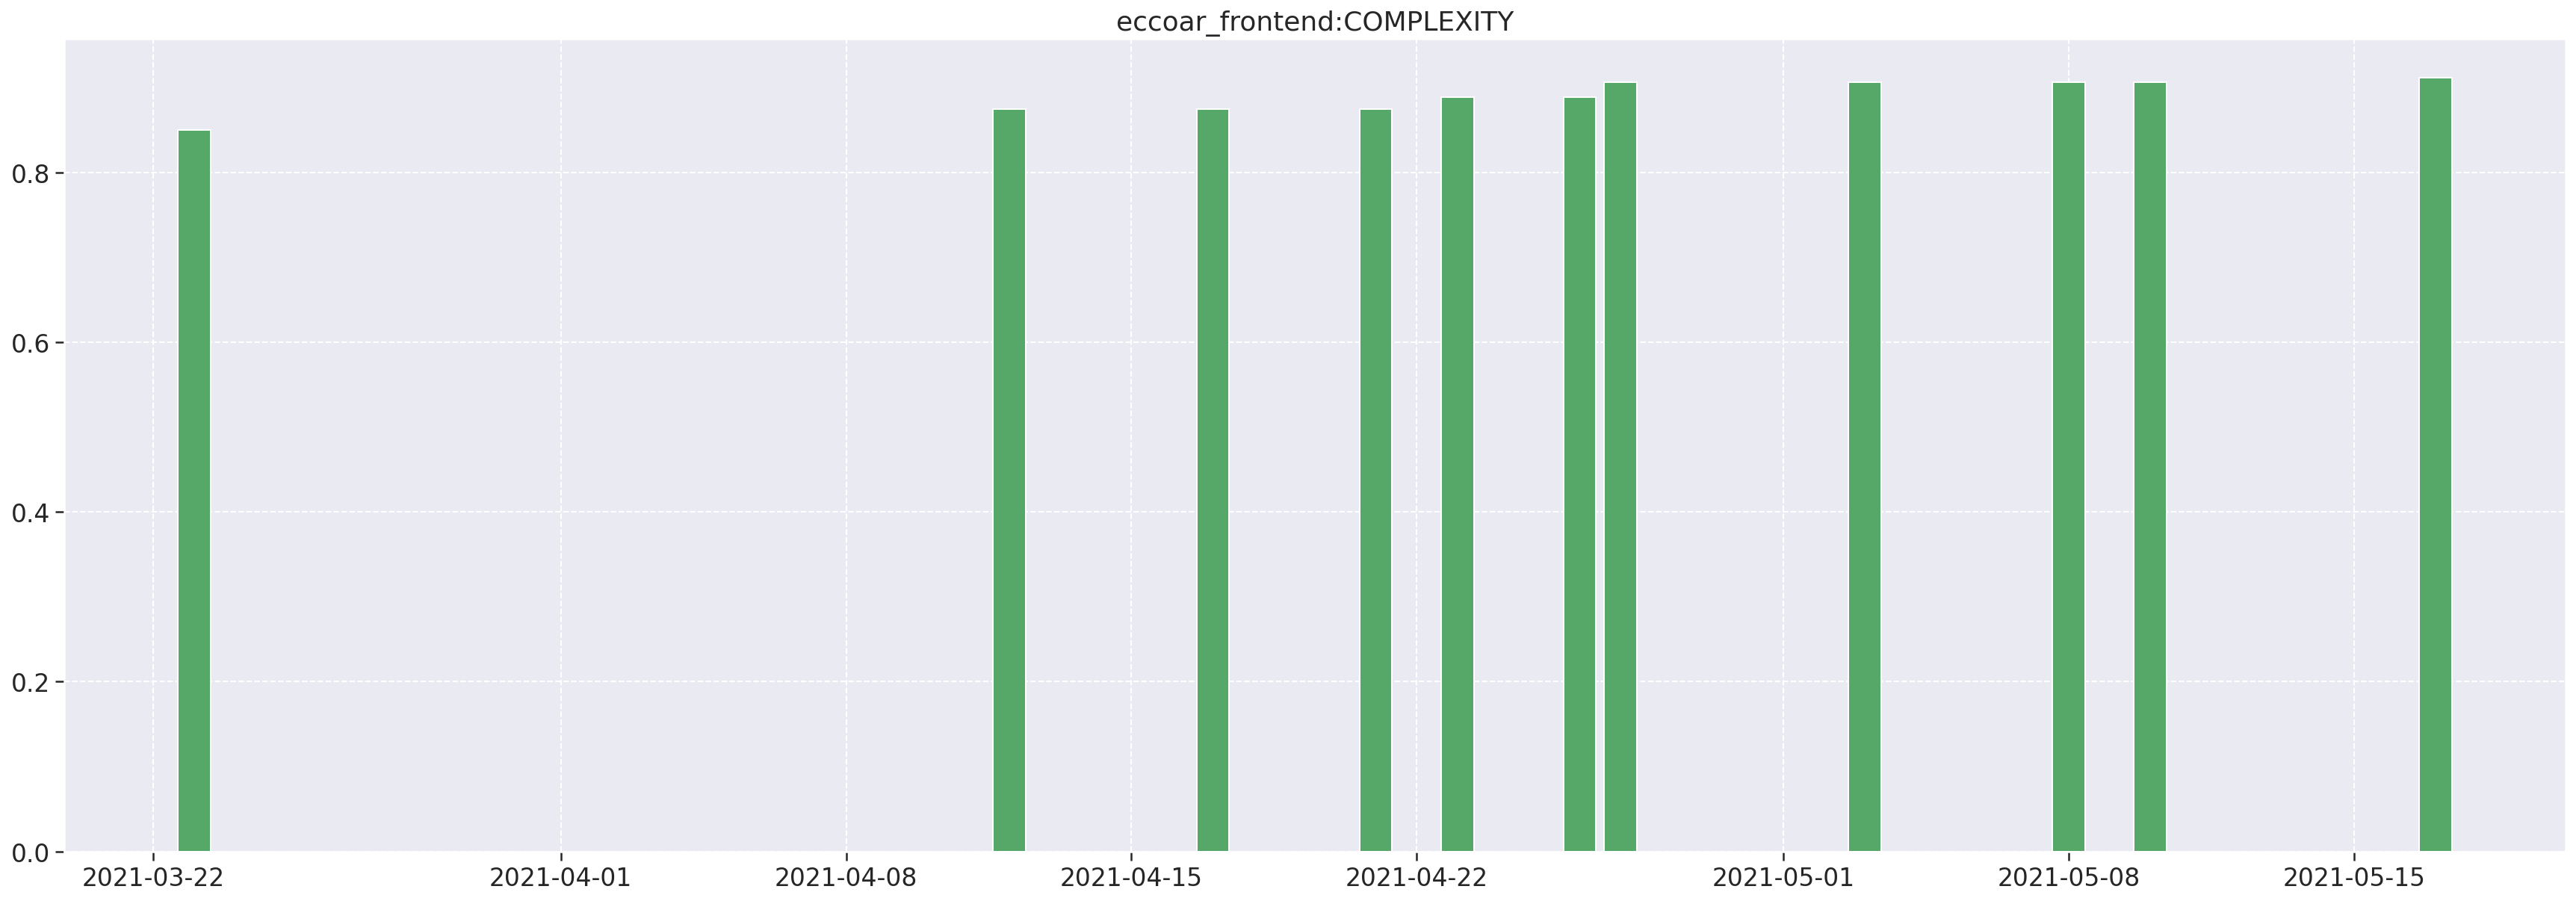

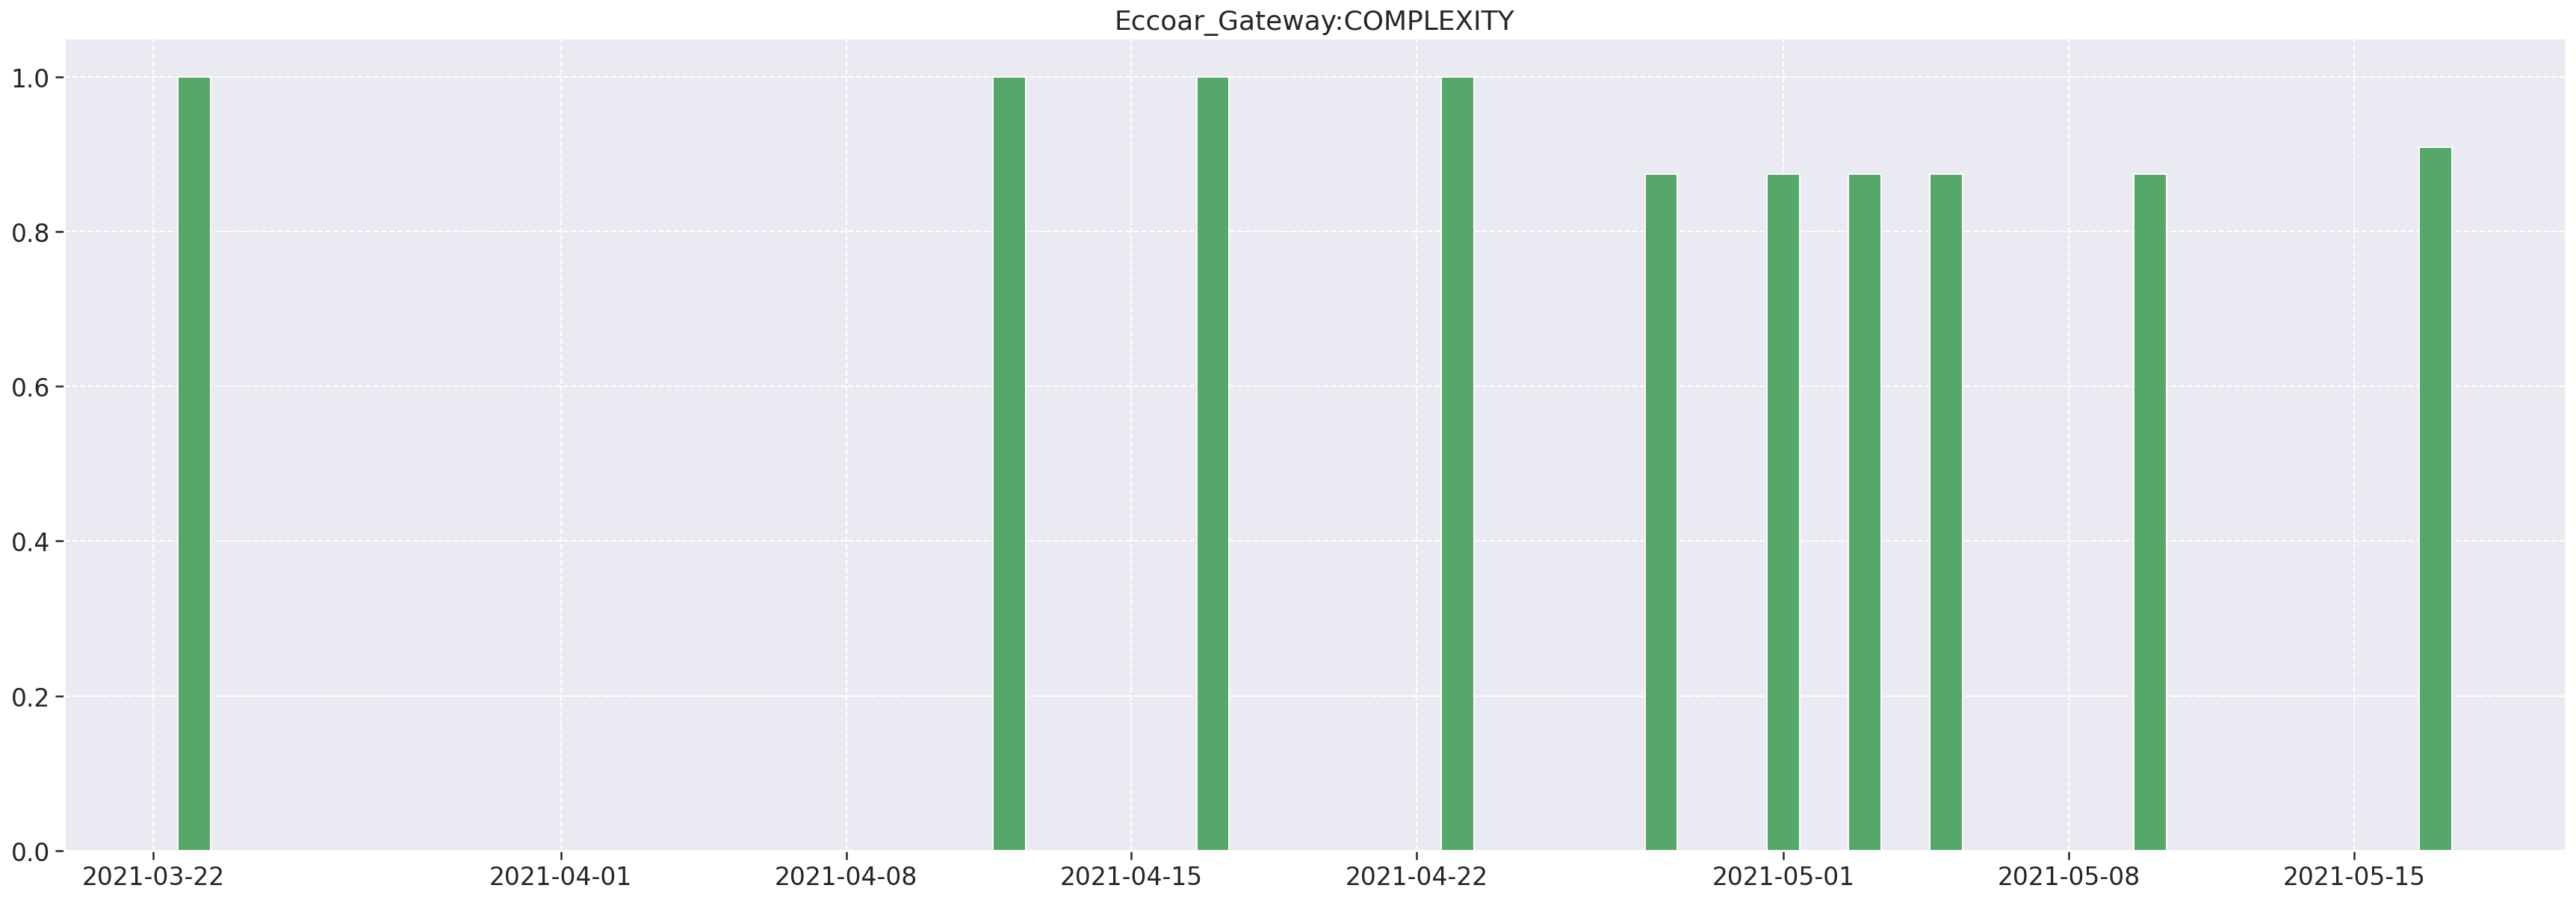

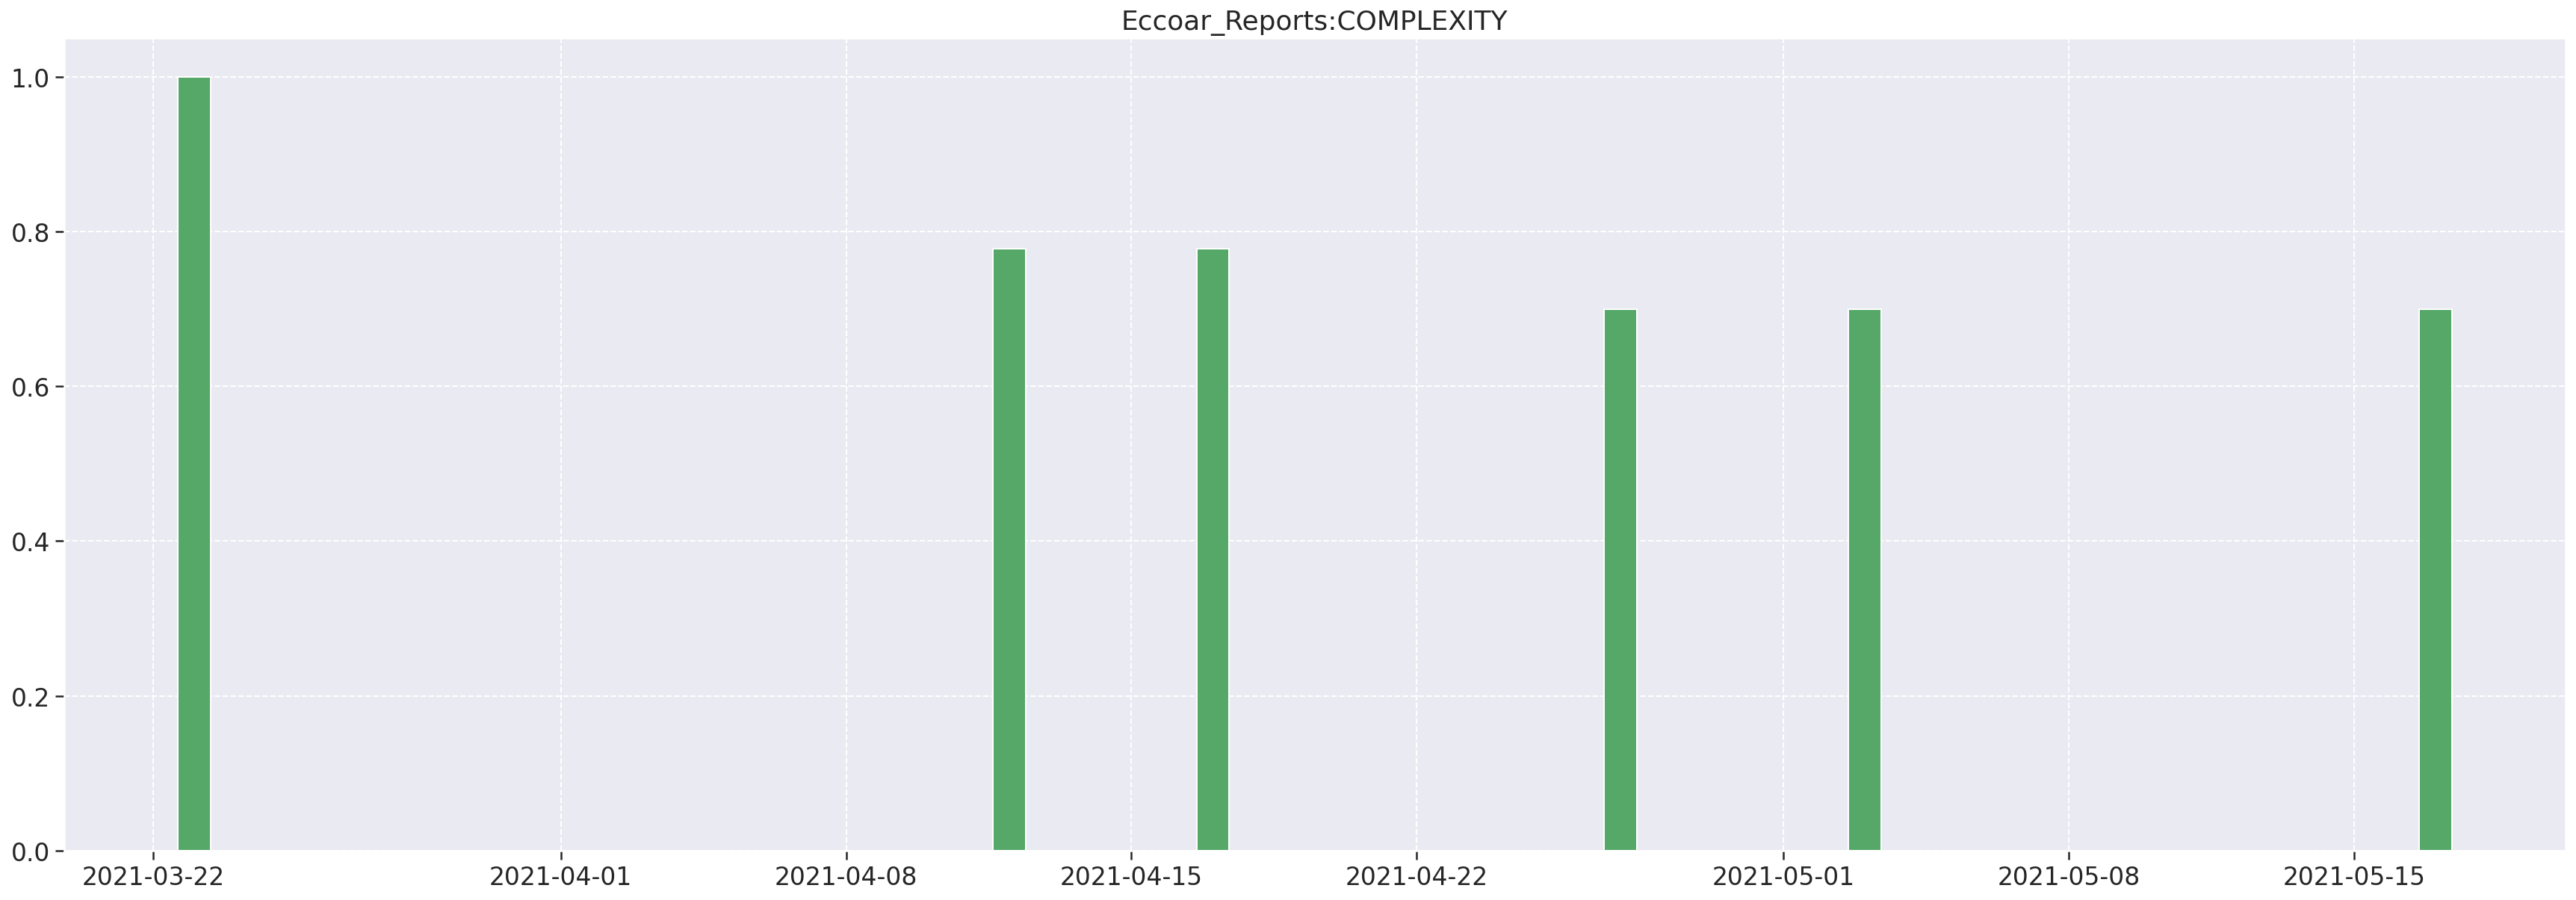

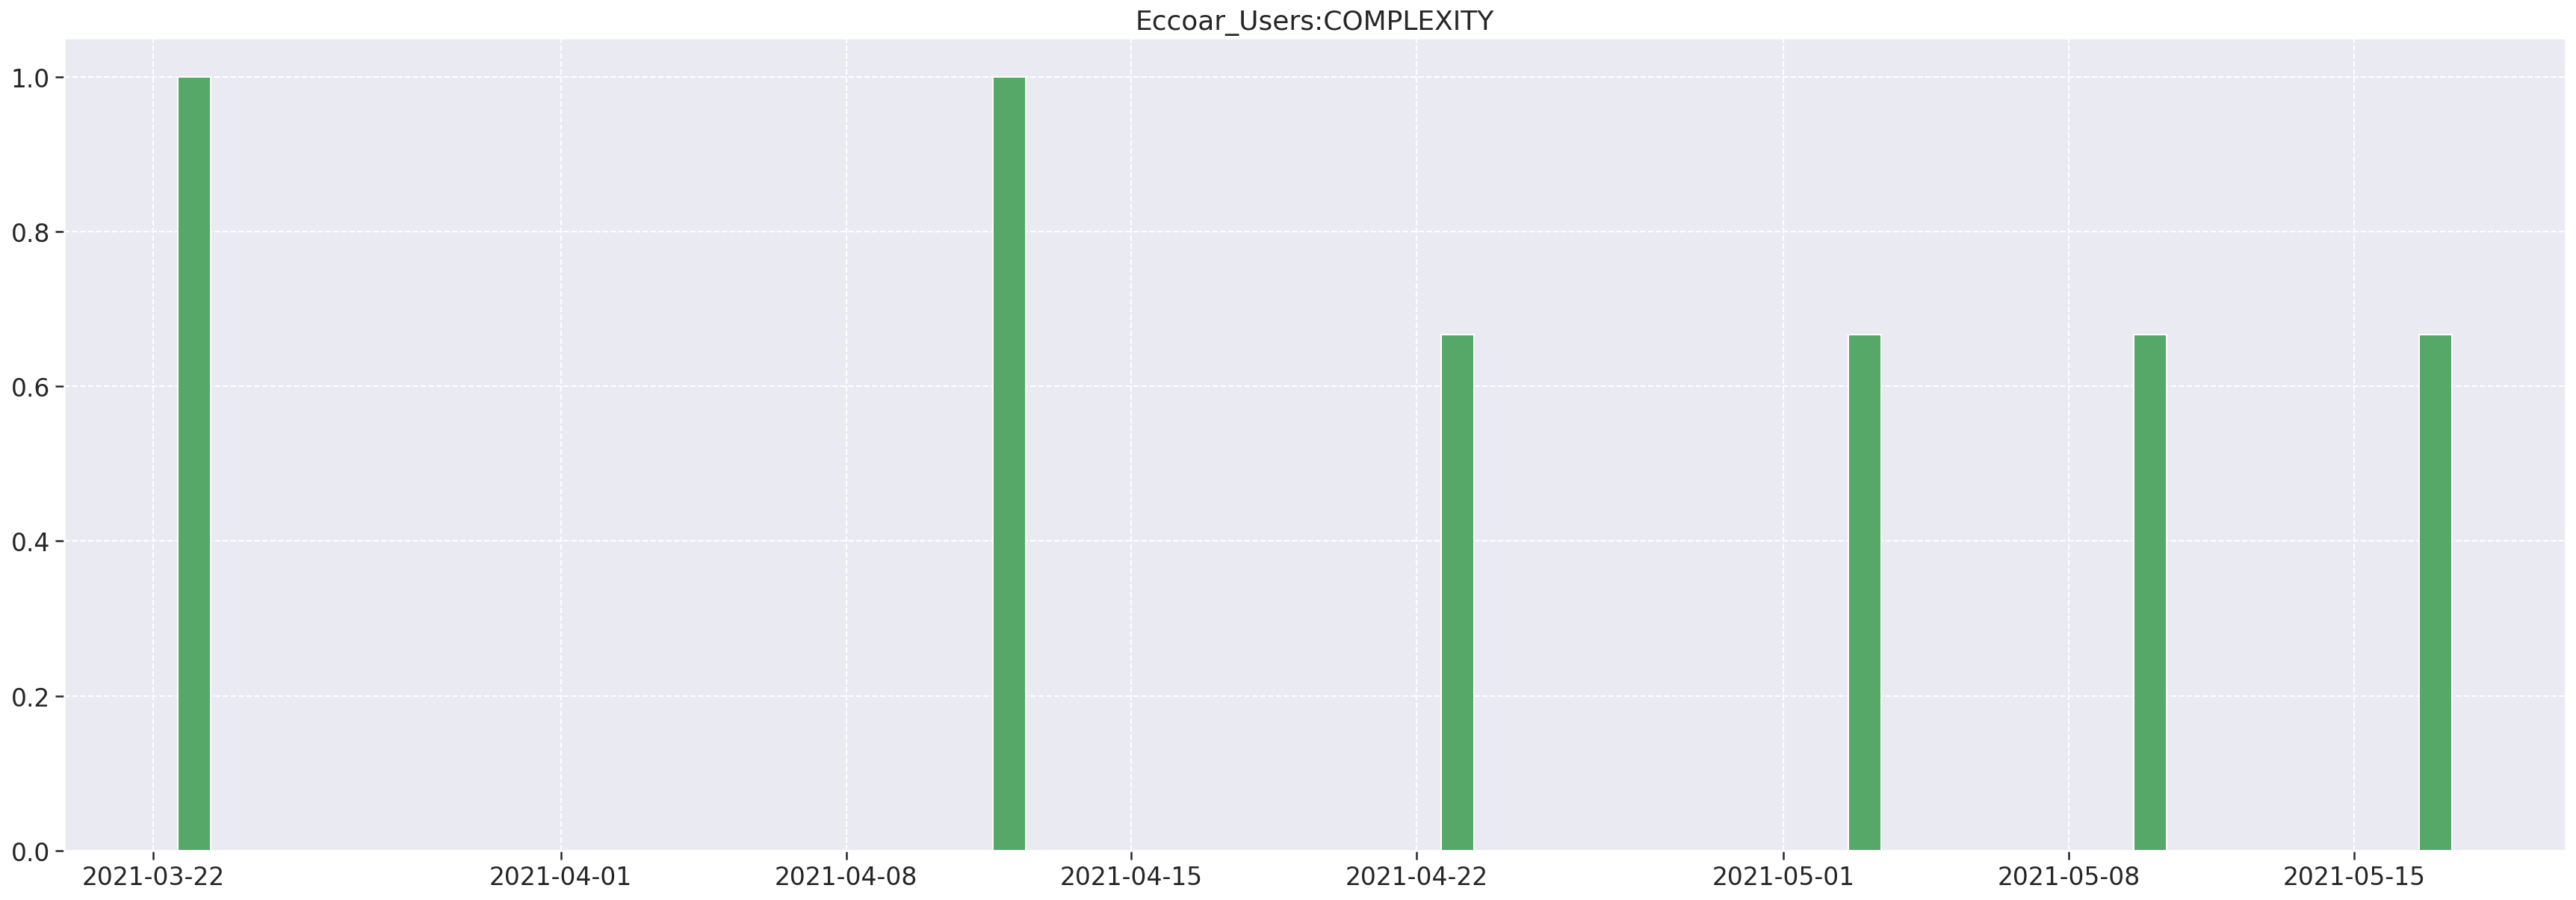

In [158]:
generate_histogram('m1', 'COMPLEXITY', 'g')

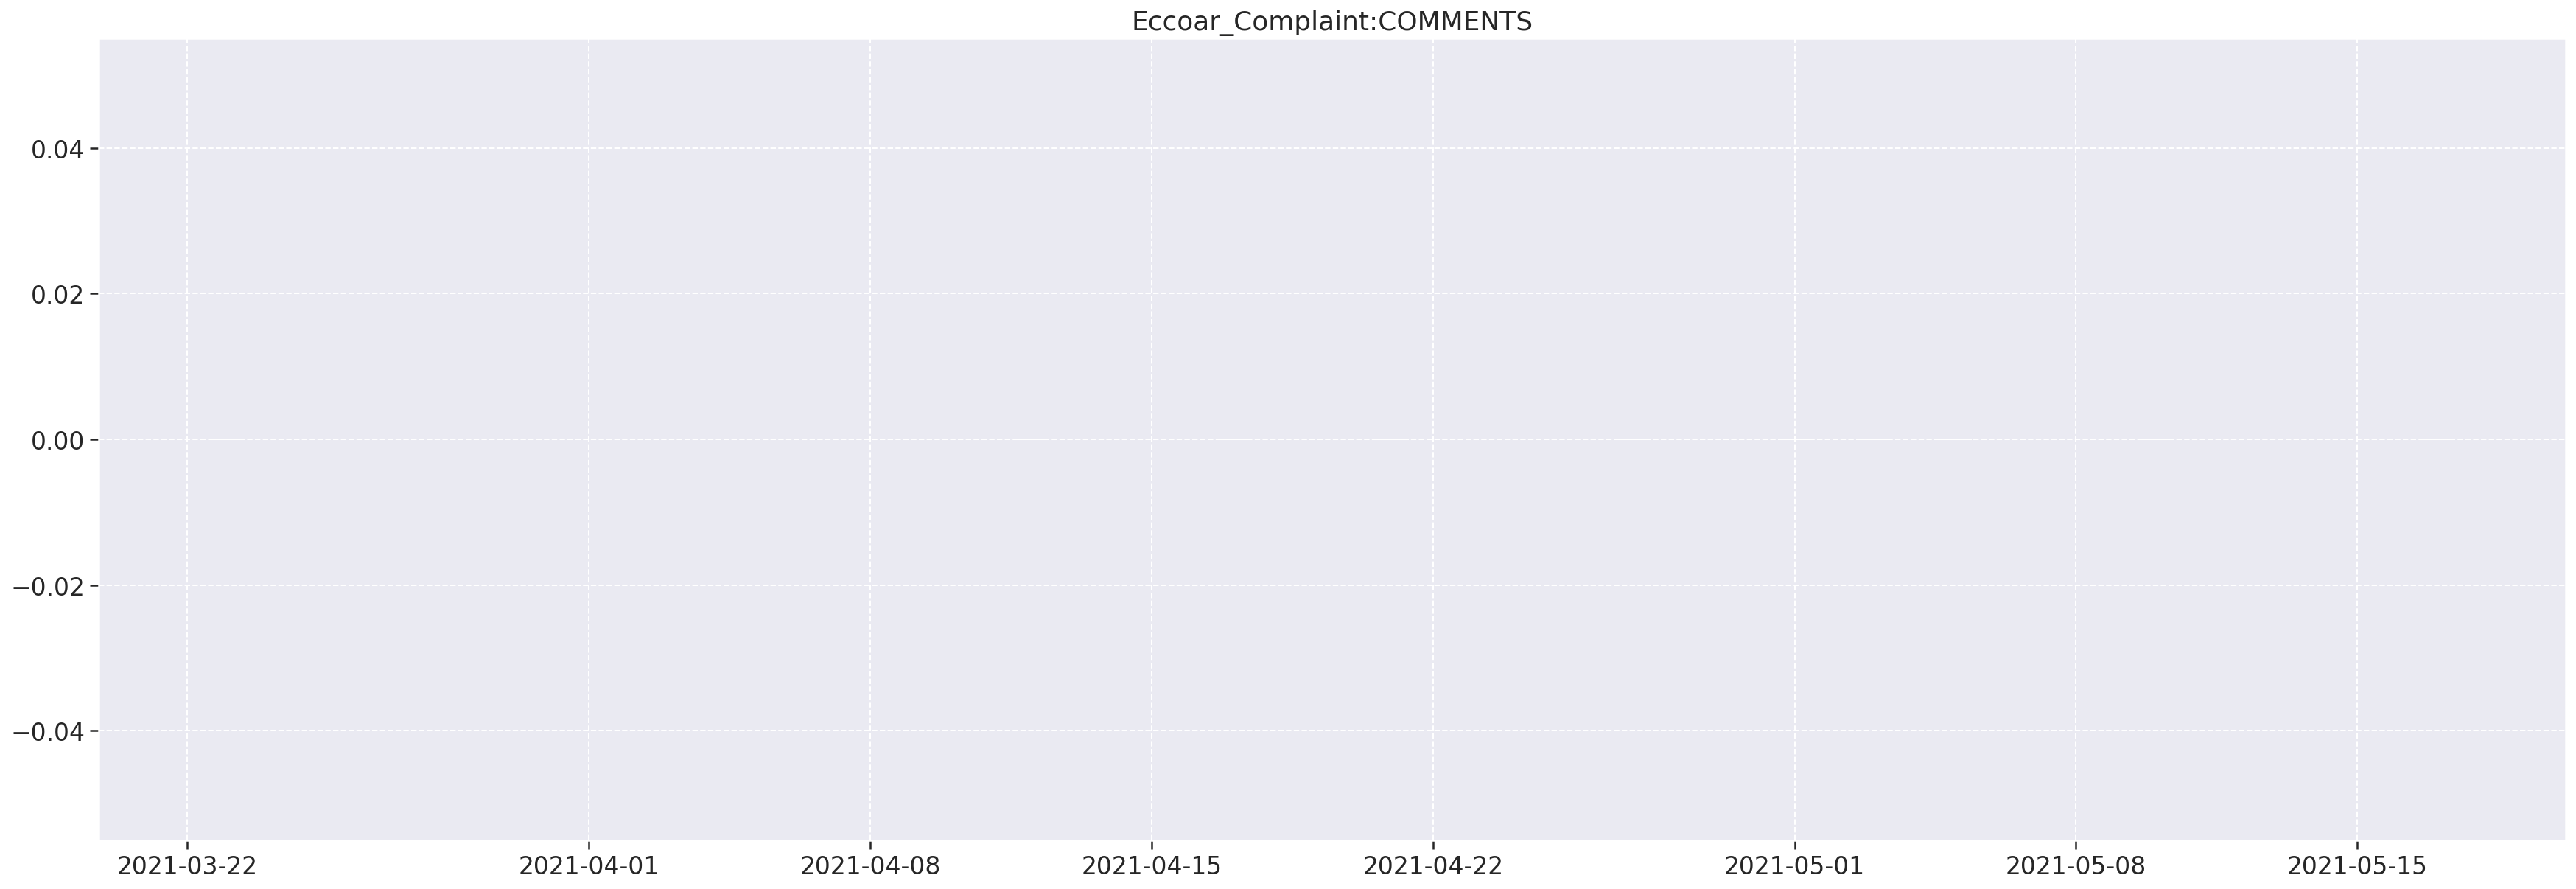

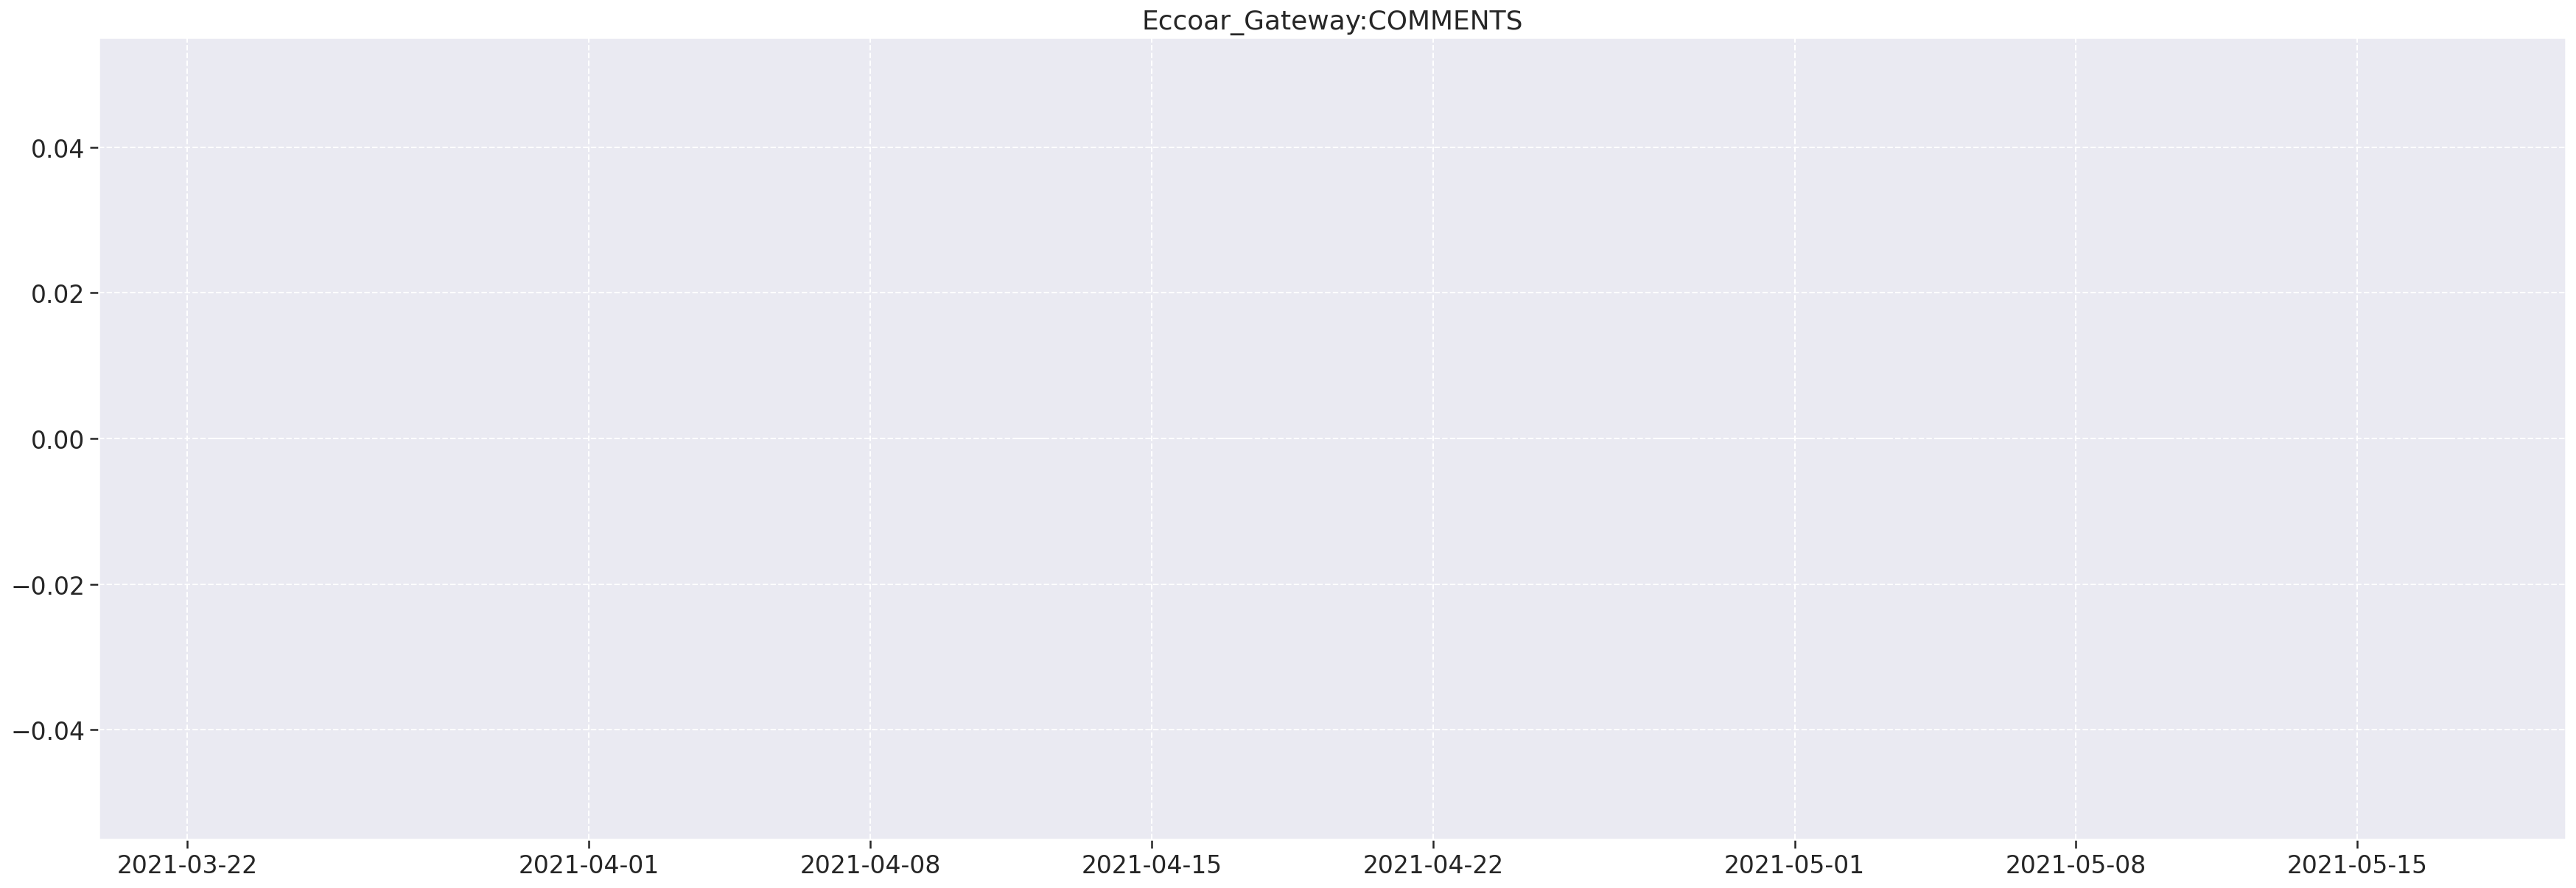

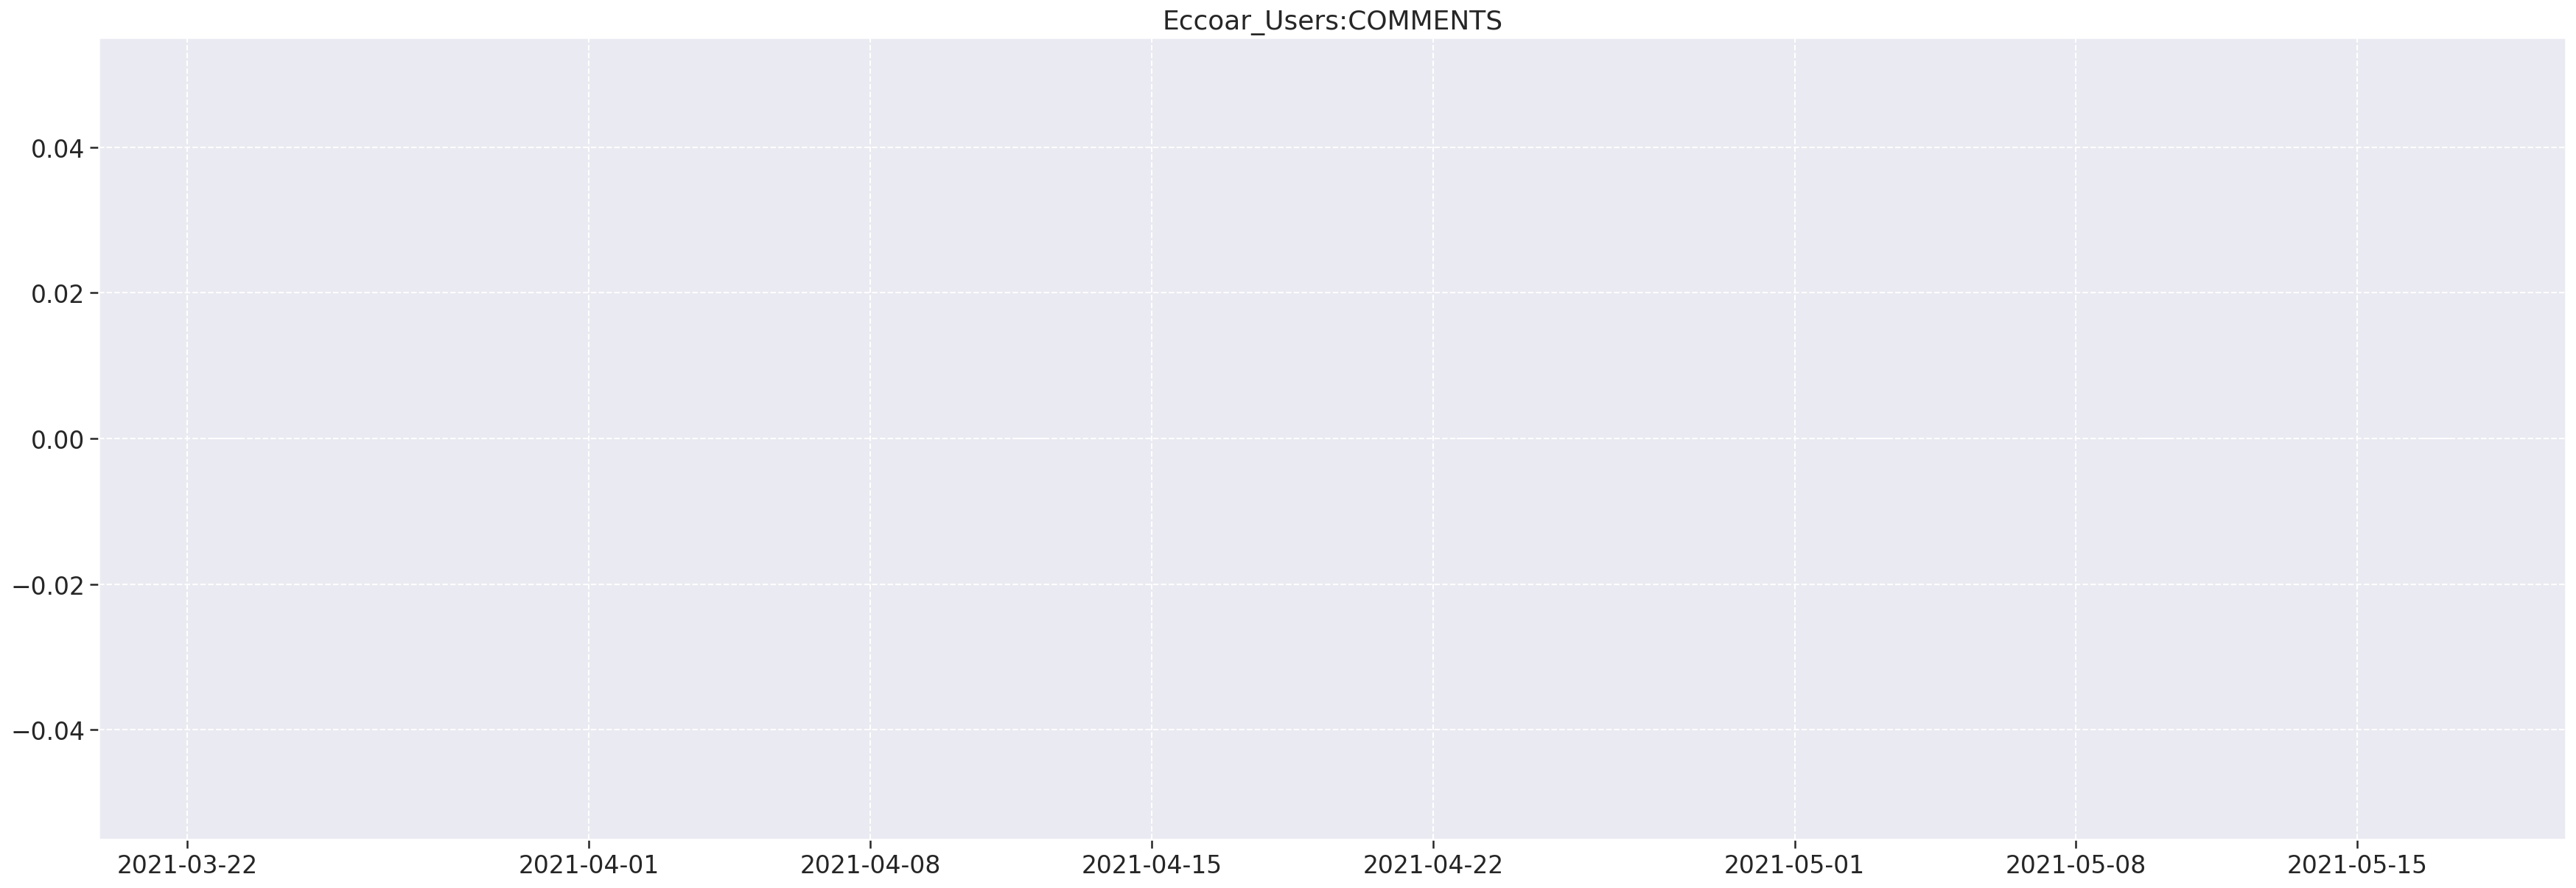

In [159]:
generate_histogram('m2', 'COMMENTS', 'b')

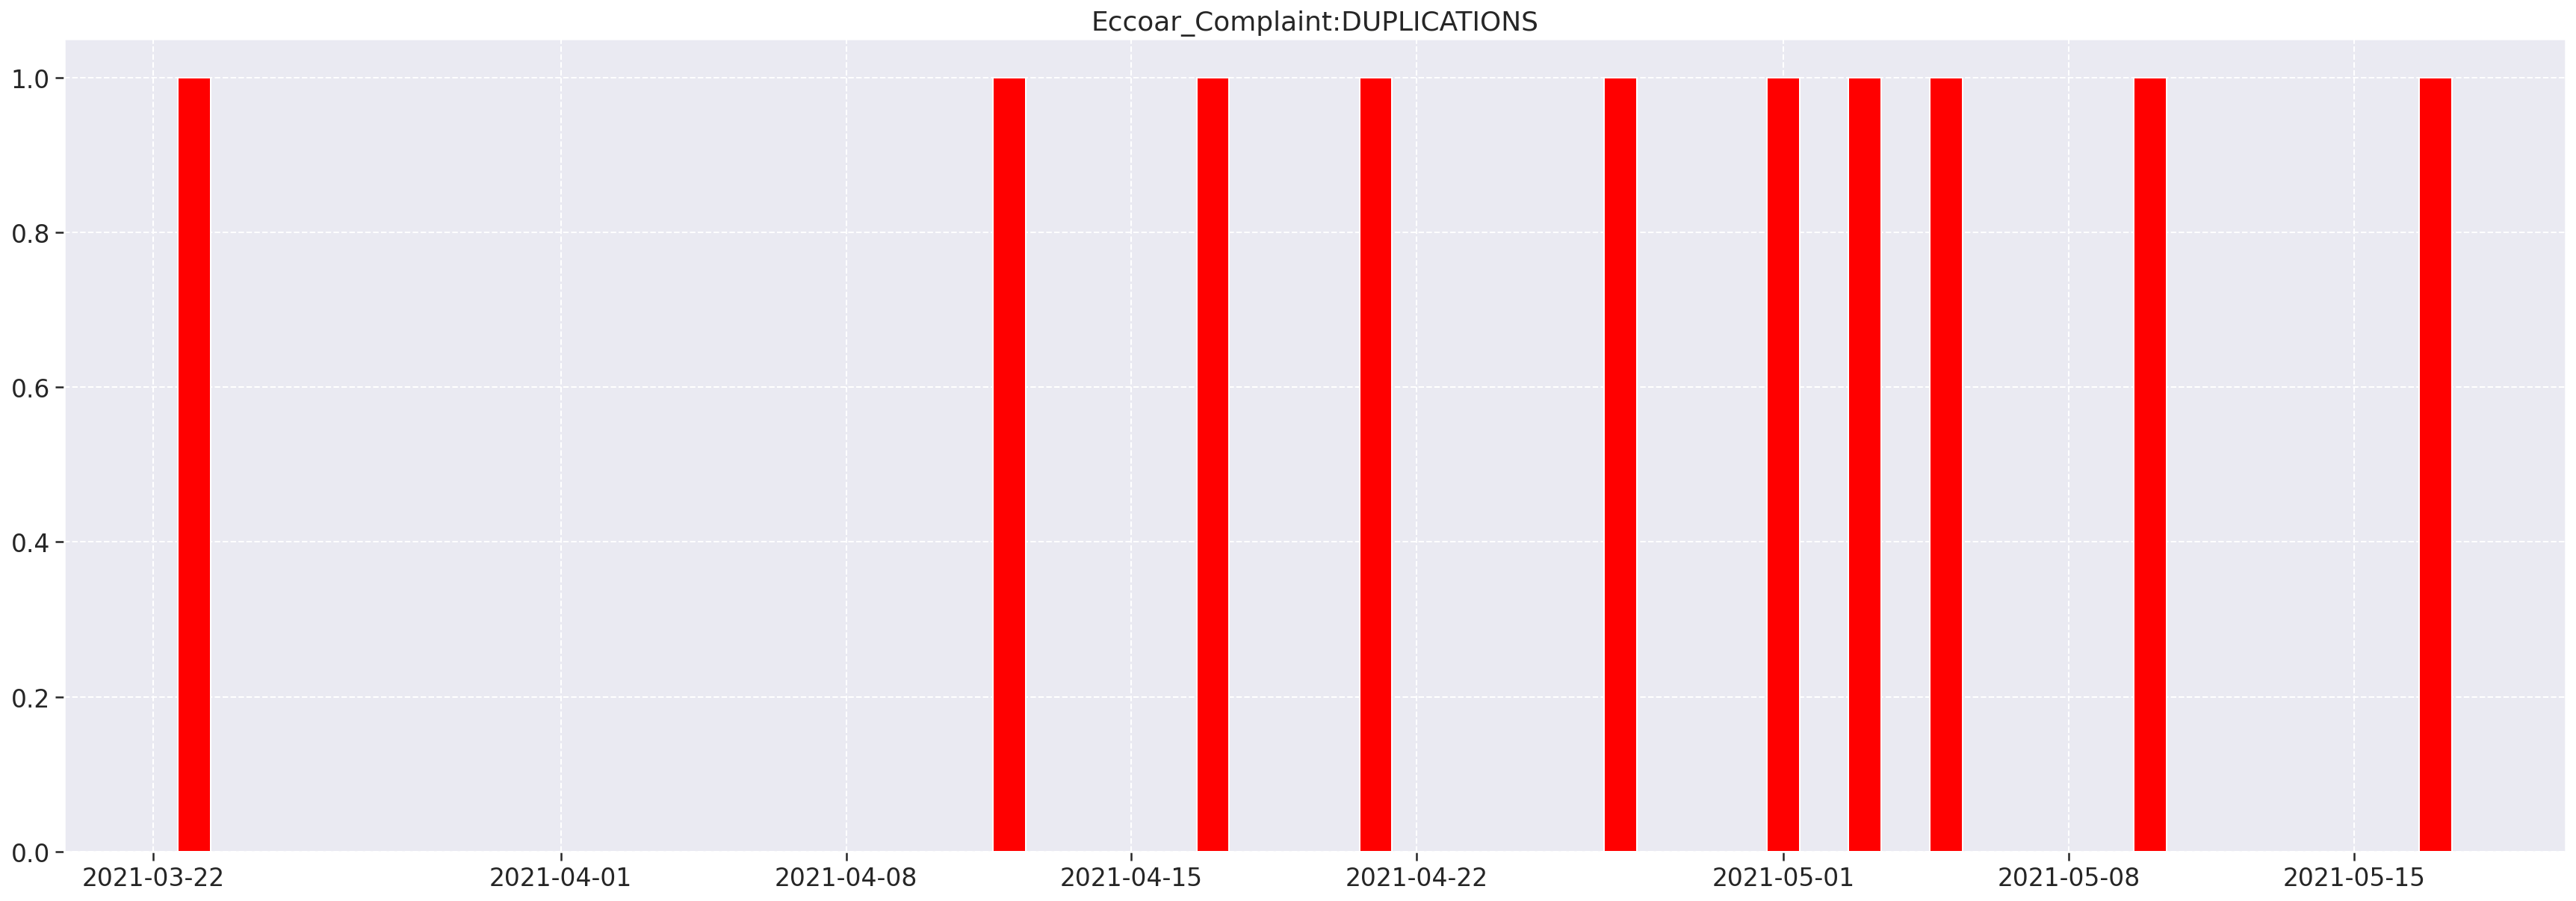

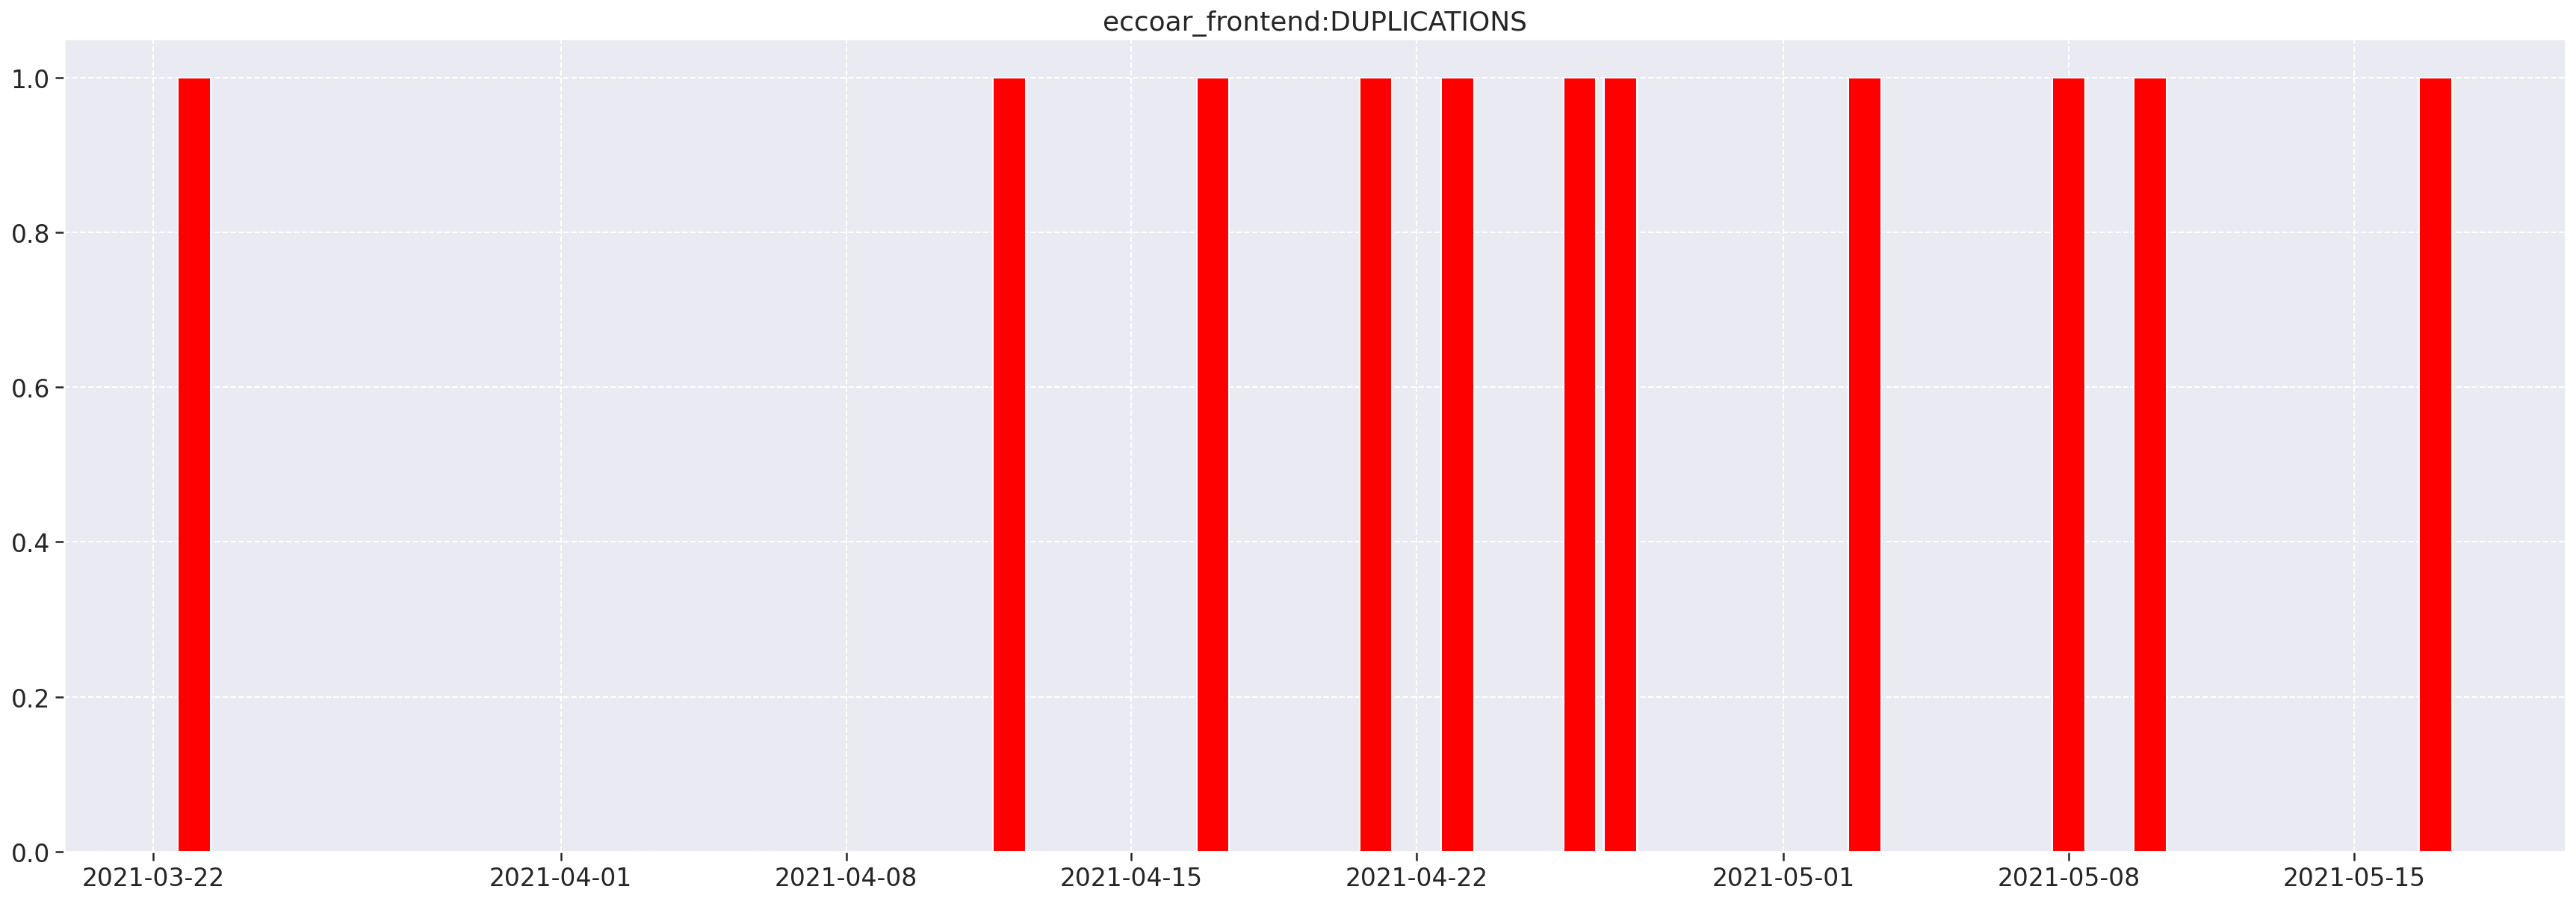

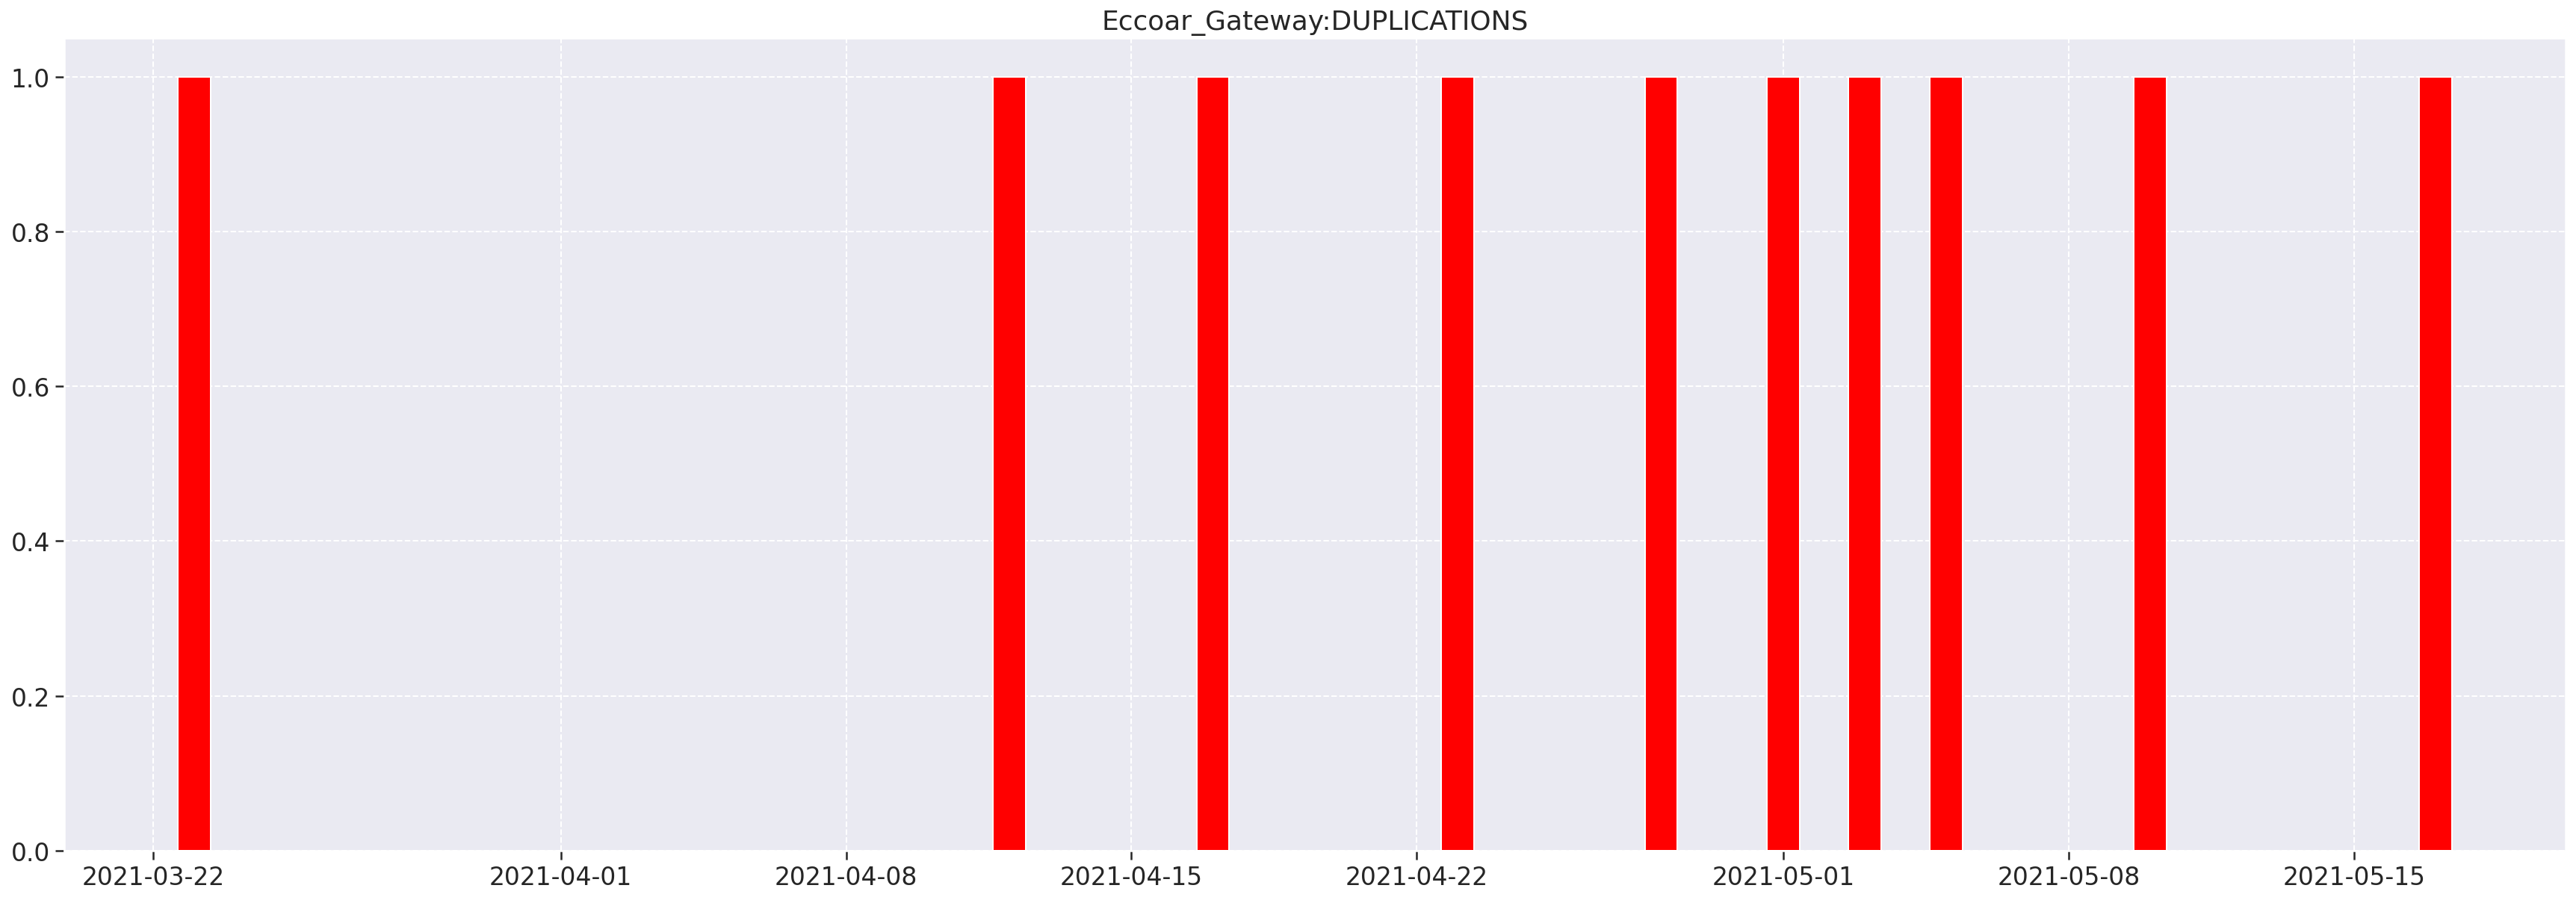

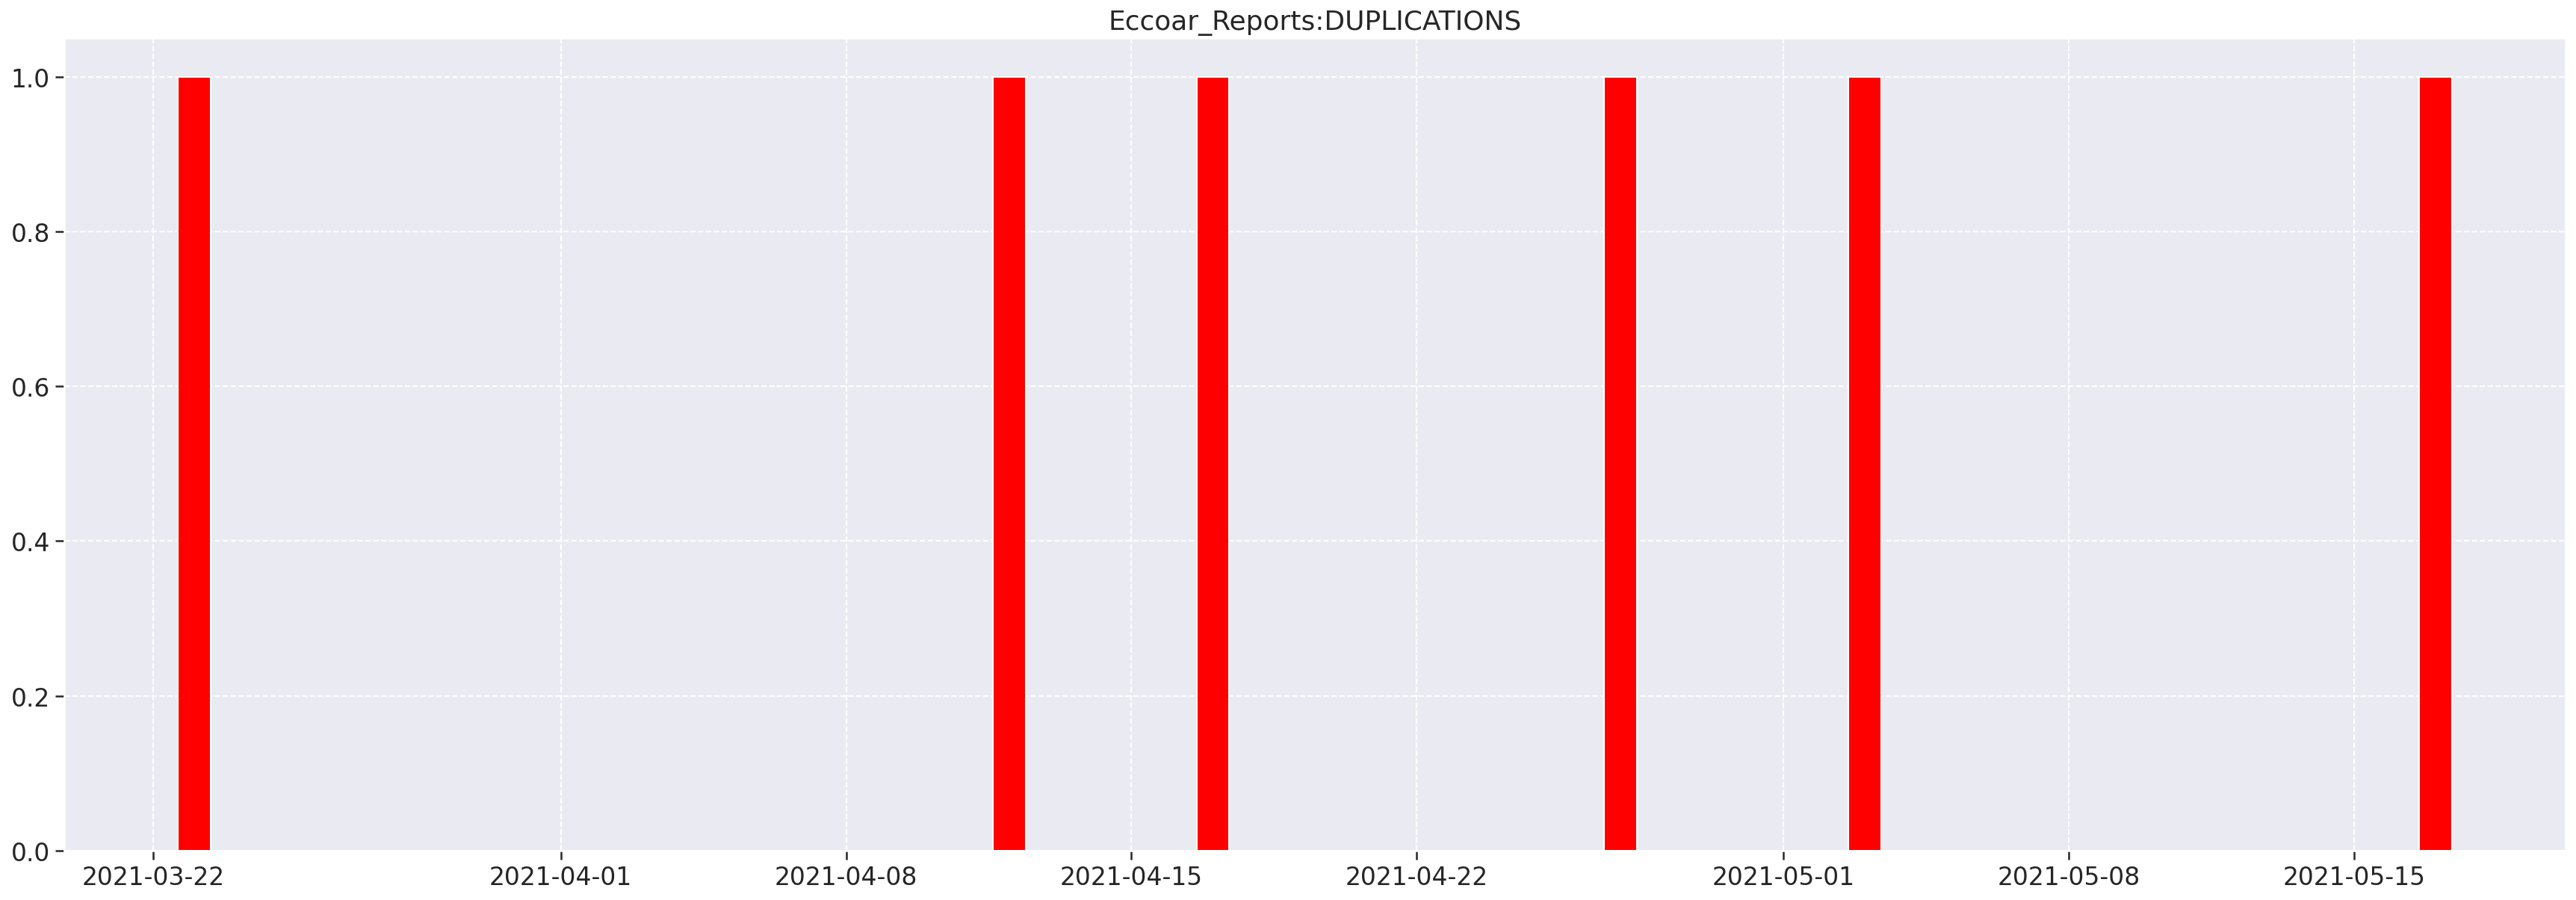

In [160]:
generate_histogram('m3', 'DUPLICATIONS', 'red')

In [161]:
all_metrics_df = pd.DataFrame()

for repository, metrics_df in repository_metrics.items():
    all_metrics_df = pd.concat([all_metrics_df, metrics_df], ignore_index=True)

all_metrics_df['ac2'] = all_metrics_df['asc2'] * 1
all_metrics_df['totalAC2'] = all_metrics_df['asc2'] * 1

KeyError: 'asc2'

In [ ]:
corrMatrix = pd.DataFrame()
corrMatrix = all_metrics_df.corr()

In [ ]:
corrMatrix

# DataFrame M1, M2, M3


In [ ]:
psc1 = 1
pm1 = 0.33
pm2 = 0.33
pm3 = 0.33

for repository, metrics_df in repository_metrics.items(): 
    metrics_df['asc1'] = ((metrics_df['m1']*pm1)+(metrics_df['m2']*pm2)+(metrics_df['m3']*pm3))*psc1

In [ ]:
all_metrics_df = pd.DataFrame()

for repository, metrics_df in repository_metrics.items():
    all_metrics_df = pd.concat([all_metrics_df, metrics_df], ignore_index=True)

all_metrics_df['ac1'] = all_metrics_df['asc1'] * 1
all_metrics_df['totalAC1'] = all_metrics_df['asc1'] * 1

In [166]:
all_metrics_df

m1        m2   m3        repository    version  ncloc      asc1
0   0.578947  0.000000  1.0  Eccoar_Complaint 2021-05-01    626  0.521053
1   0.578947  0.000000  1.0  Eccoar_Complaint 2021-05-03    626  0.521053
2   0.700000  0.000000  1.0  Eccoar_Complaint 2021-05-05    711  0.561000
3   0.700000  0.000000  1.0  Eccoar_Complaint 2021-05-10    759  0.561000
4   0.533333  0.000000  1.0  Eccoar_Complaint 2021-04-12    451  0.506000
5   0.533333  0.000000  1.0  Eccoar_Complaint 2021-04-17    451  0.506000
6   0.666667  0.000000  1.0  Eccoar_Complaint 2021-05-17    832  0.550000
7   0.588235  0.000000  1.0  Eccoar_Complaint 2021-04-21    565  0.524118
8   0.666667  0.000000  1.0  Eccoar_Complaint 2021-03-23    163  0.550000
9   0.555556  0.000000  1.0  Eccoar_Complaint 2021-04-27    587  0.513333
10  0.906250  0.031250  1.0   eccoar_frontend 2021-05-03   1591  0.639375
11  0.906250  0.031250  1.0   eccoar_frontend 2021-05-08   1645  0.639375
12  0.906250  0.031250  1.0   eccoar_frontend 2021-05-10   1751  0.639375
13  0.875000  0.041667  1.0   eccoar_frontend 2021-04-12   1095  0.632500
14  0.875000  0.041667  1.0   eccoar_frontend 2021-04-17   1100  0.632500
15  0.911765  0.029412  1.0   eccoar_frontend 2021-05-17   1996  0.640588
16  0.875000  0.041667  1.0   eccoar_frontend 2021-04-21   1100  0.632500
17  0.850000  0.050000  1.0   eccoar_frontend 2021-03-23    657  0.627000
18  0.888889  0.037037  1.0   eccoar_frontend 2021-04-23   1263  0.635556
19  0.888889  0.037037  1.0   eccoar_frontend 2021-04-26   1280  0.635556
20  0.906250  0.031250  1.0   eccoar_frontend 2021-04-27   1591  0.639375
21  0.875000  0.000000  1.0    Eccoar_Gateway 2021-05-01    305  0.618750
22  0.875000  0.000000  1.0    Eccoar_Gateway 2021-05-03    305  0.618750
23  0.875000  0.000000  1.0    Eccoar_Gateway 2021-05-05    321  0.618750
24  0.875000  0.000000  1.0    Eccoar_Gateway 2021-05-10    338  0.618750
25  1.000000  0.000000  1.0    Eccoar_Gateway 2021-04-12    256  0.660000
26  1.000000  0.000000  1.0    Eccoar_Gateway 2021-04-17    256  0.660000
27  0.909091  0.000000  1.0    Eccoar_Gateway 2021-05-17    494  0.630000
28  1.000000  0.000000  1.0    Eccoar_Gateway 2021-03-23    110  0.660000
29  1.000000  0.000000  1.0    Eccoar_Gateway 2021-04-23    267  0.660000
30  0.875000  0.000000  1.0    Eccoar_Gateway 2021-04-28    305  0.618750
31  0.600000  0.000000  1.0     Eccoar_Mailer 2021-05-03    224  0.528000
32  0.666667  0.000000  1.0     Eccoar_Mailer 2021-04-12    208  0.550000
33  0.666667  0.000000  1.0     Eccoar_Mailer 2021-04-17    208  0.550000
34  0.600000  0.000000  1.0     Eccoar_Mailer 2021-05-17    224  0.528000
35  0.666667  0.000000  1.0     Eccoar_Mailer 2021-04-22    207  0.550000
36  0.714286  0.000000  1.0     Eccoar_Mailer 2021-03-23    132  0.565714
37  0.666667  0.000000  1.0     Eccoar_Mailer 2021-04-23    202  0.550000
38  0.600000  0.000000  1.0     Eccoar_Mailer 2021-04-27    224  0.528000
39  0.700000  0.000000  1.0    Eccoar_Reports 2021-05-03    240  0.561000
40  0.777778  0.000000  1.0    Eccoar_Reports 2021-04-12    218  0.586667
41  0.777778  0.000000  1.0    Eccoar_Reports 2021-04-17    218  0.586667
42  0.700000  0.000000  1.0    Eccoar_Reports 2021-05-17    240  0.561000
43  1.000000  0.000000  1.0    Eccoar_Reports 2021-03-23     28  0.660000
44  0.700000  0.000000  1.0    Eccoar_Reports 2021-04-27    240  0.561000
45  0.666667  0.000000  1.0      Eccoar_Users 2021-05-03    180  0.550000
46  0.666667  0.000000  1.0      Eccoar_Users 2021-05-10    290  0.550000
47  1.000000  0.000000  1.0      Eccoar_Users 2021-04-12    117  0.660000
48  0.666667  0.000000  1.0      Eccoar_Users 2021-05-17    290  0.550000
49  1.000000  0.000000  1.0      Eccoar_Users 2021-03-23    117  0.660000
50  0.666667  0.000000  1.0      Eccoar_Users 2021-04-23    180  0.550000

In [ ]:
metrics_df.to_excel('data/metrics_df.xlsx', index = False)

# DataFrame M7, M9

m1  m2  m3     ncloc        m7        m9      asc1       ac1  \
m1        1.000000 NaN NaN -0.563517  0.169620  0.067475  1.000000  1.000000   
m2             NaN NaN NaN       NaN       NaN       NaN       NaN       NaN   
m3             NaN NaN NaN       NaN       NaN       NaN       NaN       NaN   
ncloc    -0.563517 NaN NaN  1.000000  0.130228  0.353644 -0.563517 -0.563517   
m7        0.169620 NaN NaN  0.130228  1.000000  0.650057  0.169620  0.169620   
m9        0.067475 NaN NaN  0.353644  0.650057  1.000000  0.067475  0.067475   
asc1      1.000000 NaN NaN -0.563517  0.169620  0.067475  1.000000  1.000000   
ac1       1.000000 NaN NaN -0.563517  0.169620  0.067475  1.000000  1.000000   
totalAC1  1.000000 NaN NaN -0.563517  0.169620  0.067475  1.000000  1.000000   
asc2      0.117439 NaN NaN  0.292104  0.861130  0.946098  0.117439  0.117439   
totalAC2  0.117439 NaN NaN  0.292104  0.861130  0.946098  0.117439  0.117439   

          totalAC1      asc2  totalAC2  
m1        1.000000  0.117439  0.117439  
m2             NaN       NaN       NaN  
m3             NaN       NaN       NaN  
ncloc    -0.563517  0.292104  0.292104  
m7        0.169620  0.861130  0.861130  
m9        0.067475  0.946098  0.946098  
asc1      1.000000  0.117439  0.117439  
ac1       1.000000  0.117439  0.117439  
totalAC1  1.000000  0.117439  0.117439  
asc2      0.117439  1.000000  1.000000  
totalAC2  0.117439  1.000000  1.000000

# Matriz de correlação 

Ao fazermos uma análise de dado é importante criar uma matriz de correlação para que possamos associar os valores das váriaveis entre si. Dessa forma, uma matriz de correlação é o retorno de uma tabela com coeficientes que mostram a correlação de cada variavel.

## Como interpretar o resultado

O coeficiente da correlação vária de 1 e -1, sendo assim, respectivamente, positiva, negativa ou nula, tal que:

* Correlação positiva: Ambas as variáveis mudam na mesma direção. Assim, ambas váriaveis correlacionadas se movem na mesma direção, logo se uma tem seu valor aumentado, a outra também.

* Correlação Nula: Nenhuma relação na mudança das variáveis. Isso ocorre apenas se o coeficiente da correlação for 0.

* Correlação negativa: As variáveis mudam em direções opostas. Dessa forma, se uma váriavel tem seu valor aumentado, a outra diminui seu valor. 


In [170]:
eccoar_gateway_metrics.corr()

m1  m2  m3     ncloc        m7        m9      asc1       ac1  \
m1        1.000000 NaN NaN -0.563517  0.169620  0.067475  1.000000  1.000000   
m2             NaN NaN NaN       NaN       NaN       NaN       NaN       NaN   
m3             NaN NaN NaN       NaN       NaN       NaN       NaN       NaN   
ncloc    -0.563517 NaN NaN  1.000000  0.130228  0.353644 -0.563517 -0.563517   
m7        0.169620 NaN NaN  0.130228  1.000000  0.650057  0.169620  0.169620   
m9        0.067475 NaN NaN  0.353644  0.650057  1.000000  0.067475  0.067475   
asc1      1.000000 NaN NaN -0.563517  0.169620  0.067475  1.000000  1.000000   
ac1       1.000000 NaN NaN -0.563517  0.169620  0.067475  1.000000  1.000000   
totalAC1  1.000000 NaN NaN -0.563517  0.169620  0.067475  1.000000  1.000000   
asc2      0.117439 NaN NaN  0.292104  0.861130  0.946098  0.117439  0.117439   
totalAC2  0.117439 NaN NaN  0.292104  0.861130  0.946098  0.117439  0.117439   

          totalAC1      asc2  totalAC2  
m1        1.000000  0.117439  0.117439  
m2             NaN       NaN       NaN  
m3             NaN       NaN       NaN  
ncloc    -0.563517  0.292104  0.292104  
m7        0.169620  0.861130  0.861130  
m9        0.067475  0.946098  0.946098  
asc1      1.000000  0.117439  0.117439  
ac1       1.000000  0.117439  0.117439  
totalAC1  1.000000  0.117439  0.117439  
asc2      0.117439  1.000000  1.000000  
totalAC2  0.117439  1.000000  1.000000

## Análise da tabela do repositorio gateway 

Nessa tabela podemos perceber que:

* m1/m2/m3/m7/m9/asc1/ac1/totalAC1/asc2/totalAC2 e m2/m3 possue uma correlação nula, já que seu coeficiente é igual a zero. Dessa forma, não ocorre uma relação.

* m1 e m7/m9 se correlacionam positivamente. Como seu valor é aproximado de zero, sua correlação é fraca.

* m1 e asc1/ac1/totalAC1 se correlacionam positivamente. Como seu valor é igual a 1, sua correlação é forte.

* m1 e asc2/totalAC2 se correlacionam positivamente. Como seu valor é aproximado de zero, sua correlação é fraca.

* m7 e m9/asc1/ac1/totalAC1 se correlacionam positivamente. Como seu valor é aproximado de zero, sua correlação é fraca

* m7 e asc2, totalAC2 se correlacionam positivamente. Como seu valor é aproximado de 1, sua correlação é forte.

* m9 e asc1/ac1/totalAC1 se correlacionam positivamente. Como seu valor é aproximado de 1, sua correlação é forte.

* m9 e asc2/totalAC2 se correlacionam positivamente. Como seu valor é aproximado de 1, sua correlação é forte.

* asc1/ac1 e ac1/totalAC1 se correlacionam positivamente. Como seu valor é igual a 1, sua correlação é forte.

* asc1/ac1/totalAC1 e asc2/totalAC2 se correlacionam positivamente. Como seu valor é aproximado de 0, sua correlação é fraca.


In [172]:
eccoar_complaint_metrics.corr()

m1  m2  m3     ncloc        m7        m9      asc1       ac1  \
m1        1.000000 NaN NaN  0.312020 -0.187111 -0.023440  1.000000  1.000000   
m2             NaN NaN NaN       NaN       NaN       NaN       NaN       NaN   
m3             NaN NaN NaN       NaN       NaN       NaN       NaN       NaN   
ncloc     0.312020 NaN NaN  1.000000  0.085105  0.368582  0.312020  0.312020   
m7       -0.187111 NaN NaN  0.085105  1.000000  0.650057 -0.187111 -0.187111   
m9       -0.023440 NaN NaN  0.368582  0.650057  1.000000 -0.023440 -0.023440   
asc1      1.000000 NaN NaN  0.312020 -0.187111 -0.023440  1.000000  1.000000   
ac1       1.000000 NaN NaN  0.312020 -0.187111 -0.023440  1.000000  1.000000   
totalAC1  1.000000 NaN NaN  0.312020 -0.187111 -0.023440  1.000000  1.000000   
asc2     -0.095433 NaN NaN  0.282866  0.861130  0.946098 -0.095433 -0.095433   
totalAC2 -0.095433 NaN NaN  0.282866  0.861130  0.946098 -0.095433 -0.095433   

          totalAC1      asc2  totalAC2  
m1        1.000000 -0.095433 -0.095433  
m2             NaN       NaN       NaN  
m3             NaN       NaN       NaN  
ncloc     0.312020  0.282866  0.282866  
m7       -0.187111  0.861130  0.861130  
m9       -0.023440  0.946098  0.946098  
asc1      1.000000 -0.095433 -0.095433  
ac1       1.000000 -0.095433 -0.095433  
totalAC1  1.000000 -0.095433 -0.095433  
asc2     -0.095433  1.000000  1.000000  
totalAC2 -0.095433  1.000000  1.000000

## Análise da tabela do repositorio complaint 

Nessa tabela podemos perceber que:

* m1/m2/m3/m7/m9/asc1/ac1/totalAC1/asc2/totalAC2 e m2/m3 possue uma correlação nula, já que seu coeficiente é igual a zero. Dessa forma, não ocorre uma relação.

* m1 e m7/m9 se correlacionam negativamente. Como seu valor é aproximado de zero, sua correlação é fraca.

* m1 e asc1/ac1/totalAC1 se correlacionam positivamente. Como seu valor é igual a 1, sua correlação é forte.

* m1 e asc2/totalAC2 se correlacionam negativamente. Como seu valor é aproximado de zero, sua correlação é fraca.

* m7 e m9 se correlacionam positivamente. Como seu valor é aproximado de 1, sua correlação é forte.

* m7 e asc1/ac1/totalAC1 se correlacionam negativamente. Como seu valor é aproximado de zero, sua correlação é forte.

* m7 e asc2/totalAC2 se correlacionam positivamente. Como seu valor é aproximado de 1, sua correlação é forte.

* m9 e asc1/ac1/totalAC1 se correlacionam negativamente. Como seu valor é aproximado de 0, sua correlação é fraco.

* m9 e asc2/totalAC2 se correlacionam positivamente. Como seu valor é aproximado de 1, sua correlação é forte.

* asc1/ac1 e totalAC1 se correlacionam positivamente. Como seu valor é igual a 1, sua correlação é forte.

* asc1/ac1/totalAC1 e asc2/totalAC2 se correlacionam negativamente. Como seu valor é aproximado de 0, sua correlação é fraca.

In [175]:
eccoar_frontend_metrics.corr()

m1        m2  m3     ncloc        m7        m9      asc1  \
m1        1.000000 -1.000000 NaN  0.971584  0.057553  0.252856  1.000000   
m2       -1.000000  1.000000 NaN -0.971584 -0.057553 -0.252856 -1.000000   
m3             NaN       NaN NaN       NaN       NaN       NaN       NaN   
ncloc     0.971584 -0.971584 NaN  1.000000  0.113210  0.304404  0.971584   
m7        0.057553 -0.057553 NaN  0.113210  1.000000  0.649958  0.057553   
m9        0.252856 -0.252856 NaN  0.304404  0.649958  1.000000  0.252856   
asc1      1.000000 -1.000000 NaN  0.971584  0.057553  0.252856  1.000000   
ac1       1.000000 -1.000000 NaN  0.971584  0.057553  0.252856  1.000000   
totalAC1  1.000000 -1.000000 NaN  0.971584  0.057553  0.252856  1.000000   
asc2      0.189469 -0.189469 NaN  0.247882  0.870858  0.939573  0.189469   
totalAC2  0.189469 -0.189469 NaN  0.247882  0.870858  0.939573  0.189469   

               ac1  totalAC1      asc2  totalAC2  
m1        1.000000  1.000000  0.189469  0.189469  
m2       -1.000000 -1.000000 -0.189469 -0.189469  
m3             NaN       NaN       NaN       NaN  
ncloc     0.971584  0.971584  0.247882  0.247882  
m7        0.057553  0.057553  0.870858  0.870858  
m9        0.252856  0.252856  0.939573  0.939573  
asc1      1.000000  1.000000  0.189469  0.189469  
ac1       1.000000  1.000000  0.189469  0.189469  
totalAC1  1.000000  1.000000  0.189469  0.189469  
asc2      0.189469  0.189469  1.000000  1.000000  
totalAC2  0.189469  0.189469  1.000000  1.000000

## Análise da tabela do repositorio frontend 

Nessa tabela podemos perceber que:

* m1/m2/m3/m7/m9/asc1/ac1/totalAC1/asc2/totalAC2 e m3 possue uma correlação nula, já que seu coeficiente é igual a zero. Dessa forma, não ocorre uma relação.

* m1 e m2 se correlacionam negativamente. Como seu valor é aproximado de -1, sua correlação forte.

* m1 e m7/m9 se correlacionam negativamente. Como seu valor é aproximado de zero, sua correlação é fraca.

* m1 e asc1/ac1/totalAC1 se correlacionam positivamente. Como seu valor é igual a 1, sua correlação é forte.

* m1 e asc2/totalAC2 se correlacionam positivamente. Como seu valor é aproximado de zero, sua correlação é fraca.

* m2 e m7 se correlacionam negativamente. Como seu valor valor é aproximado de 1, sua correlação é forte.

* m2 e m9 se correlacionam negativamente. Como seu valor valor é aproximado de 1, sua correlação é forte.

* m2 e asc1/ac1/totalAC1 se correlacionam negativamente. Como seu valor é igual a -1, sua correlação é forte.

* m2 e asc2/totalAC2 se correlacionam negativamente. Como seu valor é igual 0, sua correlação é fraca.

* m7 e m9 se correlacionam positivamente. Como seu valor é aproximado de 0, sua correlação é fraco.

* m7 e asc1/ac1/totalAC1 se correlacionam positivamente. Como seu valor é aproximado de 1, sua correlação é forte.

* m7 e asc2/totalAC2 se correlacionam positivamente. Como seu valor é aproximado de 1, sua correlação é forte.

* m9 e asc1/ac1/totalAC1 se correlacionam positivamente. Como seu valor é aproximado de 0, sua correlação é fraco.

* m9 e asc2/totalAC2 se correlacionam positivamente. Como seu valor é aproximado de 1, sua correlação é forte.

* asc1/ac1 e totalAC1 se correlacionam positivamente. Como seu valor é igual a 1, sua correlação é forte.

* asc1/ac1/totalAC1 e asc2/totalAC2 se correlacionam positivamente. Como seu valor é aproximado de 0, sua correlação é fraca.

In [177]:
eccoar_mailer_metrics.corr()

m1  m2  m3     ncloc        m7        m9      asc1       ac1  \
m1        1.000000 NaN NaN -0.828562  0.000951 -0.077561  1.000000  1.000000   
m2             NaN NaN NaN       NaN       NaN       NaN       NaN       NaN   
m3             NaN NaN NaN       NaN       NaN       NaN       NaN       NaN   
ncloc    -0.828562 NaN NaN  1.000000  0.247781  0.473585 -0.828562 -0.828562   
m7        0.000951 NaN NaN  0.247781  1.000000  0.614687  0.000951  0.000951   
m9       -0.077561 NaN NaN  0.473585  0.614687  1.000000 -0.077561 -0.077561   
asc1      1.000000 NaN NaN -0.828562  0.000951 -0.077561  1.000000  1.000000   
ac1       1.000000 NaN NaN -0.828562  0.000951 -0.077561  1.000000  1.000000   
totalAC1  1.000000 NaN NaN -0.828562  0.000951 -0.077561  1.000000  1.000000   
asc2     -0.049470 NaN NaN  0.420239  0.861591  0.929991 -0.049470 -0.049470   
totalAC2 -0.049470 NaN NaN  0.420239  0.861591  0.929991 -0.049470 -0.049470   

          totalAC1      asc2  totalAC2  
m1        1.000000 -0.049470 -0.049470  
m2             NaN       NaN       NaN  
m3             NaN       NaN       NaN  
ncloc    -0.828562  0.420239  0.420239  
m7        0.000951  0.861591  0.861591  
m9       -0.077561  0.929991  0.929991  
asc1      1.000000 -0.049470 -0.049470  
ac1       1.000000 -0.049470 -0.049470  
totalAC1  1.000000 -0.049470 -0.049470  
asc2     -0.049470  1.000000  1.000000  
totalAC2 -0.049470  1.000000  1.000000

## Análise da tabela do repositorio mailer 

Nessa tabela podemos perceber que:

* m1/m2/m3/m7/m9/asc1/ac1/totalAC1/asc2/totalAC2 e m2/m3 possue uma correlação nula, já que seu coeficiente é igual a zero. Dessa forma, não ocorre uma relação.

* m1 e m7 se correlacionam positivamente. Como seu valor é aproximado de zero, sua correlação é fraca.

* m1 e m9 se correlacionam negativamente. Como seu valor é aproximado de zero, sua correlação é fraca.

* m1 e asc1/ac1/totalAC1 se correlacionam positivamente. Como seu valor é igual a 1, sua correlação é forte.

* m1 e asc2/totalAC2 se correlacionam negativamente. Como seu valor é aproximado de zero, sua correlação é fraca.

* m7 e m9 se correlacionam positivamente. Como seu valor é aproximado de 1, sua correlação é forte.

* m7 e asc1/ac1/totalAC1 se correlacionam positivamente. Como seu valor é aproximado de 0, sua correlação é fraco.

* m7 e asc2/totalAC2 se correlacionam positivamente. Como seu valor é aproximado de 1, sua correlação é forte.

* m9 e asc1/ac1/totalAC1 se correlacionam negativamente. Como seu valor é aproximado de -1, sua correlação é forte.

* m9 e asc2/totalAC2 se correlacionam positivamente. Como seu valor é aproximado de 1, sua correlação é forte.

* asc1/ac1 e totalAC1 se correlacionam positivamente. Como seu valor é igual a 1, sua correlação é forte.

* asc1/ac1/totalAC1 e asc2/totalAC2 se correlacionam negativamente. Como seu valor é aproximado de -1, sua correlação é forte.

In [178]:
eccoar_reports_metrics.corr()

m1  m2  m3     ncloc        m7        m9      asc1       ac1  \
m1        1.000000 NaN NaN -0.979082 -0.195079 -0.392283  1.000000  1.000000   
m2             NaN NaN NaN       NaN       NaN       NaN       NaN       NaN   
m3             NaN NaN NaN       NaN       NaN       NaN       NaN       NaN   
ncloc    -0.979082 NaN NaN  1.000000  0.359310  0.549093 -0.979082 -0.979082   
m7       -0.195079 NaN NaN  0.359310  1.000000  0.623636 -0.195079 -0.195079   
m9       -0.392283 NaN NaN  0.549093  0.623636  1.000000 -0.392283 -0.392283   
asc1      1.000000 NaN NaN -0.979082 -0.195079 -0.392283  1.000000  1.000000   
ac1       1.000000 NaN NaN -0.979082 -0.195079 -0.392283  1.000000  1.000000   
totalAC1  1.000000 NaN NaN -0.979082 -0.195079 -0.392283  1.000000  1.000000   
asc2     -0.347224 NaN NaN  0.523607  0.852625  0.940192 -0.347224 -0.347224   
totalAC2 -0.347224 NaN NaN  0.523607  0.852625  0.940192 -0.347224 -0.347224   

          totalAC1      asc2  totalAC2  
m1        1.000000 -0.347224 -0.347224  
m2             NaN       NaN       NaN  
m3             NaN       NaN       NaN  
ncloc    -0.979082  0.523607  0.523607  
m7       -0.195079  0.852625  0.852625  
m9       -0.392283  0.940192  0.940192  
asc1      1.000000 -0.347224 -0.347224  
ac1       1.000000 -0.347224 -0.347224  
totalAC1  1.000000 -0.347224 -0.347224  
asc2     -0.347224  1.000000  1.000000  
totalAC2 -0.347224  1.000000  1.000000

## Análise da tabela do repositorio reports 

Nessa tabela podemos perceber que:

* m1/m2/m3/m7/m9/asc1/ac1/totalAC1/asc2/totalAC2 e m2/m3 possue uma correlação nula, já que seu coeficiente é igual a zero. Dessa forma, não ocorre uma relação.

* m1 e m7 se correlacionam negativamente. Como seu valor é aproximado de 0, sua correlação é fraca.

* m1 e m9 se correlacionam negativamente. Como seu valor é aproximado de 0, sua correlação é fraca.

* m1 e asc1/ac1/totalAC1 se correlacionam positivamente. Como seu valor é igual a 1, sua correlação é forte.

* m1 e asc2/totalAC2 se correlacionam negativamente. Como seu valor é aproximado de zero, sua correlação é fraca.

* m7 e m9 se correlacionam positivamente. Como seu valor é aproximado de 1, sua correlação é forte.

* m7 e asc1/ac1/totalAC1 se correlacionam negativamente. Como seu valor é aproximado de zero, sua correlação é fraca.

* m7 e asc2/totalAC2 se correlacionam positivamente. Como seu valor é aproximado de 1, sua correlação é forte.

* m9 e asc1/ac1/totalAC1 se correlacionam negativamente. Como seu valor é aproximado de zero, sua correlação é fraca.

* m9 e asc2/totalAC2 se correlacionam positivamente. Como seu valor é aproximado de 1, sua correlação é forte.

* asc1/ac1 e totalAC1 se correlacionam positivamente. Como seu valor é igual a 1, sua correlação é forte.

* asc1/ac1/totalAC1 e asc2/totalAC2 se correlacionam negativamente. Como seu valor é aproximado de zero, sua correlação é fraca.

In [179]:
eccoar_users_metrics.corr()

m1  m2  m3     ncloc        m7        m9      asc1       ac1  \
m1        1.000000 NaN NaN -0.778086  0.391888 -0.305108  1.000000  1.000000   
m2             NaN NaN NaN       NaN       NaN       NaN       NaN       NaN   
m3             NaN NaN NaN       NaN       NaN       NaN       NaN       NaN   
ncloc    -0.778086 NaN NaN  1.000000 -0.091735  0.571608 -0.778086 -0.778086   
m7        0.391888 NaN NaN -0.091735  1.000000  0.704843  0.391888  0.391888   
m9       -0.305108 NaN NaN  0.571608  0.704843  1.000000 -0.305108 -0.305108   
asc1      1.000000 NaN NaN -0.778086  0.391888 -0.305108  1.000000  1.000000   
ac1       1.000000 NaN NaN -0.778086  0.391888 -0.305108  1.000000  1.000000   
totalAC1  1.000000 NaN NaN -0.778086  0.391888 -0.305108  1.000000  1.000000   
asc2      0.026562 NaN NaN  0.279248  0.914385  0.931681  0.026562  0.026562   
totalAC2  0.026562 NaN NaN  0.279248  0.914385  0.931681  0.026562  0.026562   

          totalAC1      asc2  totalAC2  
m1        1.000000  0.026562  0.026562  
m2             NaN       NaN       NaN  
m3             NaN       NaN       NaN  
ncloc    -0.778086  0.279248  0.279248  
m7        0.391888  0.914385  0.914385  
m9       -0.305108  0.931681  0.931681  
asc1      1.000000  0.026562  0.026562  
ac1       1.000000  0.026562  0.026562  
totalAC1  1.000000  0.026562  0.026562  
asc2      0.026562  1.000000  1.000000  
totalAC2  0.026562  1.000000  1.000000

## Análise da tabela do repositorio reports 

Nessa tabela podemos perceber que:

* m1/m2/m3/m7/m9/asc1/ac1/totalAC1/asc2/totalAC2 e m2/m3 possue uma correlação nula, já que seu coeficiente é igual a zero. Dessa forma, não ocorre uma relação.

* m1 e m7 se correlacionam positivamente. Como seu valor é aproximado de 0, sua correlação é fraca.

* m1 e m9 se correlacionam negativamente. Como seu valor é aproximado de 0, sua correlação é fraca.

* m1 e asc1/ac1/totalAC1 se correlacionam positivamente. Como seu valor é igual a 1, sua correlação é forte.

* m1 e asc2/totalAC2 se correlacionam positivamente. Como seu valor é aproximado de zero, sua correlação é fraca.

* m7 e m9 se correlacionam positivamente. Como seu valor é aproximado de 1, sua correlação é forte.

* m7 e asc1/ac1/totalAC1 se correlacionam positivamente. Como seu valor é aproximado de zero, sua correlação é fraca.

* m7 e asc2/totalAC2 se correlacionam positivamente. Como seu valor é aproximado de 1, sua correlação é forte.

* m9 e asc1/ac1/totalAC1 se correlacionam negativamente. Como seu valor é aproximado de zero, sua correlação é fraca.

* m9 e asc2/totalAC2 se correlacionam positivamente. Como seu valor é aproximado de 1, sua correlação é forte.

* asc1/ac1 e totalAC1 se correlacionam positivamente. Como seu valor é igual a 1, sua correlação é forte.

* asc1/ac1/totalAC1 e asc2/totalAC2 se correlacionam positivamente. Como seu valor é aproximado de zero, sua correlação é fraca.